### SonyGAN data visualization

If you have dumped the stderr from your train.py run to a text file, then "fix" it with this shell script:
```
#!/bin/bash
# get data lines ; remove progress info, remove duplicate lines
cat $1 |  grep "Iter:" |  cut -d ' ' -f 1-28 | awk '{if ($0!=prev) print ; prev=$0}'
```

Now you have a file of one line per training iteration where each line looks like this:  
Iter: 0; scale: 0 alpha: 0.00; D_cls: 92.37; D_real: -0.37; D_fake: 25.56;  

and you can process that file with this script to graph the metrics.

In [1]:
import numpy as np

import os

import matplotlib.pylab as plt
%matplotlib inline
import subprocess 

import re

In [2]:
# Set parameters in this cell
#datafile = "logs.2020.07.21a/stderr.fixed.txt"logs.2020.12.13/stderr.fixed.txt
datafile = "logs_2020.12.17_13.16.51/stderr.fixed.txt"
stages=[200000, 200000, 200000, 300000, 300000 ]

fields=['alpha', 'D_cls', 'D_real', 'D_fake', 'lossD_GP', 'lipn', 'D_eps', 'G', 'G_cls', 'G_fake', 'Spread_R-F', 'lossG']


In [3]:
def getData(fieldname, filename) :
    valArray=[]
    with open(filename, "r") as fp:
        line = fp.readline()
        cnt = 0
        while line :
            if fieldname in line :
                val = float(re.search("{}\: (\-*\d*\.?\d*)".format(fieldname), line).group(1))
                valArray.append(val)
                cnt += 1
            line = fp.readline()
    return valArray
    

length of alpha is 1200000


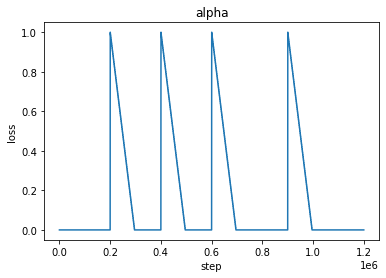

length of D_cls is 1200000


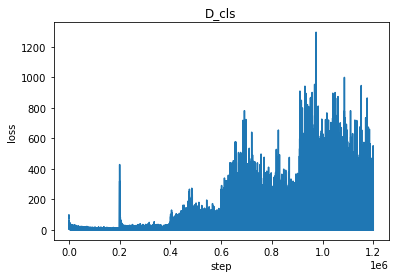

length of D_real is 1200000


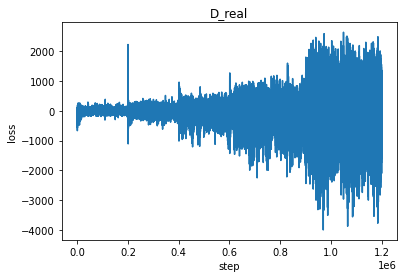

length of D_fake is 1200000


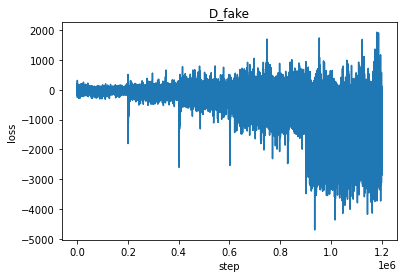

length of lossD_GP is 1200000


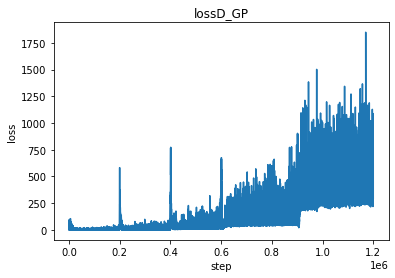

length of lipn is 1200000


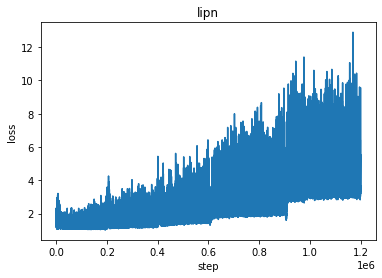

length of D_eps is 1200000


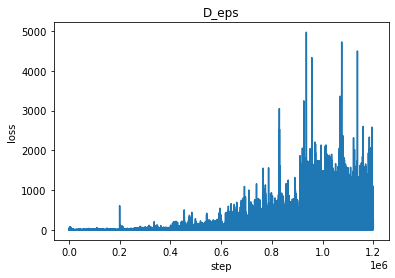

length of G is 1200000


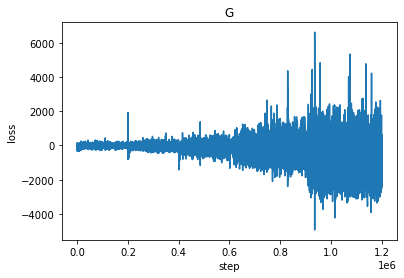

length of G_cls is 1200000


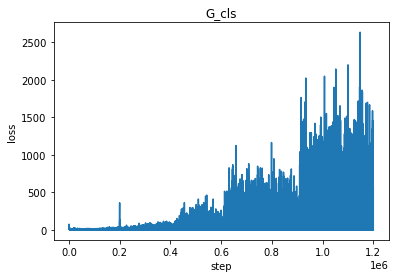

length of G_fake is 1200000


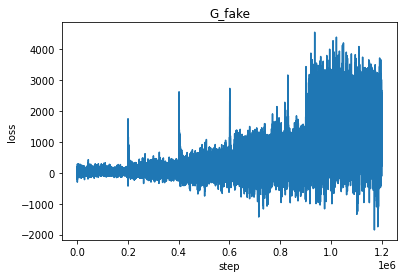

length of Spread_R-F is 1200000


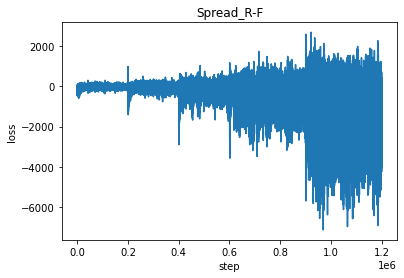

length of lossG is 1200000


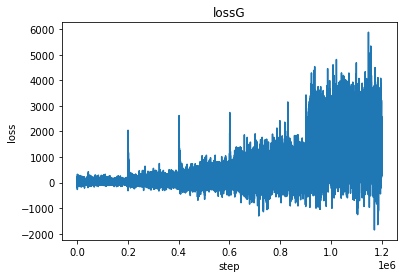

In [4]:
#Individual plots for each metric
for field in fields :
    loss=getData(field, datafile)
    print("length of {} is {}".format(field, len(loss)))
    plt.plot(loss[:sum(stages[:5])])
    plt.ylabel('loss')
    plt.xlabel('step')
    plt.title(field)
    plt.show()

In [5]:
sum(stages[:3])

600000

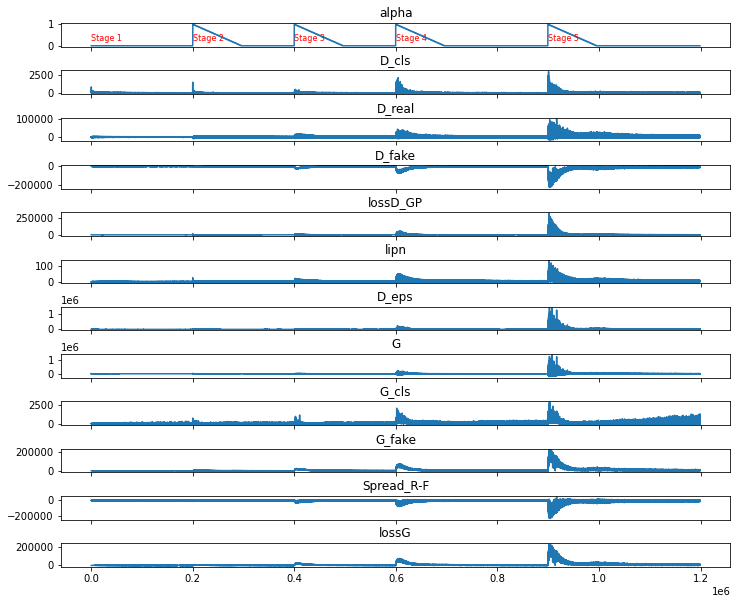

In [10]:
#Subplots for each metric (easier to incoporate in DIARY)
fig, ax = plt.subplots(len(fields),sharex=True, gridspec_kw={'hspace': 1}, figsize=(12,10))
cnt=0
for field in fields :
    loss=getData(field, datafile)
    #print("length of {} is {}".format(field, len(loss)))
    ax[cnt].plot(loss[:sum(stages[:5])]) #ax[cnt].plot(loss[:80000])
    if cnt == 0 :
        ax[cnt].annotate('Stage 1', (sum(stages[:0]), 0.2), textcoords='data', size=8, color='red')
        ax[cnt].annotate('Stage 2', (sum(stages[:1]), 0.2), textcoords='data', size=8, color='red')
        ax[cnt].annotate('Stage 3', (sum(stages[:2]), 0.2), textcoords='data', size=8, color='red')
        ax[cnt].annotate('Stage 4', (sum(stages[:3]), 0.2), textcoords='data', size=8, color='red')
        ax[cnt].annotate('Stage 5', (sum(stages[:4]), 0.2), textcoords='data', size=8, color='red')
    #plt.ylabel('loss')
    #plt.xlabel('step')
    #ax.title(field)
    ax[cnt].set_title(field)
    cnt=cnt+1
    
#plt.show()

In [11]:
foo=[[0.0], [1.0, 0.9996666666666667, 0.9993333333333334, 0.9990000000000001, 0.9986666666666668, 0.9983333333333335, 0.9980000000000002, 0.9976666666666669, 0.9973333333333336, 0.9970000000000003, 0.996666666666667, 0.9963333333333337, 0.9960000000000004, 0.9956666666666671, 0.9953333333333338, 0.9950000000000006, 0.9946666666666673, 0.994333333333334, 0.9940000000000007, 0.9936666666666674, 0.9933333333333341, 0.9930000000000008, 0.9926666666666675, 0.9923333333333342, 0.9920000000000009, 0.9916666666666676, 0.9913333333333343, 0.991000000000001, 0.9906666666666677, 0.9903333333333344, 0.9900000000000011, 0.9896666666666678, 0.9893333333333345, 0.9890000000000012, 0.9886666666666679, 0.9883333333333346, 0.9880000000000013, 0.987666666666668, 0.9873333333333347, 0.9870000000000014, 0.9866666666666681, 0.9863333333333348, 0.9860000000000015, 0.9856666666666682, 0.985333333333335, 0.9850000000000017, 0.9846666666666684, 0.9843333333333351, 0.9840000000000018, 0.9836666666666685, 0.9833333333333352, 0.9830000000000019, 0.9826666666666686, 0.9823333333333353, 0.982000000000002, 0.9816666666666687, 0.9813333333333354, 0.9810000000000021, 0.9806666666666688, 0.9803333333333355, 0.9800000000000022, 0.9796666666666689, 0.9793333333333356, 0.9790000000000023, 0.978666666666669, 0.9783333333333357, 0.9780000000000024, 0.9776666666666691, 0.9773333333333358, 0.9770000000000025, 0.9766666666666692, 0.9763333333333359, 0.9760000000000026, 0.9756666666666693, 0.975333333333336, 0.9750000000000028, 0.9746666666666695, 0.9743333333333362, 0.9740000000000029, 0.9736666666666696, 0.9733333333333363, 0.973000000000003, 0.9726666666666697, 0.9723333333333364, 0.9720000000000031, 0.9716666666666698, 0.9713333333333365, 0.9710000000000032, 0.9706666666666699, 0.9703333333333366, 0.9700000000000033, 0.96966666666667, 0.9693333333333367, 0.9690000000000034, 0.9686666666666701, 0.9683333333333368, 0.9680000000000035, 0.9676666666666702, 0.9673333333333369, 0.9670000000000036, 0.9666666666666703, 0.966333333333337, 0.9660000000000037, 0.9656666666666704, 0.9653333333333372, 0.9650000000000039, 0.9646666666666706, 0.9643333333333373, 0.964000000000004, 0.9636666666666707, 0.9633333333333374, 0.9630000000000041, 0.9626666666666708, 0.9623333333333375, 0.9620000000000042, 0.9616666666666709, 0.9613333333333376, 0.9610000000000043, 0.960666666666671, 0.9603333333333377, 0.9600000000000044, 0.9596666666666711, 0.9593333333333378, 0.9590000000000045, 0.9586666666666712, 0.9583333333333379, 0.9580000000000046, 0.9576666666666713, 0.957333333333338, 0.9570000000000047, 0.9566666666666714, 0.9563333333333381, 0.9560000000000048, 0.9556666666666715, 0.9553333333333383, 0.955000000000005, 0.9546666666666717, 0.9543333333333384, 0.9540000000000051, 0.9536666666666718, 0.9533333333333385, 0.9530000000000052, 0.9526666666666719, 0.9523333333333386, 0.9520000000000053, 0.951666666666672, 0.9513333333333387, 0.9510000000000054, 0.9506666666666721, 0.9503333333333388, 0.9500000000000055, 0.9496666666666722, 0.9493333333333389, 0.9490000000000056, 0.9486666666666723, 0.948333333333339, 0.9480000000000057, 0.9476666666666724, 0.9473333333333391, 0.9470000000000058, 0.9466666666666725, 0.9463333333333392, 0.946000000000006, 0.9456666666666727, 0.9453333333333394, 0.9450000000000061, 0.9446666666666728, 0.9443333333333395, 0.9440000000000062, 0.9436666666666729, 0.9433333333333396, 0.9430000000000063, 0.942666666666673, 0.9423333333333397, 0.9420000000000064, 0.9416666666666731, 0.9413333333333398, 0.9410000000000065, 0.9406666666666732, 0.9403333333333399, 0.9400000000000066, 0.9396666666666733, 0.93933333333334, 0.9390000000000067, 0.9386666666666734, 0.9383333333333401, 0.9380000000000068, 0.9376666666666735, 0.9373333333333402, 0.9370000000000069, 0.9366666666666736, 0.9363333333333403, 0.936000000000007, 0.9356666666666738, 0.9353333333333405, 0.9350000000000072, 0.9346666666666739, 0.9343333333333406, 0.9340000000000073, 0.933666666666674, 0.9333333333333407, 0.9330000000000074, 0.9326666666666741, 0.9323333333333408, 0.9320000000000075, 0.9316666666666742, 0.9313333333333409, 0.9310000000000076, 0.9306666666666743, 0.930333333333341, 0.9300000000000077, 0.9296666666666744, 0.9293333333333411, 0.9290000000000078, 0.9286666666666745, 0.9283333333333412, 0.9280000000000079, 0.9276666666666746, 0.9273333333333413, 0.927000000000008, 0.9266666666666747, 0.9263333333333414, 0.9260000000000081, 0.9256666666666749, 0.9253333333333416, 0.9250000000000083, 0.924666666666675, 0.9243333333333417, 0.9240000000000084, 0.9236666666666751, 0.9233333333333418, 0.9230000000000085, 0.9226666666666752, 0.9223333333333419, 0.9220000000000086, 0.9216666666666753, 0.921333333333342, 0.9210000000000087, 0.9206666666666754, 0.9203333333333421, 0.9200000000000088, 0.9196666666666755, 0.9193333333333422, 0.9190000000000089, 0.9186666666666756, 0.9183333333333423, 0.918000000000009, 0.9176666666666757, 0.9173333333333424, 0.9170000000000091, 0.9166666666666758, 0.9163333333333425, 0.9160000000000093, 0.915666666666676, 0.9153333333333427, 0.9150000000000094, 0.9146666666666761, 0.9143333333333428, 0.9140000000000095, 0.9136666666666762, 0.9133333333333429, 0.9130000000000096, 0.9126666666666763, 0.912333333333343, 0.9120000000000097, 0.9116666666666764, 0.9113333333333431, 0.9110000000000098, 0.9106666666666765, 0.9103333333333432, 0.9100000000000099, 0.9096666666666766, 0.9093333333333433, 0.90900000000001, 0.9086666666666767, 0.9083333333333434, 0.9080000000000101, 0.9076666666666768, 0.9073333333333435, 0.9070000000000102, 0.906666666666677, 0.9063333333333436, 0.9060000000000104, 0.9056666666666771, 0.9053333333333438, 0.9050000000000105, 0.9046666666666772, 0.9043333333333439, 0.9040000000000106, 0.9036666666666773, 0.903333333333344, 0.9030000000000107, 0.9026666666666774, 0.9023333333333441, 0.9020000000000108, 0.9016666666666775, 0.9013333333333442, 0.9010000000000109, 0.9006666666666776, 0.9003333333333443, 0.900000000000011, 0.8996666666666777, 0.8993333333333444, 0.8990000000000111, 0.8986666666666778, 0.8983333333333445, 0.8980000000000112, 0.8976666666666779, 0.8973333333333446, 0.8970000000000113, 0.896666666666678, 0.8963333333333448, 0.8960000000000115, 0.8956666666666782, 0.8953333333333449, 0.8950000000000116, 0.8946666666666783, 0.894333333333345, 0.8940000000000117, 0.8936666666666784, 0.8933333333333451, 0.8930000000000118, 0.8926666666666785, 0.8923333333333452, 0.8920000000000119, 0.8916666666666786, 0.8913333333333453, 0.891000000000012, 0.8906666666666787, 0.8903333333333454, 0.8900000000000121, 0.8896666666666788, 0.8893333333333455, 0.8890000000000122, 0.8886666666666789, 0.8883333333333456, 0.8880000000000123, 0.887666666666679, 0.8873333333333457, 0.8870000000000124, 0.8866666666666791, 0.8863333333333459, 0.8860000000000126, 0.8856666666666793, 0.885333333333346, 0.8850000000000127, 0.8846666666666794, 0.8843333333333461, 0.8840000000000128, 0.8836666666666795, 0.8833333333333462, 0.8830000000000129, 0.8826666666666796, 0.8823333333333463, 0.882000000000013, 0.8816666666666797, 0.8813333333333464, 0.8810000000000131, 0.8806666666666798, 0.8803333333333465, 0.8800000000000132, 0.8796666666666799, 0.8793333333333466, 0.8790000000000133, 0.87866666666668, 0.8783333333333467, 0.8780000000000134, 0.8776666666666801, 0.8773333333333468, 0.8770000000000135, 0.8766666666666802, 0.876333333333347, 0.8760000000000137, 0.8756666666666804, 0.8753333333333471, 0.8750000000000138, 0.8746666666666805, 0.8743333333333472, 0.8740000000000139, 0.8736666666666806, 0.8733333333333473, 0.873000000000014, 0.8726666666666807, 0.8723333333333474, 0.8720000000000141, 0.8716666666666808, 0.8713333333333475, 0.8710000000000142, 0.8706666666666809, 0.8703333333333476, 0.8700000000000143, 0.869666666666681, 0.8693333333333477, 0.8690000000000144, 0.8686666666666811, 0.8683333333333478, 0.8680000000000145, 0.8676666666666812, 0.8673333333333479, 0.8670000000000146, 0.8666666666666814, 0.866333333333348, 0.8660000000000148, 0.8656666666666815, 0.8653333333333482, 0.8650000000000149, 0.8646666666666816, 0.8643333333333483, 0.864000000000015, 0.8636666666666817, 0.8633333333333484, 0.8630000000000151, 0.8626666666666818, 0.8623333333333485, 0.8620000000000152, 0.8616666666666819, 0.8613333333333486, 0.8610000000000153, 0.860666666666682, 0.8603333333333487, 0.8600000000000154, 0.8596666666666821, 0.8593333333333488, 0.8590000000000155, 0.8586666666666822, 0.8583333333333489, 0.8580000000000156, 0.8576666666666823, 0.857333333333349, 0.8570000000000157, 0.8566666666666825, 0.8563333333333492, 0.8560000000000159, 0.8556666666666826, 0.8553333333333493, 0.855000000000016, 0.8546666666666827, 0.8543333333333494, 0.8540000000000161, 0.8536666666666828, 0.8533333333333495, 0.8530000000000162, 0.8526666666666829, 0.8523333333333496, 0.8520000000000163, 0.851666666666683, 0.8513333333333497, 0.8510000000000164, 0.8506666666666831, 0.8503333333333498, 0.8500000000000165, 0.8496666666666832, 0.8493333333333499, 0.8490000000000166, 0.8486666666666833, 0.84833333333335, 0.8480000000000167, 0.8476666666666834, 0.8473333333333501, 0.8470000000000169, 0.8466666666666836, 0.8463333333333503, 0.846000000000017, 0.8456666666666837, 0.8453333333333504, 0.8450000000000171, 0.8446666666666838, 0.8443333333333505, 0.8440000000000172, 0.8436666666666839, 0.8433333333333506, 0.8430000000000173, 0.842666666666684, 0.8423333333333507, 0.8420000000000174, 0.8416666666666841, 0.8413333333333508, 0.8410000000000175, 0.8406666666666842, 0.8403333333333509, 0.8400000000000176, 0.8396666666666843, 0.839333333333351, 0.8390000000000177, 0.8386666666666844, 0.8383333333333511, 0.8380000000000178, 0.8376666666666845, 0.8373333333333512, 0.837000000000018, 0.8366666666666847, 0.8363333333333514, 0.8360000000000181, 0.8356666666666848, 0.8353333333333515, 0.8350000000000182, 0.8346666666666849, 0.8343333333333516, 0.8340000000000183, 0.833666666666685, 0.8333333333333517, 0.8330000000000184, 0.8326666666666851, 0.8323333333333518, 0.8320000000000185, 0.8316666666666852, 0.8313333333333519, 0.8310000000000186, 0.8306666666666853, 0.830333333333352, 0.8300000000000187, 0.8296666666666854, 0.8293333333333521, 0.8290000000000188, 0.8286666666666855, 0.8283333333333522, 0.8280000000000189, 0.8276666666666856, 0.8273333333333523, 0.827000000000019, 0.8266666666666858, 0.8263333333333525, 0.8260000000000192, 0.8256666666666859, 0.8253333333333526, 0.8250000000000193, 0.824666666666686, 0.8243333333333527, 0.8240000000000194, 0.8236666666666861, 0.8233333333333528, 0.8230000000000195, 0.8226666666666862, 0.8223333333333529, 0.8220000000000196, 0.8216666666666863, 0.821333333333353, 0.8210000000000197, 0.8206666666666864, 0.8203333333333531, 0.8200000000000198, 0.8196666666666865, 0.8193333333333532, 0.8190000000000199, 0.8186666666666866, 0.8183333333333533, 0.81800000000002, 0.8176666666666867, 0.8173333333333535, 0.8170000000000202, 0.8166666666666869, 0.8163333333333536, 0.8160000000000203, 0.815666666666687, 0.8153333333333537, 0.8150000000000204, 0.8146666666666871, 0.8143333333333538, 0.8140000000000205, 0.8136666666666872, 0.8133333333333539, 0.8130000000000206, 0.8126666666666873, 0.812333333333354, 0.8120000000000207, 0.8116666666666874, 0.8113333333333541, 0.8110000000000208, 0.8106666666666875, 0.8103333333333542, 0.8100000000000209, 0.8096666666666876, 0.8093333333333543, 0.809000000000021, 0.8086666666666877, 0.8083333333333544, 0.8080000000000211, 0.8076666666666878, 0.8073333333333546, 0.8070000000000213, 0.806666666666688, 0.8063333333333547, 0.8060000000000214, 0.8056666666666881, 0.8053333333333548, 0.8050000000000215, 0.8046666666666882, 0.8043333333333549, 0.8040000000000216, 0.8036666666666883, 0.803333333333355, 0.8030000000000217, 0.8026666666666884, 0.8023333333333551, 0.8020000000000218, 0.8016666666666885, 0.8013333333333552, 0.8010000000000219, 0.8006666666666886, 0.8003333333333553, 0.800000000000022, 0.7996666666666887, 0.7993333333333554, 0.7990000000000221, 0.7986666666666888, 0.7983333333333555, 0.7980000000000222, 0.797666666666689, 0.7973333333333557, 0.7970000000000224, 0.7966666666666891, 0.7963333333333558, 0.7960000000000225, 0.7956666666666892, 0.7953333333333559, 0.7950000000000226, 0.7946666666666893, 0.794333333333356, 0.7940000000000227, 0.7936666666666894, 0.7933333333333561, 0.7930000000000228, 0.7926666666666895, 0.7923333333333562, 0.7920000000000229, 0.7916666666666896, 0.7913333333333563, 0.791000000000023, 0.7906666666666897, 0.7903333333333564, 0.7900000000000231, 0.7896666666666898, 0.7893333333333565, 0.7890000000000232, 0.7886666666666899, 0.7883333333333566, 0.7880000000000233, 0.78766666666669, 0.7873333333333568, 0.7870000000000235, 0.7866666666666902, 0.7863333333333569, 0.7860000000000236, 0.7856666666666903, 0.785333333333357, 0.7850000000000237, 0.7846666666666904, 0.7843333333333571, 0.7840000000000238, 0.7836666666666905, 0.7833333333333572, 0.7830000000000239, 0.7826666666666906, 0.7823333333333573, 0.782000000000024, 0.7816666666666907, 0.7813333333333574, 0.7810000000000241, 0.7806666666666908, 0.7803333333333575, 0.7800000000000242, 0.7796666666666909, 0.7793333333333576, 0.7790000000000243, 0.778666666666691, 0.7783333333333577, 0.7780000000000244, 0.7776666666666912, 0.7773333333333579, 0.7770000000000246, 0.7766666666666913, 0.776333333333358, 0.7760000000000247, 0.7756666666666914, 0.7753333333333581, 0.7750000000000248, 0.7746666666666915, 0.7743333333333582, 0.7740000000000249, 0.7736666666666916, 0.7733333333333583, 0.773000000000025, 0.7726666666666917, 0.7723333333333584, 0.7720000000000251, 0.7716666666666918, 0.7713333333333585, 0.7710000000000252, 0.7706666666666919, 0.7703333333333586, 0.7700000000000253, 0.769666666666692, 0.7693333333333587, 0.7690000000000254, 0.7686666666666921, 0.7683333333333588, 0.7680000000000256, 0.7676666666666923, 0.767333333333359, 0.7670000000000257, 0.7666666666666924, 0.7663333333333591, 0.7660000000000258, 0.7656666666666925, 0.7653333333333592, 0.7650000000000259, 0.7646666666666926, 0.7643333333333593, 0.764000000000026, 0.7636666666666927, 0.7633333333333594, 0.7630000000000261, 0.7626666666666928, 0.7623333333333595, 0.7620000000000262, 0.7616666666666929, 0.7613333333333596, 0.7610000000000263, 0.760666666666693, 0.7603333333333597, 0.7600000000000264, 0.7596666666666931, 0.7593333333333598, 0.7590000000000265, 0.7586666666666932, 0.75833333333336, 0.7580000000000267, 0.7576666666666934, 0.7573333333333601, 0.7570000000000268, 0.7566666666666935, 0.7563333333333602, 0.7560000000000269, 0.7556666666666936, 0.7553333333333603, 0.755000000000027, 0.7546666666666937, 0.7543333333333604, 0.7540000000000271, 0.7536666666666938, 0.7533333333333605, 0.7530000000000272, 0.7526666666666939, 0.7523333333333606, 0.7520000000000273, 0.751666666666694, 0.7513333333333607, 0.7510000000000274, 0.7506666666666941, 0.7503333333333608, 0.7500000000000275, 0.7496666666666942, 0.7493333333333609, 0.7490000000000276, 0.7486666666666943, 0.748333333333361, 0.7480000000000278, 0.7476666666666945, 0.7473333333333612, 0.7470000000000279, 0.7466666666666946, 0.7463333333333613, 0.746000000000028, 0.7456666666666947, 0.7453333333333614, 0.7450000000000281, 0.7446666666666948, 0.7443333333333615, 0.7440000000000282, 0.7436666666666949, 0.7433333333333616, 0.7430000000000283, 0.742666666666695, 0.7423333333333617, 0.7420000000000284, 0.7416666666666951, 0.7413333333333618, 0.7410000000000285, 0.7406666666666952, 0.7403333333333619, 0.7400000000000286, 0.7396666666666953, 0.739333333333362, 0.7390000000000287, 0.7386666666666954, 0.7383333333333622, 0.7380000000000289, 0.7376666666666956, 0.7373333333333623, 0.737000000000029, 0.7366666666666957, 0.7363333333333624, 0.7360000000000291, 0.7356666666666958, 0.7353333333333625, 0.7350000000000292, 0.7346666666666959, 0.7343333333333626, 0.7340000000000293, 0.733666666666696, 0.7333333333333627, 0.7330000000000294, 0.7326666666666961, 0.7323333333333628, 0.7320000000000295, 0.7316666666666962, 0.7313333333333629, 0.7310000000000296, 0.7306666666666963, 0.730333333333363, 0.7300000000000297, 0.7296666666666964, 0.7293333333333631, 0.7290000000000298, 0.7286666666666965, 0.7283333333333633, 0.72800000000003, 0.7276666666666967, 0.7273333333333634, 0.7270000000000301, 0.7266666666666968, 0.7263333333333635, 0.7260000000000302, 0.7256666666666969, 0.7253333333333636, 0.7250000000000303, 0.724666666666697, 0.7243333333333637, 0.7240000000000304, 0.7236666666666971, 0.7233333333333638, 0.7230000000000305, 0.7226666666666972, 0.7223333333333639, 0.7220000000000306, 0.7216666666666973, 0.721333333333364, 0.7210000000000307, 0.7206666666666974, 0.7203333333333641, 0.7200000000000308, 0.7196666666666975, 0.7193333333333642, 0.719000000000031, 0.7186666666666977, 0.7183333333333644, 0.7180000000000311, 0.7176666666666978, 0.7173333333333645, 0.7170000000000312, 0.7166666666666979, 0.7163333333333646, 0.7160000000000313, 0.715666666666698, 0.7153333333333647, 0.7150000000000314, 0.7146666666666981, 0.7143333333333648, 0.7140000000000315, 0.7136666666666982, 0.7133333333333649, 0.7130000000000316, 0.7126666666666983, 0.712333333333365, 0.7120000000000317, 0.7116666666666984, 0.7113333333333651, 0.7110000000000318, 0.7106666666666985, 0.7103333333333652, 0.7100000000000319, 0.7096666666666986, 0.7093333333333653, 0.709000000000032, 0.7086666666666988, 0.7083333333333655, 0.7080000000000322, 0.7076666666666989, 0.7073333333333656, 0.7070000000000323, 0.706666666666699, 0.7063333333333657, 0.7060000000000324, 0.7056666666666991, 0.7053333333333658, 0.7050000000000325, 0.7046666666666992, 0.7043333333333659, 0.7040000000000326, 0.7036666666666993, 0.703333333333366, 0.7030000000000327, 0.7026666666666994, 0.7023333333333661, 0.7020000000000328, 0.7016666666666995, 0.7013333333333662, 0.7010000000000329, 0.7006666666666996, 0.7003333333333663, 0.700000000000033, 0.6996666666666997, 0.6993333333333664, 0.6990000000000332, 0.6986666666666999, 0.6983333333333666, 0.6980000000000333, 0.6976666666667, 0.6973333333333667, 0.6970000000000334, 0.6966666666667001, 0.6963333333333668, 0.6960000000000335, 0.6956666666667002, 0.6953333333333669, 0.6950000000000336, 0.6946666666667003, 0.694333333333367, 0.6940000000000337, 0.6936666666667004, 0.6933333333333671, 0.6930000000000338, 0.6926666666667005, 0.6923333333333672, 0.6920000000000339, 0.6916666666667006, 0.6913333333333673, 0.691000000000034, 0.6906666666667007, 0.6903333333333674, 0.6900000000000341, 0.6896666666667008, 0.6893333333333675, 0.6890000000000343, 0.688666666666701, 0.6883333333333677, 0.6880000000000344, 0.6876666666667011, 0.6873333333333678, 0.6870000000000345, 0.6866666666667012, 0.6863333333333679, 0.6860000000000346, 0.6856666666667013, 0.685333333333368, 0.6850000000000347, 0.6846666666667014, 0.6843333333333681, 0.6840000000000348, 0.6836666666667015, 0.6833333333333682, 0.6830000000000349, 0.6826666666667016, 0.6823333333333683, 0.682000000000035, 0.6816666666667017, 0.6813333333333684, 0.6810000000000351, 0.6806666666667018, 0.6803333333333685, 0.6800000000000352, 0.679666666666702, 0.6793333333333686, 0.6790000000000354, 0.6786666666667021, 0.6783333333333688, 0.6780000000000355, 0.6776666666667022, 0.6773333333333689, 0.6770000000000356, 0.6766666666667023, 0.676333333333369, 0.6760000000000357, 0.6756666666667024, 0.6753333333333691, 0.6750000000000358, 0.6746666666667025, 0.6743333333333692, 0.6740000000000359, 0.6736666666667026, 0.6733333333333693, 0.673000000000036, 0.6726666666667027, 0.6723333333333694, 0.6720000000000361, 0.6716666666667028, 0.6713333333333695, 0.6710000000000362, 0.6706666666667029, 0.6703333333333696, 0.6700000000000363, 0.669666666666703, 0.6693333333333698, 0.6690000000000365, 0.6686666666667032, 0.6683333333333699, 0.6680000000000366, 0.6676666666667033, 0.66733333333337, 0.6670000000000367, 0.6666666666667034, 0.6663333333333701, 0.6660000000000368, 0.6656666666667035, 0.6653333333333702, 0.6650000000000369, 0.6646666666667036, 0.6643333333333703, 0.664000000000037, 0.6636666666667037, 0.6633333333333704, 0.6630000000000371, 0.6626666666667038, 0.6623333333333705, 0.6620000000000372, 0.6616666666667039, 0.6613333333333706, 0.6610000000000373, 0.660666666666704, 0.6603333333333707, 0.6600000000000374, 0.6596666666667041, 0.6593333333333709, 0.6590000000000376, 0.6586666666667043, 0.658333333333371, 0.6580000000000377, 0.6576666666667044, 0.6573333333333711, 0.6570000000000378, 0.6566666666667045, 0.6563333333333712, 0.6560000000000379, 0.6556666666667046, 0.6553333333333713, 0.655000000000038, 0.6546666666667047, 0.6543333333333714, 0.6540000000000381, 0.6536666666667048, 0.6533333333333715, 0.6530000000000382, 0.6526666666667049, 0.6523333333333716, 0.6520000000000383, 0.651666666666705, 0.6513333333333717, 0.6510000000000384, 0.6506666666667051, 0.6503333333333718, 0.6500000000000385, 0.6496666666667053, 0.649333333333372, 0.6490000000000387, 0.6486666666667054, 0.6483333333333721, 0.6480000000000388, 0.6476666666667055, 0.6473333333333722, 0.6470000000000389, 0.6466666666667056, 0.6463333333333723, 0.646000000000039, 0.6456666666667057, 0.6453333333333724, 0.6450000000000391, 0.6446666666667058, 0.6443333333333725, 0.6440000000000392, 0.6436666666667059, 0.6433333333333726, 0.6430000000000393, 0.642666666666706, 0.6423333333333727, 0.6420000000000394, 0.6416666666667061, 0.6413333333333728, 0.6410000000000395, 0.6406666666667062, 0.640333333333373, 0.6400000000000396, 0.6396666666667064, 0.639333333333373, 0.6390000000000398, 0.6386666666667065, 0.6383333333333732, 0.6380000000000399, 0.6376666666667066, 0.6373333333333733, 0.63700000000004, 0.6366666666667067, 0.6363333333333734, 0.6360000000000401, 0.6356666666667068, 0.6353333333333735, 0.6350000000000402, 0.6346666666667069, 0.6343333333333736, 0.6340000000000403, 0.633666666666707, 0.6333333333333737, 0.6330000000000404, 0.6326666666667071, 0.6323333333333738, 0.6320000000000405, 0.6316666666667072, 0.6313333333333739, 0.6310000000000406, 0.6306666666667073, 0.630333333333374, 0.6300000000000407, 0.6296666666667075, 0.6293333333333742, 0.6290000000000409, 0.6286666666667076, 0.6283333333333743, 0.628000000000041, 0.6276666666667077, 0.6273333333333744, 0.6270000000000411, 0.6266666666667078, 0.6263333333333745, 0.6260000000000412, 0.6256666666667079, 0.6253333333333746, 0.6250000000000413, 0.624666666666708, 0.6243333333333747, 0.6240000000000414, 0.6236666666667081, 0.6233333333333748, 0.6230000000000415, 0.6226666666667082, 0.6223333333333749, 0.6220000000000416, 0.6216666666667083, 0.621333333333375, 0.6210000000000417, 0.6206666666667084, 0.6203333333333751, 0.6200000000000419, 0.6196666666667086, 0.6193333333333753, 0.619000000000042, 0.6186666666667087, 0.6183333333333754, 0.6180000000000421, 0.6176666666667088, 0.6173333333333755, 0.6170000000000422, 0.6166666666667089, 0.6163333333333756, 0.6160000000000423, 0.615666666666709, 0.6153333333333757, 0.6150000000000424, 0.6146666666667091, 0.6143333333333758, 0.6140000000000425, 0.6136666666667092, 0.6133333333333759, 0.6130000000000426, 0.6126666666667093, 0.612333333333376, 0.6120000000000427, 0.6116666666667094, 0.6113333333333761, 0.6110000000000428, 0.6106666666667095, 0.6103333333333762, 0.610000000000043, 0.6096666666667097, 0.6093333333333764, 0.6090000000000431, 0.6086666666667098, 0.6083333333333765, 0.6080000000000432, 0.6076666666667099, 0.6073333333333766, 0.6070000000000433, 0.60666666666671, 0.6063333333333767, 0.6060000000000434, 0.6056666666667101, 0.6053333333333768, 0.6050000000000435, 0.6046666666667102, 0.6043333333333769, 0.6040000000000436, 0.6036666666667103, 0.603333333333377, 0.6030000000000437, 0.6026666666667104, 0.6023333333333771, 0.6020000000000438, 0.6016666666667105, 0.6013333333333772, 0.6010000000000439, 0.6006666666667106, 0.6003333333333774, 0.600000000000044, 0.5996666666667108, 0.5993333333333775, 0.5990000000000442, 0.5986666666667109, 0.5983333333333776, 0.5980000000000443, 0.597666666666711, 0.5973333333333777, 0.5970000000000444, 0.5966666666667111, 0.5963333333333778, 0.5960000000000445, 0.5956666666667112, 0.5953333333333779, 0.5950000000000446, 0.5946666666667113, 0.594333333333378, 0.5940000000000447, 0.5936666666667114, 0.5933333333333781, 0.5930000000000448, 0.5926666666667115, 0.5923333333333782, 0.5920000000000449, 0.5916666666667116, 0.5913333333333783, 0.591000000000045, 0.5906666666667117, 0.5903333333333785, 0.5900000000000452, 0.5896666666667119, 0.5893333333333786, 0.5890000000000453, 0.588666666666712, 0.5883333333333787, 0.5880000000000454, 0.5876666666667121, 0.5873333333333788, 0.5870000000000455, 0.5866666666667122, 0.5863333333333789, 0.5860000000000456, 0.5856666666667123, 0.585333333333379, 0.5850000000000457, 0.5846666666667124, 0.5843333333333791, 0.5840000000000458, 0.5836666666667125, 0.5833333333333792, 0.5830000000000459, 0.5826666666667126, 0.5823333333333793, 0.582000000000046, 0.5816666666667127, 0.5813333333333794, 0.5810000000000461, 0.5806666666667128, 0.5803333333333796, 0.5800000000000463, 0.579666666666713, 0.5793333333333797, 0.5790000000000464, 0.5786666666667131, 0.5783333333333798, 0.5780000000000465, 0.5776666666667132, 0.5773333333333799, 0.5770000000000466, 0.5766666666667133, 0.57633333333338, 0.5760000000000467, 0.5756666666667134, 0.5753333333333801, 0.5750000000000468, 0.5746666666667135, 0.5743333333333802, 0.5740000000000469, 0.5736666666667136, 0.5733333333333803, 0.573000000000047, 0.5726666666667137, 0.5723333333333804, 0.5720000000000471, 0.5716666666667138, 0.5713333333333805, 0.5710000000000472, 0.570666666666714, 0.5703333333333807, 0.5700000000000474, 0.5696666666667141, 0.5693333333333808, 0.5690000000000475, 0.5686666666667142, 0.5683333333333809, 0.5680000000000476, 0.5676666666667143, 0.567333333333381, 0.5670000000000477, 0.5666666666667144, 0.5663333333333811, 0.5660000000000478, 0.5656666666667145, 0.5653333333333812, 0.5650000000000479, 0.5646666666667146, 0.5643333333333813, 0.564000000000048, 0.5636666666667147, 0.5633333333333814, 0.5630000000000481, 0.5626666666667148, 0.5623333333333815, 0.5620000000000482, 0.5616666666667149, 0.5613333333333816, 0.5610000000000483, 0.560666666666715, 0.5603333333333818, 0.5600000000000485, 0.5596666666667152, 0.5593333333333819, 0.5590000000000486, 0.5586666666667153, 0.558333333333382, 0.5580000000000487, 0.5576666666667154, 0.5573333333333821, 0.5570000000000488, 0.5566666666667155, 0.5563333333333822, 0.5560000000000489, 0.5556666666667156, 0.5553333333333823, 0.555000000000049, 0.5546666666667157, 0.5543333333333824, 0.5540000000000491, 0.5536666666667158, 0.5533333333333825, 0.5530000000000492, 0.5526666666667159, 0.5523333333333826, 0.5520000000000493, 0.551666666666716, 0.5513333333333827, 0.5510000000000495, 0.5506666666667162, 0.5503333333333829, 0.5500000000000496, 0.5496666666667163, 0.549333333333383, 0.5490000000000497, 0.5486666666667164, 0.5483333333333831, 0.5480000000000498, 0.5476666666667165, 0.5473333333333832, 0.5470000000000499, 0.5466666666667166, 0.5463333333333833, 0.54600000000005, 0.5456666666667167, 0.5453333333333834, 0.5450000000000501, 0.5446666666667168, 0.5443333333333835, 0.5440000000000502, 0.5436666666667169, 0.5433333333333836, 0.5430000000000503, 0.542666666666717, 0.5423333333333837, 0.5420000000000504, 0.5416666666667171, 0.5413333333333838, 0.5410000000000506, 0.5406666666667173, 0.540333333333384, 0.5400000000000507, 0.5396666666667174, 0.5393333333333841, 0.5390000000000508, 0.5386666666667175, 0.5383333333333842, 0.5380000000000509, 0.5376666666667176, 0.5373333333333843, 0.537000000000051, 0.5366666666667177, 0.5363333333333844, 0.5360000000000511, 0.5356666666667178, 0.5353333333333845, 0.5350000000000512, 0.5346666666667179, 0.5343333333333846, 0.5340000000000513, 0.533666666666718, 0.5333333333333847, 0.5330000000000514, 0.5326666666667181, 0.5323333333333848, 0.5320000000000515, 0.5316666666667182, 0.531333333333385, 0.5310000000000517, 0.5306666666667184, 0.5303333333333851, 0.5300000000000518, 0.5296666666667185, 0.5293333333333852, 0.5290000000000519, 0.5286666666667186, 0.5283333333333853, 0.528000000000052, 0.5276666666667187, 0.5273333333333854, 0.5270000000000521, 0.5266666666667188, 0.5263333333333855, 0.5260000000000522, 0.5256666666667189, 0.5253333333333856, 0.5250000000000523, 0.524666666666719, 0.5243333333333857, 0.5240000000000524, 0.5236666666667191, 0.5233333333333858, 0.5230000000000525, 0.5226666666667192, 0.5223333333333859, 0.5220000000000526, 0.5216666666667193, 0.521333333333386, 0.5210000000000528, 0.5206666666667195, 0.5203333333333862, 0.5200000000000529, 0.5196666666667196, 0.5193333333333863, 0.519000000000053, 0.5186666666667197, 0.5183333333333864, 0.5180000000000531, 0.5176666666667198, 0.5173333333333865, 0.5170000000000532, 0.5166666666667199, 0.5163333333333866, 0.5160000000000533, 0.51566666666672, 0.5153333333333867, 0.5150000000000534, 0.5146666666667201, 0.5143333333333868, 0.5140000000000535, 0.5136666666667202, 0.5133333333333869, 0.5130000000000536, 0.5126666666667203, 0.512333333333387, 0.5120000000000537, 0.5116666666667204, 0.5113333333333872, 0.5110000000000539, 0.5106666666667206, 0.5103333333333873, 0.510000000000054, 0.5096666666667207, 0.5093333333333874, 0.5090000000000541, 0.5086666666667208, 0.5083333333333875, 0.5080000000000542, 0.5076666666667209, 0.5073333333333876, 0.5070000000000543, 0.506666666666721, 0.5063333333333877, 0.5060000000000544, 0.5056666666667211, 0.5053333333333878, 0.5050000000000545, 0.5046666666667212, 0.5043333333333879, 0.5040000000000546, 0.5036666666667213, 0.503333333333388, 0.5030000000000547, 0.5026666666667214, 0.5023333333333881, 0.5020000000000548, 0.5016666666667216, 0.5013333333333883, 0.501000000000055, 0.5006666666667217, 0.5003333333333884, 0.5000000000000551, 0.4996666666667217, 0.49933333333338836, 0.499000000000055, 0.49866666666672166, 0.4983333333333883, 0.49800000000005495, 0.4976666666667216, 0.49733333333338825, 0.4970000000000549, 0.49666666666672155, 0.4963333333333882, 0.49600000000005484, 0.4956666666667215, 0.49533333333338814, 0.4950000000000548, 0.49466666666672143, 0.4943333333333881, 0.49400000000005473, 0.4936666666667214, 0.493333333333388, 0.4930000000000547, 0.4926666666667213, 0.49233333333338797, 0.4920000000000546, 0.49166666666672126, 0.4913333333333879, 0.49100000000005456, 0.4906666666667212, 0.49033333333338786, 0.4900000000000545, 0.48966666666672115, 0.4893333333333878, 0.48900000000005445, 0.4886666666667211, 0.48833333333338774, 0.4880000000000544, 0.48766666666672104, 0.4873333333333877, 0.48700000000005433, 0.486666666666721, 0.48633333333338763, 0.4860000000000543, 0.4856666666667209, 0.4853333333333876, 0.4850000000000542, 0.48466666666672087, 0.4843333333333875, 0.48400000000005416, 0.4836666666667208, 0.48333333333338746, 0.4830000000000541, 0.48266666666672076, 0.4823333333333874, 0.48200000000005405, 0.4816666666667207, 0.48133333333338735, 0.481000000000054, 0.48066666666672064, 0.4803333333333873, 0.48000000000005394, 0.4796666666667206, 0.47933333333338723, 0.4790000000000539, 0.47866666666672053, 0.4783333333333872, 0.4780000000000538, 0.4776666666667205, 0.4773333333333871, 0.47700000000005377, 0.4766666666667204, 0.47633333333338707, 0.4760000000000537, 0.47566666666672036, 0.475333333333387, 0.47500000000005366, 0.4746666666667203, 0.47433333333338695, 0.4740000000000536, 0.47366666666672025, 0.4733333333333869, 0.47300000000005354, 0.4726666666667202, 0.47233333333338684, 0.4720000000000535, 0.47166666666672014, 0.4713333333333868, 0.47100000000005343, 0.4706666666667201, 0.4703333333333867, 0.4700000000000534, 0.46966666666672, 0.46933333333338667, 0.4690000000000533, 0.46866666666671997, 0.4683333333333866, 0.46800000000005326, 0.4676666666667199, 0.46733333333338656, 0.4670000000000532, 0.46666666666671985, 0.4663333333333865, 0.46600000000005315, 0.4656666666667198, 0.46533333333338645, 0.4650000000000531, 0.46466666666671974, 0.4643333333333864, 0.46400000000005304, 0.4636666666667197, 0.46333333333338633, 0.463000000000053, 0.46266666666671963, 0.4623333333333863, 0.4620000000000529, 0.46166666666671957, 0.4613333333333862, 0.46100000000005287, 0.4606666666667195, 0.46033333333338616, 0.4600000000000528, 0.45966666666671946, 0.4593333333333861, 0.45900000000005275, 0.4586666666667194, 0.45833333333338605, 0.4580000000000527, 0.45766666666671935, 0.457333333333386, 0.45700000000005264, 0.4566666666667193, 0.45633333333338594, 0.4560000000000526, 0.45566666666671923, 0.4553333333333859, 0.45500000000005253, 0.4546666666667192, 0.4543333333333858, 0.4540000000000525, 0.4536666666667191, 0.45333333333338577, 0.4530000000000524, 0.45266666666671906, 0.4523333333333857, 0.45200000000005236, 0.451666666666719, 0.45133333333338566, 0.4510000000000523, 0.45066666666671895, 0.4503333333333856, 0.45000000000005225, 0.4496666666667189, 0.44933333333338554, 0.4490000000000522, 0.44866666666671884, 0.4483333333333855, 0.44800000000005213, 0.4476666666667188, 0.44733333333338543, 0.4470000000000521, 0.4466666666667187, 0.4463333333333854, 0.446000000000052, 0.44566666666671867, 0.4453333333333853, 0.44500000000005197, 0.4446666666667186, 0.44433333333338526, 0.4440000000000519, 0.44366666666671856, 0.4433333333333852, 0.44300000000005185, 0.4426666666667185, 0.44233333333338515, 0.4420000000000518, 0.44166666666671844, 0.4413333333333851, 0.44100000000005174, 0.4406666666667184, 0.44033333333338504, 0.4400000000000517, 0.43966666666671833, 0.439333333333385, 0.4390000000000516, 0.4386666666667183, 0.4383333333333849, 0.43800000000005157, 0.4376666666667182, 0.43733333333338487, 0.4370000000000515, 0.43666666666671816, 0.4363333333333848, 0.43600000000005146, 0.4356666666667181, 0.43533333333338475, 0.4350000000000514, 0.43466666666671805, 0.4343333333333847, 0.43400000000005134, 0.433666666666718, 0.43333333333338464, 0.4330000000000513, 0.43266666666671794, 0.4323333333333846, 0.43200000000005123, 0.4316666666667179, 0.4313333333333845, 0.4310000000000512, 0.4306666666667178, 0.43033333333338447, 0.4300000000000511, 0.42966666666671777, 0.4293333333333844, 0.42900000000005106, 0.4286666666667177, 0.42833333333338436, 0.428000000000051, 0.42766666666671765, 0.4273333333333843, 0.42700000000005095, 0.4266666666667176, 0.42633333333338425, 0.4260000000000509, 0.42566666666671754, 0.4253333333333842, 0.42500000000005084, 0.4246666666667175, 0.42433333333338413, 0.4240000000000508, 0.42366666666671743, 0.4233333333333841, 0.4230000000000507, 0.42266666666671737, 0.422333333333384, 0.42200000000005067, 0.4216666666667173, 0.42133333333338396, 0.4210000000000506, 0.42066666666671726, 0.4203333333333839, 0.42000000000005056, 0.4196666666667172, 0.41933333333338385, 0.4190000000000505, 0.41866666666671715, 0.4183333333333838, 0.41800000000005044, 0.4176666666667171, 0.41733333333338374, 0.4170000000000504, 0.41666666666671703, 0.4163333333333837, 0.41600000000005033, 0.415666666666717, 0.4153333333333836, 0.4150000000000503, 0.4146666666667169, 0.41433333333338357, 0.4140000000000502, 0.41366666666671686, 0.4133333333333835, 0.41300000000005016, 0.4126666666667168, 0.41233333333338346, 0.4120000000000501, 0.41166666666671675, 0.4113333333333834, 0.41100000000005005, 0.4106666666667167, 0.41033333333338334, 0.41000000000005, 0.40966666666671664, 0.4093333333333833, 0.40900000000004993, 0.4086666666667166, 0.40833333333338323, 0.4080000000000499, 0.4076666666667165, 0.4073333333333832, 0.4070000000000498, 0.40666666666671647, 0.4063333333333831, 0.40600000000004977, 0.4056666666667164, 0.40533333333338306, 0.4050000000000497, 0.40466666666671636, 0.404333333333383, 0.40400000000004965, 0.4036666666667163, 0.40333333333338295, 0.4030000000000496, 0.40266666666671624, 0.4023333333333829, 0.40200000000004954, 0.4016666666667162, 0.40133333333338284, 0.4010000000000495, 0.40066666666671613, 0.4003333333333828, 0.4000000000000494, 0.3996666666667161, 0.3993333333333827, 0.39900000000004937, 0.398666666666716, 0.39833333333338267, 0.3980000000000493, 0.39766666666671596, 0.3973333333333826, 0.39700000000004926, 0.3966666666667159, 0.39633333333338255, 0.3960000000000492, 0.39566666666671585, 0.3953333333333825, 0.39500000000004915, 0.3946666666667158, 0.39433333333338244, 0.3940000000000491, 0.39366666666671574, 0.3933333333333824, 0.39300000000004903, 0.3926666666667157, 0.39233333333338233, 0.392000000000049, 0.3916666666667156, 0.39133333333338227, 0.3910000000000489, 0.39066666666671557, 0.3903333333333822, 0.39000000000004886, 0.3896666666667155, 0.38933333333338216, 0.3890000000000488, 0.38866666666671545, 0.3883333333333821, 0.38800000000004875, 0.3876666666667154, 0.38733333333338205, 0.3870000000000487, 0.38666666666671534, 0.386333333333382, 0.38600000000004864, 0.3856666666667153, 0.38533333333338193, 0.3850000000000486, 0.38466666666671523, 0.3843333333333819, 0.3840000000000485, 0.3836666666667152, 0.3833333333333818, 0.38300000000004847, 0.3826666666667151, 0.38233333333338176, 0.3820000000000484, 0.38166666666671506, 0.3813333333333817, 0.38100000000004836, 0.380666666666715, 0.38033333333338165, 0.3800000000000483, 0.37966666666671495, 0.3793333333333816, 0.37900000000004824, 0.3786666666667149, 0.37833333333338154, 0.3780000000000482, 0.37766666666671483, 0.3773333333333815, 0.37700000000004813, 0.3766666666667148, 0.3763333333333814, 0.3760000000000481, 0.3756666666667147, 0.37533333333338137, 0.375000000000048, 0.37466666666671467, 0.3743333333333813, 0.37400000000004796, 0.3736666666667146, 0.37333333333338126, 0.3730000000000479, 0.37266666666671455, 0.3723333333333812, 0.37200000000004785, 0.3716666666667145, 0.37133333333338114, 0.3710000000000478, 0.37066666666671444, 0.3703333333333811, 0.37000000000004774, 0.3696666666667144, 0.36933333333338103, 0.3690000000000477, 0.3686666666667143, 0.368333333333381, 0.3680000000000476, 0.36766666666671427, 0.3673333333333809, 0.36700000000004757, 0.3666666666667142, 0.36633333333338086, 0.3660000000000475, 0.36566666666671416, 0.3653333333333808, 0.36500000000004745, 0.3646666666667141, 0.36433333333338075, 0.3640000000000474, 0.36366666666671404, 0.3633333333333807, 0.36300000000004734, 0.362666666666714, 0.36233333333338064, 0.3620000000000473, 0.36166666666671393, 0.3613333333333806, 0.3610000000000472, 0.3606666666667139, 0.3603333333333805, 0.36000000000004717, 0.3596666666667138, 0.35933333333338047, 0.3590000000000471, 0.35866666666671376, 0.3583333333333804, 0.35800000000004706, 0.3576666666667137, 0.35733333333338035, 0.357000000000047, 0.35666666666671365, 0.3563333333333803, 0.35600000000004695, 0.3556666666667136, 0.35533333333338024, 0.3550000000000469, 0.35466666666671354, 0.3543333333333802, 0.35400000000004683, 0.3536666666667135, 0.35333333333338013, 0.3530000000000468, 0.3526666666667134, 0.35233333333338007, 0.3520000000000467, 0.35166666666671337, 0.35133333333338, 0.35100000000004666, 0.3506666666667133, 0.35033333333337996, 0.3500000000000466, 0.34966666666671326, 0.3493333333333799, 0.34900000000004655, 0.3486666666667132, 0.34833333333337985, 0.3480000000000465, 0.34766666666671314, 0.3473333333333798, 0.34700000000004644, 0.3466666666667131, 0.34633333333337973, 0.3460000000000464, 0.34566666666671303, 0.3453333333333797, 0.3450000000000463, 0.344666666666713, 0.3443333333333796, 0.34400000000004627, 0.3436666666667129, 0.34333333333337956, 0.3430000000000462, 0.34266666666671286, 0.3423333333333795, 0.34200000000004616, 0.3416666666667128, 0.34133333333337945, 0.3410000000000461, 0.34066666666671275, 0.3403333333333794, 0.34000000000004604, 0.3396666666667127, 0.33933333333337934, 0.339000000000046, 0.33866666666671263, 0.3383333333333793, 0.33800000000004593, 0.3376666666667126, 0.3373333333333792, 0.3370000000000459, 0.3366666666667125, 0.33633333333337917, 0.3360000000000458, 0.33566666666671247, 0.3353333333333791, 0.33500000000004576, 0.3346666666667124, 0.33433333333337906, 0.3340000000000457, 0.33366666666671235, 0.333333333333379, 0.33300000000004565, 0.3326666666667123, 0.33233333333337894, 0.3320000000000456, 0.33166666666671224, 0.3313333333333789, 0.33100000000004554, 0.3306666666667122, 0.33033333333337883, 0.3300000000000455, 0.3296666666667121, 0.3293333333333788, 0.3290000000000454, 0.32866666666671207, 0.3283333333333787, 0.32800000000004537, 0.327666666666712, 0.32733333333337866, 0.3270000000000453, 0.32666666666671196, 0.3263333333333786, 0.32600000000004525, 0.3256666666667119, 0.32533333333337855, 0.3250000000000452, 0.32466666666671185, 0.3243333333333785, 0.32400000000004514, 0.3236666666667118, 0.32333333333337844, 0.3230000000000451, 0.32266666666671173, 0.3223333333333784, 0.32200000000004503, 0.3216666666667117, 0.3213333333333783, 0.32100000000004497, 0.3206666666667116, 0.32033333333337827, 0.3200000000000449, 0.31966666666671156, 0.3193333333333782, 0.31900000000004486, 0.3186666666667115, 0.31833333333337815, 0.3180000000000448, 0.31766666666671145, 0.3173333333333781, 0.31700000000004475, 0.3166666666667114, 0.31633333333337804, 0.3160000000000447, 0.31566666666671134, 0.315333333333378, 0.31500000000004463, 0.3146666666667113, 0.31433333333337793, 0.3140000000000446, 0.3136666666667112, 0.3133333333333779, 0.3130000000000445, 0.31266666666671117, 0.3123333333333778, 0.31200000000004446, 0.3116666666667111, 0.31133333333337776, 0.3110000000000444, 0.31066666666671106, 0.3103333333333777, 0.31000000000004435, 0.309666666666711, 0.30933333333337765, 0.3090000000000443, 0.30866666666671094, 0.3083333333333776, 0.30800000000004424, 0.3076666666667109, 0.30733333333337753, 0.3070000000000442, 0.30666666666671083, 0.3063333333333775, 0.3060000000000441, 0.3056666666667108, 0.3053333333333774, 0.30500000000004407, 0.3046666666667107, 0.30433333333337736, 0.304000000000044, 0.30366666666671066, 0.3033333333333773, 0.30300000000004396, 0.3026666666667106, 0.30233333333337725, 0.3020000000000439, 0.30166666666671055, 0.3013333333333772, 0.30100000000004384, 0.3006666666667105, 0.30033333333337714, 0.3000000000000438, 0.29966666666671044, 0.2993333333333771, 0.29900000000004373, 0.2986666666667104, 0.298333333333377, 0.2980000000000437, 0.2976666666667103, 0.29733333333337697, 0.2970000000000436, 0.29666666666671027, 0.2963333333333769, 0.29600000000004356, 0.2956666666667102, 0.29533333333337686, 0.2950000000000435, 0.29466666666671015, 0.2943333333333768, 0.29400000000004345, 0.2936666666667101, 0.29333333333337674, 0.2930000000000434, 0.29266666666671004, 0.2923333333333767, 0.29200000000004334, 0.29166666666671, 0.29133333333337663, 0.2910000000000433, 0.2906666666667099, 0.2903333333333766, 0.2900000000000432, 0.28966666666670987, 0.2893333333333765, 0.28900000000004317, 0.2886666666667098, 0.28833333333337646, 0.2880000000000431, 0.28766666666670976, 0.2873333333333764, 0.28700000000004305, 0.2866666666667097, 0.28633333333337635, 0.286000000000043, 0.28566666666670965, 0.2853333333333763, 0.28500000000004294, 0.2846666666667096, 0.28433333333337624, 0.2840000000000429, 0.28366666666670953, 0.2833333333333762, 0.28300000000004283, 0.2826666666667095, 0.2823333333333761, 0.28200000000004277, 0.2816666666667094, 0.28133333333337607, 0.2810000000000427, 0.28066666666670936, 0.280333333333376, 0.28000000000004266, 0.2796666666667093, 0.27933333333337595, 0.2790000000000426, 0.27866666666670925, 0.2783333333333759, 0.27800000000004255, 0.2776666666667092, 0.27733333333337584, 0.2770000000000425, 0.27666666666670914, 0.2763333333333758, 0.27600000000004243, 0.2756666666667091, 0.27533333333337573, 0.2750000000000424, 0.274666666666709, 0.2743333333333757, 0.2740000000000423, 0.27366666666670897, 0.2733333333333756, 0.27300000000004226, 0.2726666666667089, 0.27233333333337556, 0.2720000000000422, 0.27166666666670886, 0.2713333333333755, 0.27100000000004215, 0.2706666666667088, 0.27033333333337545, 0.2700000000000421, 0.26966666666670874, 0.2693333333333754, 0.26900000000004204, 0.2686666666667087, 0.26833333333337533, 0.268000000000042, 0.26766666666670863, 0.2673333333333753, 0.2670000000000419, 0.2666666666667086, 0.2663333333333752, 0.26600000000004187, 0.2656666666667085, 0.26533333333337517, 0.2650000000000418, 0.26466666666670846, 0.2643333333333751, 0.26400000000004176, 0.2636666666667084, 0.26333333333337505, 0.2630000000000417, 0.26266666666670835, 0.262333333333375, 0.26200000000004164, 0.2616666666667083, 0.26133333333337494, 0.2610000000000416, 0.26066666666670824, 0.2603333333333749, 0.26000000000004153, 0.2596666666667082, 0.2593333333333748, 0.2590000000000415, 0.2586666666667081, 0.25833333333337477, 0.2580000000000414, 0.25766666666670807, 0.2573333333333747, 0.25700000000004136, 0.256666666666708, 0.25633333333337466, 0.2560000000000413, 0.25566666666670795, 0.2553333333333746, 0.25500000000004125, 0.2546666666667079, 0.25433333333337454, 0.2540000000000412, 0.25366666666670784, 0.2533333333333745, 0.25300000000004114, 0.2526666666667078, 0.25233333333337443, 0.2520000000000411, 0.25166666666670773, 0.2513333333333744, 0.251000000000041, 0.25066666666670767, 0.2503333333333743, 0.25000000000004097, 0.24966666666670764, 0.24933333333337432, 0.249000000000041, 0.24866666666670767, 0.24833333333337435, 0.24800000000004102, 0.2476666666667077, 0.24733333333337437, 0.24700000000004105, 0.24666666666670772, 0.2463333333333744, 0.24600000000004107, 0.24566666666670775, 0.24533333333337443, 0.2450000000000411, 0.24466666666670778, 0.24433333333337445, 0.24400000000004113, 0.2436666666667078, 0.24333333333337448, 0.24300000000004116, 0.24266666666670783, 0.2423333333333745, 0.24200000000004118, 0.24166666666670786, 0.24133333333337453, 0.2410000000000412, 0.24066666666670788, 0.24033333333337456, 0.24000000000004124, 0.2396666666667079, 0.2393333333333746, 0.23900000000004126, 0.23866666666670794, 0.23833333333337461, 0.2380000000000413, 0.23766666666670797, 0.23733333333337464, 0.23700000000004132, 0.236666666666708, 0.23633333333337467, 0.23600000000004134, 0.23566666666670802, 0.2353333333333747, 0.23500000000004137, 0.23466666666670805, 0.23433333333337472, 0.2340000000000414, 0.23366666666670807, 0.23333333333337475, 0.23300000000004142, 0.2326666666667081, 0.23233333333337478, 0.23200000000004145, 0.23166666666670813, 0.2313333333333748, 0.23100000000004148, 0.23066666666670815, 0.23033333333337483, 0.2300000000000415, 0.22966666666670818, 0.22933333333337486, 0.22900000000004153, 0.2286666666667082, 0.22833333333337488, 0.22800000000004156, 0.22766666666670823, 0.2273333333333749, 0.22700000000004159, 0.22666666666670826, 0.22633333333337494, 0.2260000000000416, 0.2256666666667083, 0.22533333333337496, 0.22500000000004164, 0.22466666666670831, 0.224333333333375, 0.22400000000004167, 0.22366666666670834, 0.22333333333337502, 0.2230000000000417, 0.22266666666670837, 0.22233333333337504, 0.22200000000004172, 0.2216666666667084, 0.22133333333337507, 0.22100000000004175, 0.22066666666670842, 0.2203333333333751, 0.22000000000004177, 0.21966666666670845, 0.21933333333337512, 0.2190000000000418, 0.21866666666670848, 0.21833333333337515, 0.21800000000004183, 0.2176666666667085, 0.21733333333337518, 0.21700000000004185, 0.21666666666670853, 0.2163333333333752, 0.21600000000004188, 0.21566666666670856, 0.21533333333337523, 0.2150000000000419, 0.21466666666670858, 0.21433333333337526, 0.21400000000004193, 0.2136666666667086, 0.21333333333337529, 0.21300000000004196, 0.21266666666670864, 0.2123333333333753, 0.212000000000042, 0.21166666666670866, 0.21133333333337534, 0.21100000000004202, 0.2106666666667087, 0.21033333333337537, 0.21000000000004204, 0.20966666666670872, 0.2093333333333754, 0.20900000000004207, 0.20866666666670874, 0.20833333333337542, 0.2080000000000421, 0.20766666666670877, 0.20733333333337545, 0.20700000000004212, 0.2066666666667088, 0.20633333333337547, 0.20600000000004215, 0.20566666666670883, 0.2053333333333755, 0.20500000000004218, 0.20466666666670885, 0.20433333333337553, 0.2040000000000422, 0.20366666666670888, 0.20333333333337555, 0.20300000000004223, 0.2026666666667089, 0.20233333333337558, 0.20200000000004226, 0.20166666666670893, 0.2013333333333756, 0.20100000000004228, 0.20066666666670896, 0.20033333333337563, 0.2000000000000423, 0.199666666666709, 0.19933333333337566, 0.19900000000004234, 0.198666666666709, 0.1983333333333757, 0.19800000000004236, 0.19766666666670904, 0.19733333333337572, 0.1970000000000424, 0.19666666666670907, 0.19633333333337574, 0.19600000000004242, 0.1956666666667091, 0.19533333333337577, 0.19500000000004244, 0.19466666666670912, 0.1943333333333758, 0.19400000000004247, 0.19366666666670915, 0.19333333333337582, 0.1930000000000425, 0.19266666666670917, 0.19233333333337585, 0.19200000000004253, 0.1916666666667092, 0.19133333333337588, 0.19100000000004255, 0.19066666666670923, 0.1903333333333759, 0.19000000000004258, 0.18966666666670925, 0.18933333333337593, 0.1890000000000426, 0.18866666666670928, 0.18833333333337596, 0.18800000000004263, 0.1876666666667093, 0.18733333333337598, 0.18700000000004266, 0.18666666666670934, 0.186333333333376, 0.1860000000000427, 0.18566666666670936, 0.18533333333337604, 0.1850000000000427, 0.1846666666667094, 0.18433333333337606, 0.18400000000004274, 0.18366666666670942, 0.1833333333333761, 0.18300000000004277, 0.18266666666670944, 0.18233333333337612, 0.1820000000000428, 0.18166666666670947, 0.18133333333337615, 0.18100000000004282, 0.1806666666667095, 0.18033333333337617, 0.18000000000004285, 0.17966666666670952, 0.1793333333333762, 0.17900000000004287, 0.17866666666670955, 0.17833333333337623, 0.1780000000000429, 0.17766666666670958, 0.17733333333337625, 0.17700000000004293, 0.1766666666667096, 0.17633333333337628, 0.17600000000004296, 0.17566666666670963, 0.1753333333333763, 0.17500000000004298, 0.17466666666670966, 0.17433333333337633, 0.174000000000043, 0.17366666666670968, 0.17333333333337636, 0.17300000000004304, 0.1726666666667097, 0.1723333333333764, 0.17200000000004306, 0.17166666666670974, 0.17133333333337641, 0.1710000000000431, 0.17066666666670977, 0.17033333333337644, 0.17000000000004312, 0.1696666666667098, 0.16933333333337647, 0.16900000000004314, 0.16866666666670982, 0.1683333333333765, 0.16800000000004317, 0.16766666666670985, 0.16733333333337652, 0.1670000000000432, 0.16666666666670987, 0.16633333333337655, 0.16600000000004322, 0.1656666666667099, 0.16533333333337658, 0.16500000000004325, 0.16466666666670993, 0.1643333333333766, 0.16400000000004328, 0.16366666666670995, 0.16333333333337663, 0.1630000000000433, 0.16266666666670998, 0.16233333333337666, 0.16200000000004333, 0.16166666666671, 0.16133333333337668, 0.16100000000004336, 0.16066666666671003, 0.1603333333333767, 0.16000000000004339, 0.15966666666671006, 0.15933333333337674, 0.1590000000000434, 0.1586666666667101, 0.15833333333337676, 0.15800000000004344, 0.15766666666671011, 0.1573333333333768, 0.15700000000004347, 0.15666666666671014, 0.15633333333337682, 0.1560000000000435, 0.15566666666671017, 0.15533333333337684, 0.15500000000004352, 0.1546666666667102, 0.15433333333337687, 0.15400000000004355, 0.15366666666671022, 0.1533333333333769, 0.15300000000004357, 0.15266666666671025, 0.15233333333337692, 0.1520000000000436, 0.15166666666671028, 0.15133333333337695, 0.15100000000004363, 0.1506666666667103, 0.15033333333337698, 0.15000000000004365, 0.14966666666671033, 0.149333333333377, 0.14900000000004368, 0.14866666666671036, 0.14833333333337703, 0.1480000000000437, 0.14766666666671038, 0.14733333333337706, 0.14700000000004373, 0.1466666666667104, 0.14633333333337709, 0.14600000000004376, 0.14566666666671044, 0.1453333333333771, 0.1450000000000438, 0.14466666666671046, 0.14433333333337714, 0.14400000000004382, 0.1436666666667105, 0.14333333333337717, 0.14300000000004384, 0.14266666666671052, 0.1423333333333772, 0.14200000000004387, 0.14166666666671054, 0.14133333333337722, 0.1410000000000439, 0.14066666666671057, 0.14033333333337725, 0.14000000000004392, 0.1396666666667106, 0.13933333333337727, 0.13900000000004395, 0.13866666666671063, 0.1383333333333773, 0.13800000000004398, 0.13766666666671065, 0.13733333333337733, 0.137000000000044, 0.13666666666671068, 0.13633333333337735, 0.13600000000004403, 0.1356666666667107, 0.13533333333337738, 0.13500000000004406, 0.13466666666671073, 0.1343333333333774, 0.13400000000004408, 0.13366666666671076, 0.13333333333337744, 0.1330000000000441, 0.1326666666667108, 0.13233333333337746, 0.13200000000004414, 0.1316666666667108, 0.1313333333333775, 0.13100000000004416, 0.13066666666671084, 0.13033333333337752, 0.1300000000000442, 0.12966666666671087, 0.12933333333337754, 0.12900000000004422, 0.1286666666667109, 0.12833333333337757, 0.12800000000004425, 0.12766666666671092, 0.1273333333333776, 0.12700000000004427, 0.12666666666671095, 0.12633333333337762, 0.1260000000000443, 0.12566666666671097, 0.12533333333337765, 0.12500000000004433, 0.12466666666671099, 0.12433333333337765, 0.12400000000004431, 0.12366666666671097, 0.12333333333337763, 0.1230000000000443, 0.12266666666671096, 0.12233333333337762, 0.12200000000004428, 0.12166666666671094, 0.1213333333333776, 0.12100000000004427, 0.12066666666671093, 0.12033333333337759, 0.12000000000004425, 0.11966666666671091, 0.11933333333337758, 0.11900000000004424, 0.1186666666667109, 0.11833333333337756, 0.11800000000004422, 0.11766666666671088, 0.11733333333337755, 0.11700000000004421, 0.11666666666671087, 0.11633333333337753, 0.11600000000004419, 0.11566666666671085, 0.11533333333337752, 0.11500000000004418, 0.11466666666671084, 0.1143333333333775, 0.11400000000004416, 0.11366666666671082, 0.11333333333337749, 0.11300000000004415, 0.11266666666671081, 0.11233333333337747, 0.11200000000004413, 0.1116666666667108, 0.11133333333337746, 0.11100000000004412, 0.11066666666671078, 0.11033333333337744, 0.1100000000000441, 0.10966666666671077, 0.10933333333337743, 0.10900000000004409, 0.10866666666671075, 0.10833333333337741, 0.10800000000004407, 0.10766666666671074, 0.1073333333333774, 0.10700000000004406, 0.10666666666671072, 0.10633333333337738, 0.10600000000004405, 0.1056666666667107, 0.10533333333337737, 0.10500000000004403, 0.10466666666671069, 0.10433333333337735, 0.10400000000004402, 0.10366666666671068, 0.10333333333337734, 0.103000000000044, 0.10266666666671066, 0.10233333333337732, 0.10200000000004399, 0.10166666666671065, 0.10133333333337731, 0.10100000000004397, 0.10066666666671063, 0.1003333333333773, 0.10000000000004396, 0.09966666666671062, 0.09933333333337728, 0.09900000000004394, 0.0986666666667106, 0.09833333333337727, 0.09800000000004393, 0.09766666666671059, 0.09733333333337725, 0.09700000000004391, 0.09666666666671057, 0.09633333333337724, 0.0960000000000439, 0.09566666666671056, 0.09533333333337722, 0.09500000000004388, 0.09466666666671054, 0.0943333333333772, 0.09400000000004387, 0.09366666666671053, 0.09333333333337719, 0.09300000000004385, 0.09266666666671051, 0.09233333333337718, 0.09200000000004384, 0.0916666666667105, 0.09133333333337716, 0.09100000000004382, 0.09066666666671049, 0.09033333333337715, 0.09000000000004381, 0.08966666666671047, 0.08933333333337713, 0.0890000000000438, 0.08866666666671046, 0.08833333333337712, 0.08800000000004378, 0.08766666666671044, 0.0873333333333771, 0.08700000000004376, 0.08666666666671043, 0.08633333333337709, 0.08600000000004375, 0.08566666666671041, 0.08533333333337707, 0.08500000000004374, 0.0846666666667104, 0.08433333333337706, 0.08400000000004372, 0.08366666666671038, 0.08333333333337704, 0.0830000000000437, 0.08266666666671037, 0.08233333333337703, 0.08200000000004369, 0.08166666666671035, 0.08133333333337701, 0.08100000000004368, 0.08066666666671034, 0.080333333333377, 0.08000000000004366, 0.07966666666671032, 0.07933333333337698, 0.07900000000004365, 0.07866666666671031, 0.07833333333337697, 0.07800000000004363, 0.0776666666667103, 0.07733333333337696, 0.07700000000004362, 0.07666666666671028, 0.07633333333337694, 0.0760000000000436, 0.07566666666671026, 0.07533333333337693, 0.07500000000004359, 0.07466666666671025, 0.07433333333337691, 0.07400000000004357, 0.07366666666671023, 0.0733333333333769, 0.07300000000004356, 0.07266666666671022, 0.07233333333337688, 0.07200000000004354, 0.0716666666667102, 0.07133333333337687, 0.07100000000004353, 0.07066666666671019, 0.07033333333337685, 0.07000000000004351, 0.06966666666671018, 0.06933333333337684, 0.0690000000000435, 0.06866666666671016, 0.06833333333337682, 0.06800000000004348, 0.06766666666671015, 0.06733333333337681, 0.06700000000004347, 0.06666666666671013, 0.06633333333337679, 0.06600000000004345, 0.06566666666671012, 0.06533333333337678, 0.06500000000004344, 0.0646666666667101, 0.06433333333337676, 0.06400000000004342, 0.06366666666671009, 0.06333333333337675, 0.06300000000004341, 0.06266666666671007, 0.06233333333337674, 0.06200000000004341, 0.06166666666671008, 0.06133333333337675, 0.061000000000043415, 0.060666666666710084, 0.06033333333337675, 0.06000000000004342, 0.05966666666671009, 0.05933333333337676, 0.05900000000004343, 0.058666666666710096, 0.058333333333376765, 0.058000000000043433, 0.0576666666667101, 0.05733333333337677, 0.05700000000004344, 0.05666666666671011, 0.05633333333337678, 0.056000000000043446, 0.055666666666710114, 0.05533333333337678, 0.05500000000004345, 0.05466666666671012, 0.05433333333337679, 0.05400000000004346, 0.053666666666710126, 0.053333333333376795, 0.053000000000043464, 0.05266666666671013, 0.0523333333333768, 0.05200000000004347, 0.05166666666671014, 0.05133333333337681, 0.051000000000043476, 0.050666666666710145, 0.05033333333337681, 0.05000000000004348, 0.04966666666671015, 0.04933333333337682, 0.04900000000004349, 0.04866666666671016, 0.048333333333376825, 0.048000000000043494, 0.04766666666671016, 0.04733333333337683, 0.0470000000000435, 0.04666666666671017, 0.04633333333337684, 0.046000000000043506, 0.045666666666710175, 0.04533333333337684, 0.04500000000004351, 0.04466666666671018, 0.04433333333337685, 0.04400000000004352, 0.04366666666671019, 0.043333333333376856, 0.043000000000043524, 0.04266666666671019, 0.04233333333337686, 0.04200000000004353, 0.0416666666667102, 0.04133333333337687, 0.041000000000043536, 0.040666666666710205, 0.040333333333376874, 0.04000000000004354, 0.03966666666671021, 0.03933333333337688, 0.03900000000004355, 0.03866666666671022, 0.038333333333376886, 0.038000000000043554, 0.03766666666671022, 0.03733333333337689, 0.03700000000004356, 0.03666666666671023, 0.0363333333333769, 0.03600000000004357, 0.035666666666710235, 0.035333333333376904, 0.03500000000004357, 0.03466666666671024, 0.03433333333337691, 0.03400000000004358, 0.03366666666671025, 0.033333333333376916, 0.033000000000043585, 0.03266666666671025, 0.03233333333337692, 0.03200000000004359, 0.03166666666671026, 0.03133333333337693, 0.031000000000043593, 0.03066666666671026, 0.030333333333376924, 0.03000000000004359, 0.029666666666710254, 0.02933333333337692, 0.029000000000043585, 0.02866666666671025, 0.028333333333376915, 0.02800000000004358, 0.027666666666710246, 0.02733333333337691, 0.027000000000043576, 0.02666666666671024, 0.026333333333376906, 0.02600000000004357, 0.025666666666710237, 0.025333333333376902, 0.025000000000043567, 0.024666666666710232, 0.024333333333376898, 0.024000000000043563, 0.023666666666710228, 0.023333333333376893, 0.02300000000004356, 0.022666666666710224, 0.02233333333337689, 0.022000000000043554, 0.02166666666671022, 0.021333333333376885, 0.02100000000004355, 0.020666666666710215, 0.02033333333337688, 0.020000000000043545, 0.01966666666671021, 0.019333333333376876, 0.01900000000004354, 0.018666666666710206, 0.01833333333337687, 0.018000000000043537, 0.017666666666710202, 0.017333333333376867, 0.017000000000043532, 0.016666666666710198, 0.016333333333376863, 0.016000000000043528, 0.015666666666710193, 0.01533333333337686, 0.015000000000043527, 0.014666666666710194, 0.014333333333376861, 0.014000000000043528, 0.013666666666710195, 0.013333333333376862, 0.013000000000043529, 0.012666666666710196, 0.012333333333376863, 0.01200000000004353, 0.011666666666710197, 0.011333333333376864, 0.01100000000004353, 0.010666666666710197, 0.010333333333376864, 0.010000000000043531, 0.009666666666710198, 0.009333333333376865, 0.009000000000043532, 0.0086666666667102, 0.008333333333376866, 0.008000000000043533, 0.0076666666667102, 0.007333333333376867, 0.007000000000043534, 0.006666666666710201, 0.006333333333376868, 0.006000000000043535, 0.005666666666710202, 0.005333333333376869, 0.005000000000043536, 0.0046666666667102025, 0.0043333333333768695, 0.0040000000000435364, 0.003666666666710203, 0.0033333333333768695, 0.003000000000043536, 0.0026666666667102025, 0.002333333333376869, 0.0020000000000435355, 0.0016666666667102023, 0.001333333333376869, 0.0010000000000435357, 0.0006666666667102025, 0.00033333333337686914, 4.3535812975503685e-14, 0.0], [1.0, 0.9996666666666667, 0.9993333333333334, 0.9990000000000001, 0.9986666666666668, 0.9983333333333335, 0.9980000000000002, 0.9976666666666669, 0.9973333333333336, 0.9970000000000003, 0.996666666666667, 0.9963333333333337, 0.9960000000000004, 0.9956666666666671, 0.9953333333333338, 0.9950000000000006, 0.9946666666666673, 0.994333333333334, 0.9940000000000007, 0.9936666666666674, 0.9933333333333341, 0.9930000000000008, 0.9926666666666675, 0.9923333333333342, 0.9920000000000009, 0.9916666666666676, 0.9913333333333343, 0.991000000000001, 0.9906666666666677, 0.9903333333333344, 0.9900000000000011, 0.9896666666666678, 0.9893333333333345, 0.9890000000000012, 0.9886666666666679, 0.9883333333333346, 0.9880000000000013, 0.987666666666668, 0.9873333333333347, 0.9870000000000014, 0.9866666666666681, 0.9863333333333348, 0.9860000000000015, 0.9856666666666682, 0.985333333333335, 0.9850000000000017, 0.9846666666666684, 0.9843333333333351, 0.9840000000000018, 0.9836666666666685, 0.9833333333333352, 0.9830000000000019, 0.9826666666666686, 0.9823333333333353, 0.982000000000002, 0.9816666666666687, 0.9813333333333354, 0.9810000000000021, 0.9806666666666688, 0.9803333333333355, 0.9800000000000022, 0.9796666666666689, 0.9793333333333356, 0.9790000000000023, 0.978666666666669, 0.9783333333333357, 0.9780000000000024, 0.9776666666666691, 0.9773333333333358, 0.9770000000000025, 0.9766666666666692, 0.9763333333333359, 0.9760000000000026, 0.9756666666666693, 0.975333333333336, 0.9750000000000028, 0.9746666666666695, 0.9743333333333362, 0.9740000000000029, 0.9736666666666696, 0.9733333333333363, 0.973000000000003, 0.9726666666666697, 0.9723333333333364, 0.9720000000000031, 0.9716666666666698, 0.9713333333333365, 0.9710000000000032, 0.9706666666666699, 0.9703333333333366, 0.9700000000000033, 0.96966666666667, 0.9693333333333367, 0.9690000000000034, 0.9686666666666701, 0.9683333333333368, 0.9680000000000035, 0.9676666666666702, 0.9673333333333369, 0.9670000000000036, 0.9666666666666703, 0.966333333333337, 0.9660000000000037, 0.9656666666666704, 0.9653333333333372, 0.9650000000000039, 0.9646666666666706, 0.9643333333333373, 0.964000000000004, 0.9636666666666707, 0.9633333333333374, 0.9630000000000041, 0.9626666666666708, 0.9623333333333375, 0.9620000000000042, 0.9616666666666709, 0.9613333333333376, 0.9610000000000043, 0.960666666666671, 0.9603333333333377, 0.9600000000000044, 0.9596666666666711, 0.9593333333333378, 0.9590000000000045, 0.9586666666666712, 0.9583333333333379, 0.9580000000000046, 0.9576666666666713, 0.957333333333338, 0.9570000000000047, 0.9566666666666714, 0.9563333333333381, 0.9560000000000048, 0.9556666666666715, 0.9553333333333383, 0.955000000000005, 0.9546666666666717, 0.9543333333333384, 0.9540000000000051, 0.9536666666666718, 0.9533333333333385, 0.9530000000000052, 0.9526666666666719, 0.9523333333333386, 0.9520000000000053, 0.951666666666672, 0.9513333333333387, 0.9510000000000054, 0.9506666666666721, 0.9503333333333388, 0.9500000000000055, 0.9496666666666722, 0.9493333333333389, 0.9490000000000056, 0.9486666666666723, 0.948333333333339, 0.9480000000000057, 0.9476666666666724, 0.9473333333333391, 0.9470000000000058, 0.9466666666666725, 0.9463333333333392, 0.946000000000006, 0.9456666666666727, 0.9453333333333394, 0.9450000000000061, 0.9446666666666728, 0.9443333333333395, 0.9440000000000062, 0.9436666666666729, 0.9433333333333396, 0.9430000000000063, 0.942666666666673, 0.9423333333333397, 0.9420000000000064, 0.9416666666666731, 0.9413333333333398, 0.9410000000000065, 0.9406666666666732, 0.9403333333333399, 0.9400000000000066, 0.9396666666666733, 0.93933333333334, 0.9390000000000067, 0.9386666666666734, 0.9383333333333401, 0.9380000000000068, 0.9376666666666735, 0.9373333333333402, 0.9370000000000069, 0.9366666666666736, 0.9363333333333403, 0.936000000000007, 0.9356666666666738, 0.9353333333333405, 0.9350000000000072, 0.9346666666666739, 0.9343333333333406, 0.9340000000000073, 0.933666666666674, 0.9333333333333407, 0.9330000000000074, 0.9326666666666741, 0.9323333333333408, 0.9320000000000075, 0.9316666666666742, 0.9313333333333409, 0.9310000000000076, 0.9306666666666743, 0.930333333333341, 0.9300000000000077, 0.9296666666666744, 0.9293333333333411, 0.9290000000000078, 0.9286666666666745, 0.9283333333333412, 0.9280000000000079, 0.9276666666666746, 0.9273333333333413, 0.927000000000008, 0.9266666666666747, 0.9263333333333414, 0.9260000000000081, 0.9256666666666749, 0.9253333333333416, 0.9250000000000083, 0.924666666666675, 0.9243333333333417, 0.9240000000000084, 0.9236666666666751, 0.9233333333333418, 0.9230000000000085, 0.9226666666666752, 0.9223333333333419, 0.9220000000000086, 0.9216666666666753, 0.921333333333342, 0.9210000000000087, 0.9206666666666754, 0.9203333333333421, 0.9200000000000088, 0.9196666666666755, 0.9193333333333422, 0.9190000000000089, 0.9186666666666756, 0.9183333333333423, 0.918000000000009, 0.9176666666666757, 0.9173333333333424, 0.9170000000000091, 0.9166666666666758, 0.9163333333333425, 0.9160000000000093, 0.915666666666676, 0.9153333333333427, 0.9150000000000094, 0.9146666666666761, 0.9143333333333428, 0.9140000000000095, 0.9136666666666762, 0.9133333333333429, 0.9130000000000096, 0.9126666666666763, 0.912333333333343, 0.9120000000000097, 0.9116666666666764, 0.9113333333333431, 0.9110000000000098, 0.9106666666666765, 0.9103333333333432, 0.9100000000000099, 0.9096666666666766, 0.9093333333333433, 0.90900000000001, 0.9086666666666767, 0.9083333333333434, 0.9080000000000101, 0.9076666666666768, 0.9073333333333435, 0.9070000000000102, 0.906666666666677, 0.9063333333333436, 0.9060000000000104, 0.9056666666666771, 0.9053333333333438, 0.9050000000000105, 0.9046666666666772, 0.9043333333333439, 0.9040000000000106, 0.9036666666666773, 0.903333333333344, 0.9030000000000107, 0.9026666666666774, 0.9023333333333441, 0.9020000000000108, 0.9016666666666775, 0.9013333333333442, 0.9010000000000109, 0.9006666666666776, 0.9003333333333443, 0.900000000000011, 0.8996666666666777, 0.8993333333333444, 0.8990000000000111, 0.8986666666666778, 0.8983333333333445, 0.8980000000000112, 0.8976666666666779, 0.8973333333333446, 0.8970000000000113, 0.896666666666678, 0.8963333333333448, 0.8960000000000115, 0.8956666666666782, 0.8953333333333449, 0.8950000000000116, 0.8946666666666783, 0.894333333333345, 0.8940000000000117, 0.8936666666666784, 0.8933333333333451, 0.8930000000000118, 0.8926666666666785, 0.8923333333333452, 0.8920000000000119, 0.8916666666666786, 0.8913333333333453, 0.891000000000012, 0.8906666666666787, 0.8903333333333454, 0.8900000000000121, 0.8896666666666788, 0.8893333333333455, 0.8890000000000122, 0.8886666666666789, 0.8883333333333456, 0.8880000000000123, 0.887666666666679, 0.8873333333333457, 0.8870000000000124, 0.8866666666666791, 0.8863333333333459, 0.8860000000000126, 0.8856666666666793, 0.885333333333346, 0.8850000000000127, 0.8846666666666794, 0.8843333333333461, 0.8840000000000128, 0.8836666666666795, 0.8833333333333462, 0.8830000000000129, 0.8826666666666796, 0.8823333333333463, 0.882000000000013, 0.8816666666666797, 0.8813333333333464, 0.8810000000000131, 0.8806666666666798, 0.8803333333333465, 0.8800000000000132, 0.8796666666666799, 0.8793333333333466, 0.8790000000000133, 0.87866666666668, 0.8783333333333467, 0.8780000000000134, 0.8776666666666801, 0.8773333333333468, 0.8770000000000135, 0.8766666666666802, 0.876333333333347, 0.8760000000000137, 0.8756666666666804, 0.8753333333333471, 0.8750000000000138, 0.8746666666666805, 0.8743333333333472, 0.8740000000000139, 0.8736666666666806, 0.8733333333333473, 0.873000000000014, 0.8726666666666807, 0.8723333333333474, 0.8720000000000141, 0.8716666666666808, 0.8713333333333475, 0.8710000000000142, 0.8706666666666809, 0.8703333333333476, 0.8700000000000143, 0.869666666666681, 0.8693333333333477, 0.8690000000000144, 0.8686666666666811, 0.8683333333333478, 0.8680000000000145, 0.8676666666666812, 0.8673333333333479, 0.8670000000000146, 0.8666666666666814, 0.866333333333348, 0.8660000000000148, 0.8656666666666815, 0.8653333333333482, 0.8650000000000149, 0.8646666666666816, 0.8643333333333483, 0.864000000000015, 0.8636666666666817, 0.8633333333333484, 0.8630000000000151, 0.8626666666666818, 0.8623333333333485, 0.8620000000000152, 0.8616666666666819, 0.8613333333333486, 0.8610000000000153, 0.860666666666682, 0.8603333333333487, 0.8600000000000154, 0.8596666666666821, 0.8593333333333488, 0.8590000000000155, 0.8586666666666822, 0.8583333333333489, 0.8580000000000156, 0.8576666666666823, 0.857333333333349, 0.8570000000000157, 0.8566666666666825, 0.8563333333333492, 0.8560000000000159, 0.8556666666666826, 0.8553333333333493, 0.855000000000016, 0.8546666666666827, 0.8543333333333494, 0.8540000000000161, 0.8536666666666828, 0.8533333333333495, 0.8530000000000162, 0.8526666666666829, 0.8523333333333496, 0.8520000000000163, 0.851666666666683, 0.8513333333333497, 0.8510000000000164, 0.8506666666666831, 0.8503333333333498, 0.8500000000000165, 0.8496666666666832, 0.8493333333333499, 0.8490000000000166, 0.8486666666666833, 0.84833333333335, 0.8480000000000167, 0.8476666666666834, 0.8473333333333501, 0.8470000000000169, 0.8466666666666836, 0.8463333333333503, 0.846000000000017, 0.8456666666666837, 0.8453333333333504, 0.8450000000000171, 0.8446666666666838, 0.8443333333333505, 0.8440000000000172, 0.8436666666666839, 0.8433333333333506, 0.8430000000000173, 0.842666666666684, 0.8423333333333507, 0.8420000000000174, 0.8416666666666841, 0.8413333333333508, 0.8410000000000175, 0.8406666666666842, 0.8403333333333509, 0.8400000000000176, 0.8396666666666843, 0.839333333333351, 0.8390000000000177, 0.8386666666666844, 0.8383333333333511, 0.8380000000000178, 0.8376666666666845, 0.8373333333333512, 0.837000000000018, 0.8366666666666847, 0.8363333333333514, 0.8360000000000181, 0.8356666666666848, 0.8353333333333515, 0.8350000000000182, 0.8346666666666849, 0.8343333333333516, 0.8340000000000183, 0.833666666666685, 0.8333333333333517, 0.8330000000000184, 0.8326666666666851, 0.8323333333333518, 0.8320000000000185, 0.8316666666666852, 0.8313333333333519, 0.8310000000000186, 0.8306666666666853, 0.830333333333352, 0.8300000000000187, 0.8296666666666854, 0.8293333333333521, 0.8290000000000188, 0.8286666666666855, 0.8283333333333522, 0.8280000000000189, 0.8276666666666856, 0.8273333333333523, 0.827000000000019, 0.8266666666666858, 0.8263333333333525, 0.8260000000000192, 0.8256666666666859, 0.8253333333333526, 0.8250000000000193, 0.824666666666686, 0.8243333333333527, 0.8240000000000194, 0.8236666666666861, 0.8233333333333528, 0.8230000000000195, 0.8226666666666862, 0.8223333333333529, 0.8220000000000196, 0.8216666666666863, 0.821333333333353, 0.8210000000000197, 0.8206666666666864, 0.8203333333333531, 0.8200000000000198, 0.8196666666666865, 0.8193333333333532, 0.8190000000000199, 0.8186666666666866, 0.8183333333333533, 0.81800000000002, 0.8176666666666867, 0.8173333333333535, 0.8170000000000202, 0.8166666666666869, 0.8163333333333536, 0.8160000000000203, 0.815666666666687, 0.8153333333333537, 0.8150000000000204, 0.8146666666666871, 0.8143333333333538, 0.8140000000000205, 0.8136666666666872, 0.8133333333333539, 0.8130000000000206, 0.8126666666666873, 0.812333333333354, 0.8120000000000207, 0.8116666666666874, 0.8113333333333541, 0.8110000000000208, 0.8106666666666875, 0.8103333333333542, 0.8100000000000209, 0.8096666666666876, 0.8093333333333543, 0.809000000000021, 0.8086666666666877, 0.8083333333333544, 0.8080000000000211, 0.8076666666666878, 0.8073333333333546, 0.8070000000000213, 0.806666666666688, 0.8063333333333547, 0.8060000000000214, 0.8056666666666881, 0.8053333333333548, 0.8050000000000215, 0.8046666666666882, 0.8043333333333549, 0.8040000000000216, 0.8036666666666883, 0.803333333333355, 0.8030000000000217, 0.8026666666666884, 0.8023333333333551, 0.8020000000000218, 0.8016666666666885, 0.8013333333333552, 0.8010000000000219, 0.8006666666666886, 0.8003333333333553, 0.800000000000022, 0.7996666666666887, 0.7993333333333554, 0.7990000000000221, 0.7986666666666888, 0.7983333333333555, 0.7980000000000222, 0.797666666666689, 0.7973333333333557, 0.7970000000000224, 0.7966666666666891, 0.7963333333333558, 0.7960000000000225, 0.7956666666666892, 0.7953333333333559, 0.7950000000000226, 0.7946666666666893, 0.794333333333356, 0.7940000000000227, 0.7936666666666894, 0.7933333333333561, 0.7930000000000228, 0.7926666666666895, 0.7923333333333562, 0.7920000000000229, 0.7916666666666896, 0.7913333333333563, 0.791000000000023, 0.7906666666666897, 0.7903333333333564, 0.7900000000000231, 0.7896666666666898, 0.7893333333333565, 0.7890000000000232, 0.7886666666666899, 0.7883333333333566, 0.7880000000000233, 0.78766666666669, 0.7873333333333568, 0.7870000000000235, 0.7866666666666902, 0.7863333333333569, 0.7860000000000236, 0.7856666666666903, 0.785333333333357, 0.7850000000000237, 0.7846666666666904, 0.7843333333333571, 0.7840000000000238, 0.7836666666666905, 0.7833333333333572, 0.7830000000000239, 0.7826666666666906, 0.7823333333333573, 0.782000000000024, 0.7816666666666907, 0.7813333333333574, 0.7810000000000241, 0.7806666666666908, 0.7803333333333575, 0.7800000000000242, 0.7796666666666909, 0.7793333333333576, 0.7790000000000243, 0.778666666666691, 0.7783333333333577, 0.7780000000000244, 0.7776666666666912, 0.7773333333333579, 0.7770000000000246, 0.7766666666666913, 0.776333333333358, 0.7760000000000247, 0.7756666666666914, 0.7753333333333581, 0.7750000000000248, 0.7746666666666915, 0.7743333333333582, 0.7740000000000249, 0.7736666666666916, 0.7733333333333583, 0.773000000000025, 0.7726666666666917, 0.7723333333333584, 0.7720000000000251, 0.7716666666666918, 0.7713333333333585, 0.7710000000000252, 0.7706666666666919, 0.7703333333333586, 0.7700000000000253, 0.769666666666692, 0.7693333333333587, 0.7690000000000254, 0.7686666666666921, 0.7683333333333588, 0.7680000000000256, 0.7676666666666923, 0.767333333333359, 0.7670000000000257, 0.7666666666666924, 0.7663333333333591, 0.7660000000000258, 0.7656666666666925, 0.7653333333333592, 0.7650000000000259, 0.7646666666666926, 0.7643333333333593, 0.764000000000026, 0.7636666666666927, 0.7633333333333594, 0.7630000000000261, 0.7626666666666928, 0.7623333333333595, 0.7620000000000262, 0.7616666666666929, 0.7613333333333596, 0.7610000000000263, 0.760666666666693, 0.7603333333333597, 0.7600000000000264, 0.7596666666666931, 0.7593333333333598, 0.7590000000000265, 0.7586666666666932, 0.75833333333336, 0.7580000000000267, 0.7576666666666934, 0.7573333333333601, 0.7570000000000268, 0.7566666666666935, 0.7563333333333602, 0.7560000000000269, 0.7556666666666936, 0.7553333333333603, 0.755000000000027, 0.7546666666666937, 0.7543333333333604, 0.7540000000000271, 0.7536666666666938, 0.7533333333333605, 0.7530000000000272, 0.7526666666666939, 0.7523333333333606, 0.7520000000000273, 0.751666666666694, 0.7513333333333607, 0.7510000000000274, 0.7506666666666941, 0.7503333333333608, 0.7500000000000275, 0.7496666666666942, 0.7493333333333609, 0.7490000000000276, 0.7486666666666943, 0.748333333333361, 0.7480000000000278, 0.7476666666666945, 0.7473333333333612, 0.7470000000000279, 0.7466666666666946, 0.7463333333333613, 0.746000000000028, 0.7456666666666947, 0.7453333333333614, 0.7450000000000281, 0.7446666666666948, 0.7443333333333615, 0.7440000000000282, 0.7436666666666949, 0.7433333333333616, 0.7430000000000283, 0.742666666666695, 0.7423333333333617, 0.7420000000000284, 0.7416666666666951, 0.7413333333333618, 0.7410000000000285, 0.7406666666666952, 0.7403333333333619, 0.7400000000000286, 0.7396666666666953, 0.739333333333362, 0.7390000000000287, 0.7386666666666954, 0.7383333333333622, 0.7380000000000289, 0.7376666666666956, 0.7373333333333623, 0.737000000000029, 0.7366666666666957, 0.7363333333333624, 0.7360000000000291, 0.7356666666666958, 0.7353333333333625, 0.7350000000000292, 0.7346666666666959, 0.7343333333333626, 0.7340000000000293, 0.733666666666696, 0.7333333333333627, 0.7330000000000294, 0.7326666666666961, 0.7323333333333628, 0.7320000000000295, 0.7316666666666962, 0.7313333333333629, 0.7310000000000296, 0.7306666666666963, 0.730333333333363, 0.7300000000000297, 0.7296666666666964, 0.7293333333333631, 0.7290000000000298, 0.7286666666666965, 0.7283333333333633, 0.72800000000003, 0.7276666666666967, 0.7273333333333634, 0.7270000000000301, 0.7266666666666968, 0.7263333333333635, 0.7260000000000302, 0.7256666666666969, 0.7253333333333636, 0.7250000000000303, 0.724666666666697, 0.7243333333333637, 0.7240000000000304, 0.7236666666666971, 0.7233333333333638, 0.7230000000000305, 0.7226666666666972, 0.7223333333333639, 0.7220000000000306, 0.7216666666666973, 0.721333333333364, 0.7210000000000307, 0.7206666666666974, 0.7203333333333641, 0.7200000000000308, 0.7196666666666975, 0.7193333333333642, 0.719000000000031, 0.7186666666666977, 0.7183333333333644, 0.7180000000000311, 0.7176666666666978, 0.7173333333333645, 0.7170000000000312, 0.7166666666666979, 0.7163333333333646, 0.7160000000000313, 0.715666666666698, 0.7153333333333647, 0.7150000000000314, 0.7146666666666981, 0.7143333333333648, 0.7140000000000315, 0.7136666666666982, 0.7133333333333649, 0.7130000000000316, 0.7126666666666983, 0.712333333333365, 0.7120000000000317, 0.7116666666666984, 0.7113333333333651, 0.7110000000000318, 0.7106666666666985, 0.7103333333333652, 0.7100000000000319, 0.7096666666666986, 0.7093333333333653, 0.709000000000032, 0.7086666666666988, 0.7083333333333655, 0.7080000000000322, 0.7076666666666989, 0.7073333333333656, 0.7070000000000323, 0.706666666666699, 0.7063333333333657, 0.7060000000000324, 0.7056666666666991, 0.7053333333333658, 0.7050000000000325, 0.7046666666666992, 0.7043333333333659, 0.7040000000000326, 0.7036666666666993, 0.703333333333366, 0.7030000000000327, 0.7026666666666994, 0.7023333333333661, 0.7020000000000328, 0.7016666666666995, 0.7013333333333662, 0.7010000000000329, 0.7006666666666996, 0.7003333333333663, 0.700000000000033, 0.6996666666666997, 0.6993333333333664, 0.6990000000000332, 0.6986666666666999, 0.6983333333333666, 0.6980000000000333, 0.6976666666667, 0.6973333333333667, 0.6970000000000334, 0.6966666666667001, 0.6963333333333668, 0.6960000000000335, 0.6956666666667002, 0.6953333333333669, 0.6950000000000336, 0.6946666666667003, 0.694333333333367, 0.6940000000000337, 0.6936666666667004, 0.6933333333333671, 0.6930000000000338, 0.6926666666667005, 0.6923333333333672, 0.6920000000000339, 0.6916666666667006, 0.6913333333333673, 0.691000000000034, 0.6906666666667007, 0.6903333333333674, 0.6900000000000341, 0.6896666666667008, 0.6893333333333675, 0.6890000000000343, 0.688666666666701, 0.6883333333333677, 0.6880000000000344, 0.6876666666667011, 0.6873333333333678, 0.6870000000000345, 0.6866666666667012, 0.6863333333333679, 0.6860000000000346, 0.6856666666667013, 0.685333333333368, 0.6850000000000347, 0.6846666666667014, 0.6843333333333681, 0.6840000000000348, 0.6836666666667015, 0.6833333333333682, 0.6830000000000349, 0.6826666666667016, 0.6823333333333683, 0.682000000000035, 0.6816666666667017, 0.6813333333333684, 0.6810000000000351, 0.6806666666667018, 0.6803333333333685, 0.6800000000000352, 0.679666666666702, 0.6793333333333686, 0.6790000000000354, 0.6786666666667021, 0.6783333333333688, 0.6780000000000355, 0.6776666666667022, 0.6773333333333689, 0.6770000000000356, 0.6766666666667023, 0.676333333333369, 0.6760000000000357, 0.6756666666667024, 0.6753333333333691, 0.6750000000000358, 0.6746666666667025, 0.6743333333333692, 0.6740000000000359, 0.6736666666667026, 0.6733333333333693, 0.673000000000036, 0.6726666666667027, 0.6723333333333694, 0.6720000000000361, 0.6716666666667028, 0.6713333333333695, 0.6710000000000362, 0.6706666666667029, 0.6703333333333696, 0.6700000000000363, 0.669666666666703, 0.6693333333333698, 0.6690000000000365, 0.6686666666667032, 0.6683333333333699, 0.6680000000000366, 0.6676666666667033, 0.66733333333337, 0.6670000000000367, 0.6666666666667034, 0.6663333333333701, 0.6660000000000368, 0.6656666666667035, 0.6653333333333702, 0.6650000000000369, 0.6646666666667036, 0.6643333333333703, 0.664000000000037, 0.6636666666667037, 0.6633333333333704, 0.6630000000000371, 0.6626666666667038, 0.6623333333333705, 0.6620000000000372, 0.6616666666667039, 0.6613333333333706, 0.6610000000000373, 0.660666666666704, 0.6603333333333707, 0.6600000000000374, 0.6596666666667041, 0.6593333333333709, 0.6590000000000376, 0.6586666666667043, 0.658333333333371, 0.6580000000000377, 0.6576666666667044, 0.6573333333333711, 0.6570000000000378, 0.6566666666667045, 0.6563333333333712, 0.6560000000000379, 0.6556666666667046, 0.6553333333333713, 0.655000000000038, 0.6546666666667047, 0.6543333333333714, 0.6540000000000381, 0.6536666666667048, 0.6533333333333715, 0.6530000000000382, 0.6526666666667049, 0.6523333333333716, 0.6520000000000383, 0.651666666666705, 0.6513333333333717, 0.6510000000000384, 0.6506666666667051, 0.6503333333333718, 0.6500000000000385, 0.6496666666667053, 0.649333333333372, 0.6490000000000387, 0.6486666666667054, 0.6483333333333721, 0.6480000000000388, 0.6476666666667055, 0.6473333333333722, 0.6470000000000389, 0.6466666666667056, 0.6463333333333723, 0.646000000000039, 0.6456666666667057, 0.6453333333333724, 0.6450000000000391, 0.6446666666667058, 0.6443333333333725, 0.6440000000000392, 0.6436666666667059, 0.6433333333333726, 0.6430000000000393, 0.642666666666706, 0.6423333333333727, 0.6420000000000394, 0.6416666666667061, 0.6413333333333728, 0.6410000000000395, 0.6406666666667062, 0.640333333333373, 0.6400000000000396, 0.6396666666667064, 0.639333333333373, 0.6390000000000398, 0.6386666666667065, 0.6383333333333732, 0.6380000000000399, 0.6376666666667066, 0.6373333333333733, 0.63700000000004, 0.6366666666667067, 0.6363333333333734, 0.6360000000000401, 0.6356666666667068, 0.6353333333333735, 0.6350000000000402, 0.6346666666667069, 0.6343333333333736, 0.6340000000000403, 0.633666666666707, 0.6333333333333737, 0.6330000000000404, 0.6326666666667071, 0.6323333333333738, 0.6320000000000405, 0.6316666666667072, 0.6313333333333739, 0.6310000000000406, 0.6306666666667073, 0.630333333333374, 0.6300000000000407, 0.6296666666667075, 0.6293333333333742, 0.6290000000000409, 0.6286666666667076, 0.6283333333333743, 0.628000000000041, 0.6276666666667077, 0.6273333333333744, 0.6270000000000411, 0.6266666666667078, 0.6263333333333745, 0.6260000000000412, 0.6256666666667079, 0.6253333333333746, 0.6250000000000413, 0.624666666666708, 0.6243333333333747, 0.6240000000000414, 0.6236666666667081, 0.6233333333333748, 0.6230000000000415, 0.6226666666667082, 0.6223333333333749, 0.6220000000000416, 0.6216666666667083, 0.621333333333375, 0.6210000000000417, 0.6206666666667084, 0.6203333333333751, 0.6200000000000419, 0.6196666666667086, 0.6193333333333753, 0.619000000000042, 0.6186666666667087, 0.6183333333333754, 0.6180000000000421, 0.6176666666667088, 0.6173333333333755, 0.6170000000000422, 0.6166666666667089, 0.6163333333333756, 0.6160000000000423, 0.615666666666709, 0.6153333333333757, 0.6150000000000424, 0.6146666666667091, 0.6143333333333758, 0.6140000000000425, 0.6136666666667092, 0.6133333333333759, 0.6130000000000426, 0.6126666666667093, 0.612333333333376, 0.6120000000000427, 0.6116666666667094, 0.6113333333333761, 0.6110000000000428, 0.6106666666667095, 0.6103333333333762, 0.610000000000043, 0.6096666666667097, 0.6093333333333764, 0.6090000000000431, 0.6086666666667098, 0.6083333333333765, 0.6080000000000432, 0.6076666666667099, 0.6073333333333766, 0.6070000000000433, 0.60666666666671, 0.6063333333333767, 0.6060000000000434, 0.6056666666667101, 0.6053333333333768, 0.6050000000000435, 0.6046666666667102, 0.6043333333333769, 0.6040000000000436, 0.6036666666667103, 0.603333333333377, 0.6030000000000437, 0.6026666666667104, 0.6023333333333771, 0.6020000000000438, 0.6016666666667105, 0.6013333333333772, 0.6010000000000439, 0.6006666666667106, 0.6003333333333774, 0.600000000000044, 0.5996666666667108, 0.5993333333333775, 0.5990000000000442, 0.5986666666667109, 0.5983333333333776, 0.5980000000000443, 0.597666666666711, 0.5973333333333777, 0.5970000000000444, 0.5966666666667111, 0.5963333333333778, 0.5960000000000445, 0.5956666666667112, 0.5953333333333779, 0.5950000000000446, 0.5946666666667113, 0.594333333333378, 0.5940000000000447, 0.5936666666667114, 0.5933333333333781, 0.5930000000000448, 0.5926666666667115, 0.5923333333333782, 0.5920000000000449, 0.5916666666667116, 0.5913333333333783, 0.591000000000045, 0.5906666666667117, 0.5903333333333785, 0.5900000000000452, 0.5896666666667119, 0.5893333333333786, 0.5890000000000453, 0.588666666666712, 0.5883333333333787, 0.5880000000000454, 0.5876666666667121, 0.5873333333333788, 0.5870000000000455, 0.5866666666667122, 0.5863333333333789, 0.5860000000000456, 0.5856666666667123, 0.585333333333379, 0.5850000000000457, 0.5846666666667124, 0.5843333333333791, 0.5840000000000458, 0.5836666666667125, 0.5833333333333792, 0.5830000000000459, 0.5826666666667126, 0.5823333333333793, 0.582000000000046, 0.5816666666667127, 0.5813333333333794, 0.5810000000000461, 0.5806666666667128, 0.5803333333333796, 0.5800000000000463, 0.579666666666713, 0.5793333333333797, 0.5790000000000464, 0.5786666666667131, 0.5783333333333798, 0.5780000000000465, 0.5776666666667132, 0.5773333333333799, 0.5770000000000466, 0.5766666666667133, 0.57633333333338, 0.5760000000000467, 0.5756666666667134, 0.5753333333333801, 0.5750000000000468, 0.5746666666667135, 0.5743333333333802, 0.5740000000000469, 0.5736666666667136, 0.5733333333333803, 0.573000000000047, 0.5726666666667137, 0.5723333333333804, 0.5720000000000471, 0.5716666666667138, 0.5713333333333805, 0.5710000000000472, 0.570666666666714, 0.5703333333333807, 0.5700000000000474, 0.5696666666667141, 0.5693333333333808, 0.5690000000000475, 0.5686666666667142, 0.5683333333333809, 0.5680000000000476, 0.5676666666667143, 0.567333333333381, 0.5670000000000477, 0.5666666666667144, 0.5663333333333811, 0.5660000000000478, 0.5656666666667145, 0.5653333333333812, 0.5650000000000479, 0.5646666666667146, 0.5643333333333813, 0.564000000000048, 0.5636666666667147, 0.5633333333333814, 0.5630000000000481, 0.5626666666667148, 0.5623333333333815, 0.5620000000000482, 0.5616666666667149, 0.5613333333333816, 0.5610000000000483, 0.560666666666715, 0.5603333333333818, 0.5600000000000485, 0.5596666666667152, 0.5593333333333819, 0.5590000000000486, 0.5586666666667153, 0.558333333333382, 0.5580000000000487, 0.5576666666667154, 0.5573333333333821, 0.5570000000000488, 0.5566666666667155, 0.5563333333333822, 0.5560000000000489, 0.5556666666667156, 0.5553333333333823, 0.555000000000049, 0.5546666666667157, 0.5543333333333824, 0.5540000000000491, 0.5536666666667158, 0.5533333333333825, 0.5530000000000492, 0.5526666666667159, 0.5523333333333826, 0.5520000000000493, 0.551666666666716, 0.5513333333333827, 0.5510000000000495, 0.5506666666667162, 0.5503333333333829, 0.5500000000000496, 0.5496666666667163, 0.549333333333383, 0.5490000000000497, 0.5486666666667164, 0.5483333333333831, 0.5480000000000498, 0.5476666666667165, 0.5473333333333832, 0.5470000000000499, 0.5466666666667166, 0.5463333333333833, 0.54600000000005, 0.5456666666667167, 0.5453333333333834, 0.5450000000000501, 0.5446666666667168, 0.5443333333333835, 0.5440000000000502, 0.5436666666667169, 0.5433333333333836, 0.5430000000000503, 0.542666666666717, 0.5423333333333837, 0.5420000000000504, 0.5416666666667171, 0.5413333333333838, 0.5410000000000506, 0.5406666666667173, 0.540333333333384, 0.5400000000000507, 0.5396666666667174, 0.5393333333333841, 0.5390000000000508, 0.5386666666667175, 0.5383333333333842, 0.5380000000000509, 0.5376666666667176, 0.5373333333333843, 0.537000000000051, 0.5366666666667177, 0.5363333333333844, 0.5360000000000511, 0.5356666666667178, 0.5353333333333845, 0.5350000000000512, 0.5346666666667179, 0.5343333333333846, 0.5340000000000513, 0.533666666666718, 0.5333333333333847, 0.5330000000000514, 0.5326666666667181, 0.5323333333333848, 0.5320000000000515, 0.5316666666667182, 0.531333333333385, 0.5310000000000517, 0.5306666666667184, 0.5303333333333851, 0.5300000000000518, 0.5296666666667185, 0.5293333333333852, 0.5290000000000519, 0.5286666666667186, 0.5283333333333853, 0.528000000000052, 0.5276666666667187, 0.5273333333333854, 0.5270000000000521, 0.5266666666667188, 0.5263333333333855, 0.5260000000000522, 0.5256666666667189, 0.5253333333333856, 0.5250000000000523, 0.524666666666719, 0.5243333333333857, 0.5240000000000524, 0.5236666666667191, 0.5233333333333858, 0.5230000000000525, 0.5226666666667192, 0.5223333333333859, 0.5220000000000526, 0.5216666666667193, 0.521333333333386, 0.5210000000000528, 0.5206666666667195, 0.5203333333333862, 0.5200000000000529, 0.5196666666667196, 0.5193333333333863, 0.519000000000053, 0.5186666666667197, 0.5183333333333864, 0.5180000000000531, 0.5176666666667198, 0.5173333333333865, 0.5170000000000532, 0.5166666666667199, 0.5163333333333866, 0.5160000000000533, 0.51566666666672, 0.5153333333333867, 0.5150000000000534, 0.5146666666667201, 0.5143333333333868, 0.5140000000000535, 0.5136666666667202, 0.5133333333333869, 0.5130000000000536, 0.5126666666667203, 0.512333333333387, 0.5120000000000537, 0.5116666666667204, 0.5113333333333872, 0.5110000000000539, 0.5106666666667206, 0.5103333333333873, 0.510000000000054, 0.5096666666667207, 0.5093333333333874, 0.5090000000000541, 0.5086666666667208, 0.5083333333333875, 0.5080000000000542, 0.5076666666667209, 0.5073333333333876, 0.5070000000000543, 0.506666666666721, 0.5063333333333877, 0.5060000000000544, 0.5056666666667211, 0.5053333333333878, 0.5050000000000545, 0.5046666666667212, 0.5043333333333879, 0.5040000000000546, 0.5036666666667213, 0.503333333333388, 0.5030000000000547, 0.5026666666667214, 0.5023333333333881, 0.5020000000000548, 0.5016666666667216, 0.5013333333333883, 0.501000000000055, 0.5006666666667217, 0.5003333333333884, 0.5000000000000551, 0.4996666666667217, 0.49933333333338836, 0.499000000000055, 0.49866666666672166, 0.4983333333333883, 0.49800000000005495, 0.4976666666667216, 0.49733333333338825, 0.4970000000000549, 0.49666666666672155, 0.4963333333333882, 0.49600000000005484, 0.4956666666667215, 0.49533333333338814, 0.4950000000000548, 0.49466666666672143, 0.4943333333333881, 0.49400000000005473, 0.4936666666667214, 0.493333333333388, 0.4930000000000547, 0.4926666666667213, 0.49233333333338797, 0.4920000000000546, 0.49166666666672126, 0.4913333333333879, 0.49100000000005456, 0.4906666666667212, 0.49033333333338786, 0.4900000000000545, 0.48966666666672115, 0.4893333333333878, 0.48900000000005445, 0.4886666666667211, 0.48833333333338774, 0.4880000000000544, 0.48766666666672104, 0.4873333333333877, 0.48700000000005433, 0.486666666666721, 0.48633333333338763, 0.4860000000000543, 0.4856666666667209, 0.4853333333333876, 0.4850000000000542, 0.48466666666672087, 0.4843333333333875, 0.48400000000005416, 0.4836666666667208, 0.48333333333338746, 0.4830000000000541, 0.48266666666672076, 0.4823333333333874, 0.48200000000005405, 0.4816666666667207, 0.48133333333338735, 0.481000000000054, 0.48066666666672064, 0.4803333333333873, 0.48000000000005394, 0.4796666666667206, 0.47933333333338723, 0.4790000000000539, 0.47866666666672053, 0.4783333333333872, 0.4780000000000538, 0.4776666666667205, 0.4773333333333871, 0.47700000000005377, 0.4766666666667204, 0.47633333333338707, 0.4760000000000537, 0.47566666666672036, 0.475333333333387, 0.47500000000005366, 0.4746666666667203, 0.47433333333338695, 0.4740000000000536, 0.47366666666672025, 0.4733333333333869, 0.47300000000005354, 0.4726666666667202, 0.47233333333338684, 0.4720000000000535, 0.47166666666672014, 0.4713333333333868, 0.47100000000005343, 0.4706666666667201, 0.4703333333333867, 0.4700000000000534, 0.46966666666672, 0.46933333333338667, 0.4690000000000533, 0.46866666666671997, 0.4683333333333866, 0.46800000000005326, 0.4676666666667199, 0.46733333333338656, 0.4670000000000532, 0.46666666666671985, 0.4663333333333865, 0.46600000000005315, 0.4656666666667198, 0.46533333333338645, 0.4650000000000531, 0.46466666666671974, 0.4643333333333864, 0.46400000000005304, 0.4636666666667197, 0.46333333333338633, 0.463000000000053, 0.46266666666671963, 0.4623333333333863, 0.4620000000000529, 0.46166666666671957, 0.4613333333333862, 0.46100000000005287, 0.4606666666667195, 0.46033333333338616, 0.4600000000000528, 0.45966666666671946, 0.4593333333333861, 0.45900000000005275, 0.4586666666667194, 0.45833333333338605, 0.4580000000000527, 0.45766666666671935, 0.457333333333386, 0.45700000000005264, 0.4566666666667193, 0.45633333333338594, 0.4560000000000526, 0.45566666666671923, 0.4553333333333859, 0.45500000000005253, 0.4546666666667192, 0.4543333333333858, 0.4540000000000525, 0.4536666666667191, 0.45333333333338577, 0.4530000000000524, 0.45266666666671906, 0.4523333333333857, 0.45200000000005236, 0.451666666666719, 0.45133333333338566, 0.4510000000000523, 0.45066666666671895, 0.4503333333333856, 0.45000000000005225, 0.4496666666667189, 0.44933333333338554, 0.4490000000000522, 0.44866666666671884, 0.4483333333333855, 0.44800000000005213, 0.4476666666667188, 0.44733333333338543, 0.4470000000000521, 0.4466666666667187, 0.4463333333333854, 0.446000000000052, 0.44566666666671867, 0.4453333333333853, 0.44500000000005197, 0.4446666666667186, 0.44433333333338526, 0.4440000000000519, 0.44366666666671856, 0.4433333333333852, 0.44300000000005185, 0.4426666666667185, 0.44233333333338515, 0.4420000000000518, 0.44166666666671844, 0.4413333333333851, 0.44100000000005174, 0.4406666666667184, 0.44033333333338504, 0.4400000000000517, 0.43966666666671833, 0.439333333333385, 0.4390000000000516, 0.4386666666667183, 0.4383333333333849, 0.43800000000005157, 0.4376666666667182, 0.43733333333338487, 0.4370000000000515, 0.43666666666671816, 0.4363333333333848, 0.43600000000005146, 0.4356666666667181, 0.43533333333338475, 0.4350000000000514, 0.43466666666671805, 0.4343333333333847, 0.43400000000005134, 0.433666666666718, 0.43333333333338464, 0.4330000000000513, 0.43266666666671794, 0.4323333333333846, 0.43200000000005123, 0.4316666666667179, 0.4313333333333845, 0.4310000000000512, 0.4306666666667178, 0.43033333333338447, 0.4300000000000511, 0.42966666666671777, 0.4293333333333844, 0.42900000000005106, 0.4286666666667177, 0.42833333333338436, 0.428000000000051, 0.42766666666671765, 0.4273333333333843, 0.42700000000005095, 0.4266666666667176, 0.42633333333338425, 0.4260000000000509, 0.42566666666671754, 0.4253333333333842, 0.42500000000005084, 0.4246666666667175, 0.42433333333338413, 0.4240000000000508, 0.42366666666671743, 0.4233333333333841, 0.4230000000000507, 0.42266666666671737, 0.422333333333384, 0.42200000000005067, 0.4216666666667173, 0.42133333333338396, 0.4210000000000506, 0.42066666666671726, 0.4203333333333839, 0.42000000000005056, 0.4196666666667172, 0.41933333333338385, 0.4190000000000505, 0.41866666666671715, 0.4183333333333838, 0.41800000000005044, 0.4176666666667171, 0.41733333333338374, 0.4170000000000504, 0.41666666666671703, 0.4163333333333837, 0.41600000000005033, 0.415666666666717, 0.4153333333333836, 0.4150000000000503, 0.4146666666667169, 0.41433333333338357, 0.4140000000000502, 0.41366666666671686, 0.4133333333333835, 0.41300000000005016, 0.4126666666667168, 0.41233333333338346, 0.4120000000000501, 0.41166666666671675, 0.4113333333333834, 0.41100000000005005, 0.4106666666667167, 0.41033333333338334, 0.41000000000005, 0.40966666666671664, 0.4093333333333833, 0.40900000000004993, 0.4086666666667166, 0.40833333333338323, 0.4080000000000499, 0.4076666666667165, 0.4073333333333832, 0.4070000000000498, 0.40666666666671647, 0.4063333333333831, 0.40600000000004977, 0.4056666666667164, 0.40533333333338306, 0.4050000000000497, 0.40466666666671636, 0.404333333333383, 0.40400000000004965, 0.4036666666667163, 0.40333333333338295, 0.4030000000000496, 0.40266666666671624, 0.4023333333333829, 0.40200000000004954, 0.4016666666667162, 0.40133333333338284, 0.4010000000000495, 0.40066666666671613, 0.4003333333333828, 0.4000000000000494, 0.3996666666667161, 0.3993333333333827, 0.39900000000004937, 0.398666666666716, 0.39833333333338267, 0.3980000000000493, 0.39766666666671596, 0.3973333333333826, 0.39700000000004926, 0.3966666666667159, 0.39633333333338255, 0.3960000000000492, 0.39566666666671585, 0.3953333333333825, 0.39500000000004915, 0.3946666666667158, 0.39433333333338244, 0.3940000000000491, 0.39366666666671574, 0.3933333333333824, 0.39300000000004903, 0.3926666666667157, 0.39233333333338233, 0.392000000000049, 0.3916666666667156, 0.39133333333338227, 0.3910000000000489, 0.39066666666671557, 0.3903333333333822, 0.39000000000004886, 0.3896666666667155, 0.38933333333338216, 0.3890000000000488, 0.38866666666671545, 0.3883333333333821, 0.38800000000004875, 0.3876666666667154, 0.38733333333338205, 0.3870000000000487, 0.38666666666671534, 0.386333333333382, 0.38600000000004864, 0.3856666666667153, 0.38533333333338193, 0.3850000000000486, 0.38466666666671523, 0.3843333333333819, 0.3840000000000485, 0.3836666666667152, 0.3833333333333818, 0.38300000000004847, 0.3826666666667151, 0.38233333333338176, 0.3820000000000484, 0.38166666666671506, 0.3813333333333817, 0.38100000000004836, 0.380666666666715, 0.38033333333338165, 0.3800000000000483, 0.37966666666671495, 0.3793333333333816, 0.37900000000004824, 0.3786666666667149, 0.37833333333338154, 0.3780000000000482, 0.37766666666671483, 0.3773333333333815, 0.37700000000004813, 0.3766666666667148, 0.3763333333333814, 0.3760000000000481, 0.3756666666667147, 0.37533333333338137, 0.375000000000048, 0.37466666666671467, 0.3743333333333813, 0.37400000000004796, 0.3736666666667146, 0.37333333333338126, 0.3730000000000479, 0.37266666666671455, 0.3723333333333812, 0.37200000000004785, 0.3716666666667145, 0.37133333333338114, 0.3710000000000478, 0.37066666666671444, 0.3703333333333811, 0.37000000000004774, 0.3696666666667144, 0.36933333333338103, 0.3690000000000477, 0.3686666666667143, 0.368333333333381, 0.3680000000000476, 0.36766666666671427, 0.3673333333333809, 0.36700000000004757, 0.3666666666667142, 0.36633333333338086, 0.3660000000000475, 0.36566666666671416, 0.3653333333333808, 0.36500000000004745, 0.3646666666667141, 0.36433333333338075, 0.3640000000000474, 0.36366666666671404, 0.3633333333333807, 0.36300000000004734, 0.362666666666714, 0.36233333333338064, 0.3620000000000473, 0.36166666666671393, 0.3613333333333806, 0.3610000000000472, 0.3606666666667139, 0.3603333333333805, 0.36000000000004717, 0.3596666666667138, 0.35933333333338047, 0.3590000000000471, 0.35866666666671376, 0.3583333333333804, 0.35800000000004706, 0.3576666666667137, 0.35733333333338035, 0.357000000000047, 0.35666666666671365, 0.3563333333333803, 0.35600000000004695, 0.3556666666667136, 0.35533333333338024, 0.3550000000000469, 0.35466666666671354, 0.3543333333333802, 0.35400000000004683, 0.3536666666667135, 0.35333333333338013, 0.3530000000000468, 0.3526666666667134, 0.35233333333338007, 0.3520000000000467, 0.35166666666671337, 0.35133333333338, 0.35100000000004666, 0.3506666666667133, 0.35033333333337996, 0.3500000000000466, 0.34966666666671326, 0.3493333333333799, 0.34900000000004655, 0.3486666666667132, 0.34833333333337985, 0.3480000000000465, 0.34766666666671314, 0.3473333333333798, 0.34700000000004644, 0.3466666666667131, 0.34633333333337973, 0.3460000000000464, 0.34566666666671303, 0.3453333333333797, 0.3450000000000463, 0.344666666666713, 0.3443333333333796, 0.34400000000004627, 0.3436666666667129, 0.34333333333337956, 0.3430000000000462, 0.34266666666671286, 0.3423333333333795, 0.34200000000004616, 0.3416666666667128, 0.34133333333337945, 0.3410000000000461, 0.34066666666671275, 0.3403333333333794, 0.34000000000004604, 0.3396666666667127, 0.33933333333337934, 0.339000000000046, 0.33866666666671263, 0.3383333333333793, 0.33800000000004593, 0.3376666666667126, 0.3373333333333792, 0.3370000000000459, 0.3366666666667125, 0.33633333333337917, 0.3360000000000458, 0.33566666666671247, 0.3353333333333791, 0.33500000000004576, 0.3346666666667124, 0.33433333333337906, 0.3340000000000457, 0.33366666666671235, 0.333333333333379, 0.33300000000004565, 0.3326666666667123, 0.33233333333337894, 0.3320000000000456, 0.33166666666671224, 0.3313333333333789, 0.33100000000004554, 0.3306666666667122, 0.33033333333337883, 0.3300000000000455, 0.3296666666667121, 0.3293333333333788, 0.3290000000000454, 0.32866666666671207, 0.3283333333333787, 0.32800000000004537, 0.327666666666712, 0.32733333333337866, 0.3270000000000453, 0.32666666666671196, 0.3263333333333786, 0.32600000000004525, 0.3256666666667119, 0.32533333333337855, 0.3250000000000452, 0.32466666666671185, 0.3243333333333785, 0.32400000000004514, 0.3236666666667118, 0.32333333333337844, 0.3230000000000451, 0.32266666666671173, 0.3223333333333784, 0.32200000000004503, 0.3216666666667117, 0.3213333333333783, 0.32100000000004497, 0.3206666666667116, 0.32033333333337827, 0.3200000000000449, 0.31966666666671156, 0.3193333333333782, 0.31900000000004486, 0.3186666666667115, 0.31833333333337815, 0.3180000000000448, 0.31766666666671145, 0.3173333333333781, 0.31700000000004475, 0.3166666666667114, 0.31633333333337804, 0.3160000000000447, 0.31566666666671134, 0.315333333333378, 0.31500000000004463, 0.3146666666667113, 0.31433333333337793, 0.3140000000000446, 0.3136666666667112, 0.3133333333333779, 0.3130000000000445, 0.31266666666671117, 0.3123333333333778, 0.31200000000004446, 0.3116666666667111, 0.31133333333337776, 0.3110000000000444, 0.31066666666671106, 0.3103333333333777, 0.31000000000004435, 0.309666666666711, 0.30933333333337765, 0.3090000000000443, 0.30866666666671094, 0.3083333333333776, 0.30800000000004424, 0.3076666666667109, 0.30733333333337753, 0.3070000000000442, 0.30666666666671083, 0.3063333333333775, 0.3060000000000441, 0.3056666666667108, 0.3053333333333774, 0.30500000000004407, 0.3046666666667107, 0.30433333333337736, 0.304000000000044, 0.30366666666671066, 0.3033333333333773, 0.30300000000004396, 0.3026666666667106, 0.30233333333337725, 0.3020000000000439, 0.30166666666671055, 0.3013333333333772, 0.30100000000004384, 0.3006666666667105, 0.30033333333337714, 0.3000000000000438, 0.29966666666671044, 0.2993333333333771, 0.29900000000004373, 0.2986666666667104, 0.298333333333377, 0.2980000000000437, 0.2976666666667103, 0.29733333333337697, 0.2970000000000436, 0.29666666666671027, 0.2963333333333769, 0.29600000000004356, 0.2956666666667102, 0.29533333333337686, 0.2950000000000435, 0.29466666666671015, 0.2943333333333768, 0.29400000000004345, 0.2936666666667101, 0.29333333333337674, 0.2930000000000434, 0.29266666666671004, 0.2923333333333767, 0.29200000000004334, 0.29166666666671, 0.29133333333337663, 0.2910000000000433, 0.2906666666667099, 0.2903333333333766, 0.2900000000000432, 0.28966666666670987, 0.2893333333333765, 0.28900000000004317, 0.2886666666667098, 0.28833333333337646, 0.2880000000000431, 0.28766666666670976, 0.2873333333333764, 0.28700000000004305, 0.2866666666667097, 0.28633333333337635, 0.286000000000043, 0.28566666666670965, 0.2853333333333763, 0.28500000000004294, 0.2846666666667096, 0.28433333333337624, 0.2840000000000429, 0.28366666666670953, 0.2833333333333762, 0.28300000000004283, 0.2826666666667095, 0.2823333333333761, 0.28200000000004277, 0.2816666666667094, 0.28133333333337607, 0.2810000000000427, 0.28066666666670936, 0.280333333333376, 0.28000000000004266, 0.2796666666667093, 0.27933333333337595, 0.2790000000000426, 0.27866666666670925, 0.2783333333333759, 0.27800000000004255, 0.2776666666667092, 0.27733333333337584, 0.2770000000000425, 0.27666666666670914, 0.2763333333333758, 0.27600000000004243, 0.2756666666667091, 0.27533333333337573, 0.2750000000000424, 0.274666666666709, 0.2743333333333757, 0.2740000000000423, 0.27366666666670897, 0.2733333333333756, 0.27300000000004226, 0.2726666666667089, 0.27233333333337556, 0.2720000000000422, 0.27166666666670886, 0.2713333333333755, 0.27100000000004215, 0.2706666666667088, 0.27033333333337545, 0.2700000000000421, 0.26966666666670874, 0.2693333333333754, 0.26900000000004204, 0.2686666666667087, 0.26833333333337533, 0.268000000000042, 0.26766666666670863, 0.2673333333333753, 0.2670000000000419, 0.2666666666667086, 0.2663333333333752, 0.26600000000004187, 0.2656666666667085, 0.26533333333337517, 0.2650000000000418, 0.26466666666670846, 0.2643333333333751, 0.26400000000004176, 0.2636666666667084, 0.26333333333337505, 0.2630000000000417, 0.26266666666670835, 0.262333333333375, 0.26200000000004164, 0.2616666666667083, 0.26133333333337494, 0.2610000000000416, 0.26066666666670824, 0.2603333333333749, 0.26000000000004153, 0.2596666666667082, 0.2593333333333748, 0.2590000000000415, 0.2586666666667081, 0.25833333333337477, 0.2580000000000414, 0.25766666666670807, 0.2573333333333747, 0.25700000000004136, 0.256666666666708, 0.25633333333337466, 0.2560000000000413, 0.25566666666670795, 0.2553333333333746, 0.25500000000004125, 0.2546666666667079, 0.25433333333337454, 0.2540000000000412, 0.25366666666670784, 0.2533333333333745, 0.25300000000004114, 0.2526666666667078, 0.25233333333337443, 0.2520000000000411, 0.25166666666670773, 0.2513333333333744, 0.251000000000041, 0.25066666666670767, 0.2503333333333743, 0.25000000000004097, 0.24966666666670764, 0.24933333333337432, 0.249000000000041, 0.24866666666670767, 0.24833333333337435, 0.24800000000004102, 0.2476666666667077, 0.24733333333337437, 0.24700000000004105, 0.24666666666670772, 0.2463333333333744, 0.24600000000004107, 0.24566666666670775, 0.24533333333337443, 0.2450000000000411, 0.24466666666670778, 0.24433333333337445, 0.24400000000004113, 0.2436666666667078, 0.24333333333337448, 0.24300000000004116, 0.24266666666670783, 0.2423333333333745, 0.24200000000004118, 0.24166666666670786, 0.24133333333337453, 0.2410000000000412, 0.24066666666670788, 0.24033333333337456, 0.24000000000004124, 0.2396666666667079, 0.2393333333333746, 0.23900000000004126, 0.23866666666670794, 0.23833333333337461, 0.2380000000000413, 0.23766666666670797, 0.23733333333337464, 0.23700000000004132, 0.236666666666708, 0.23633333333337467, 0.23600000000004134, 0.23566666666670802, 0.2353333333333747, 0.23500000000004137, 0.23466666666670805, 0.23433333333337472, 0.2340000000000414, 0.23366666666670807, 0.23333333333337475, 0.23300000000004142, 0.2326666666667081, 0.23233333333337478, 0.23200000000004145, 0.23166666666670813, 0.2313333333333748, 0.23100000000004148, 0.23066666666670815, 0.23033333333337483, 0.2300000000000415, 0.22966666666670818, 0.22933333333337486, 0.22900000000004153, 0.2286666666667082, 0.22833333333337488, 0.22800000000004156, 0.22766666666670823, 0.2273333333333749, 0.22700000000004159, 0.22666666666670826, 0.22633333333337494, 0.2260000000000416, 0.2256666666667083, 0.22533333333337496, 0.22500000000004164, 0.22466666666670831, 0.224333333333375, 0.22400000000004167, 0.22366666666670834, 0.22333333333337502, 0.2230000000000417, 0.22266666666670837, 0.22233333333337504, 0.22200000000004172, 0.2216666666667084, 0.22133333333337507, 0.22100000000004175, 0.22066666666670842, 0.2203333333333751, 0.22000000000004177, 0.21966666666670845, 0.21933333333337512, 0.2190000000000418, 0.21866666666670848, 0.21833333333337515, 0.21800000000004183, 0.2176666666667085, 0.21733333333337518, 0.21700000000004185, 0.21666666666670853, 0.2163333333333752, 0.21600000000004188, 0.21566666666670856, 0.21533333333337523, 0.2150000000000419, 0.21466666666670858, 0.21433333333337526, 0.21400000000004193, 0.2136666666667086, 0.21333333333337529, 0.21300000000004196, 0.21266666666670864, 0.2123333333333753, 0.212000000000042, 0.21166666666670866, 0.21133333333337534, 0.21100000000004202, 0.2106666666667087, 0.21033333333337537, 0.21000000000004204, 0.20966666666670872, 0.2093333333333754, 0.20900000000004207, 0.20866666666670874, 0.20833333333337542, 0.2080000000000421, 0.20766666666670877, 0.20733333333337545, 0.20700000000004212, 0.2066666666667088, 0.20633333333337547, 0.20600000000004215, 0.20566666666670883, 0.2053333333333755, 0.20500000000004218, 0.20466666666670885, 0.20433333333337553, 0.2040000000000422, 0.20366666666670888, 0.20333333333337555, 0.20300000000004223, 0.2026666666667089, 0.20233333333337558, 0.20200000000004226, 0.20166666666670893, 0.2013333333333756, 0.20100000000004228, 0.20066666666670896, 0.20033333333337563, 0.2000000000000423, 0.199666666666709, 0.19933333333337566, 0.19900000000004234, 0.198666666666709, 0.1983333333333757, 0.19800000000004236, 0.19766666666670904, 0.19733333333337572, 0.1970000000000424, 0.19666666666670907, 0.19633333333337574, 0.19600000000004242, 0.1956666666667091, 0.19533333333337577, 0.19500000000004244, 0.19466666666670912, 0.1943333333333758, 0.19400000000004247, 0.19366666666670915, 0.19333333333337582, 0.1930000000000425, 0.19266666666670917, 0.19233333333337585, 0.19200000000004253, 0.1916666666667092, 0.19133333333337588, 0.19100000000004255, 0.19066666666670923, 0.1903333333333759, 0.19000000000004258, 0.18966666666670925, 0.18933333333337593, 0.1890000000000426, 0.18866666666670928, 0.18833333333337596, 0.18800000000004263, 0.1876666666667093, 0.18733333333337598, 0.18700000000004266, 0.18666666666670934, 0.186333333333376, 0.1860000000000427, 0.18566666666670936, 0.18533333333337604, 0.1850000000000427, 0.1846666666667094, 0.18433333333337606, 0.18400000000004274, 0.18366666666670942, 0.1833333333333761, 0.18300000000004277, 0.18266666666670944, 0.18233333333337612, 0.1820000000000428, 0.18166666666670947, 0.18133333333337615, 0.18100000000004282, 0.1806666666667095, 0.18033333333337617, 0.18000000000004285, 0.17966666666670952, 0.1793333333333762, 0.17900000000004287, 0.17866666666670955, 0.17833333333337623, 0.1780000000000429, 0.17766666666670958, 0.17733333333337625, 0.17700000000004293, 0.1766666666667096, 0.17633333333337628, 0.17600000000004296, 0.17566666666670963, 0.1753333333333763, 0.17500000000004298, 0.17466666666670966, 0.17433333333337633, 0.174000000000043, 0.17366666666670968, 0.17333333333337636, 0.17300000000004304, 0.1726666666667097, 0.1723333333333764, 0.17200000000004306, 0.17166666666670974, 0.17133333333337641, 0.1710000000000431, 0.17066666666670977, 0.17033333333337644, 0.17000000000004312, 0.1696666666667098, 0.16933333333337647, 0.16900000000004314, 0.16866666666670982, 0.1683333333333765, 0.16800000000004317, 0.16766666666670985, 0.16733333333337652, 0.1670000000000432, 0.16666666666670987, 0.16633333333337655, 0.16600000000004322, 0.1656666666667099, 0.16533333333337658, 0.16500000000004325, 0.16466666666670993, 0.1643333333333766, 0.16400000000004328, 0.16366666666670995, 0.16333333333337663, 0.1630000000000433, 0.16266666666670998, 0.16233333333337666, 0.16200000000004333, 0.16166666666671, 0.16133333333337668, 0.16100000000004336, 0.16066666666671003, 0.1603333333333767, 0.16000000000004339, 0.15966666666671006, 0.15933333333337674, 0.1590000000000434, 0.1586666666667101, 0.15833333333337676, 0.15800000000004344, 0.15766666666671011, 0.1573333333333768, 0.15700000000004347, 0.15666666666671014, 0.15633333333337682, 0.1560000000000435, 0.15566666666671017, 0.15533333333337684, 0.15500000000004352, 0.1546666666667102, 0.15433333333337687, 0.15400000000004355, 0.15366666666671022, 0.1533333333333769, 0.15300000000004357, 0.15266666666671025, 0.15233333333337692, 0.1520000000000436, 0.15166666666671028, 0.15133333333337695, 0.15100000000004363, 0.1506666666667103, 0.15033333333337698, 0.15000000000004365, 0.14966666666671033, 0.149333333333377, 0.14900000000004368, 0.14866666666671036, 0.14833333333337703, 0.1480000000000437, 0.14766666666671038, 0.14733333333337706, 0.14700000000004373, 0.1466666666667104, 0.14633333333337709, 0.14600000000004376, 0.14566666666671044, 0.1453333333333771, 0.1450000000000438, 0.14466666666671046, 0.14433333333337714, 0.14400000000004382, 0.1436666666667105, 0.14333333333337717, 0.14300000000004384, 0.14266666666671052, 0.1423333333333772, 0.14200000000004387, 0.14166666666671054, 0.14133333333337722, 0.1410000000000439, 0.14066666666671057, 0.14033333333337725, 0.14000000000004392, 0.1396666666667106, 0.13933333333337727, 0.13900000000004395, 0.13866666666671063, 0.1383333333333773, 0.13800000000004398, 0.13766666666671065, 0.13733333333337733, 0.137000000000044, 0.13666666666671068, 0.13633333333337735, 0.13600000000004403, 0.1356666666667107, 0.13533333333337738, 0.13500000000004406, 0.13466666666671073, 0.1343333333333774, 0.13400000000004408, 0.13366666666671076, 0.13333333333337744, 0.1330000000000441, 0.1326666666667108, 0.13233333333337746, 0.13200000000004414, 0.1316666666667108, 0.1313333333333775, 0.13100000000004416, 0.13066666666671084, 0.13033333333337752, 0.1300000000000442, 0.12966666666671087, 0.12933333333337754, 0.12900000000004422, 0.1286666666667109, 0.12833333333337757, 0.12800000000004425, 0.12766666666671092, 0.1273333333333776, 0.12700000000004427, 0.12666666666671095, 0.12633333333337762, 0.1260000000000443, 0.12566666666671097, 0.12533333333337765, 0.12500000000004433, 0.12466666666671099, 0.12433333333337765, 0.12400000000004431, 0.12366666666671097, 0.12333333333337763, 0.1230000000000443, 0.12266666666671096, 0.12233333333337762, 0.12200000000004428, 0.12166666666671094, 0.1213333333333776, 0.12100000000004427, 0.12066666666671093, 0.12033333333337759, 0.12000000000004425, 0.11966666666671091, 0.11933333333337758, 0.11900000000004424, 0.1186666666667109, 0.11833333333337756, 0.11800000000004422, 0.11766666666671088, 0.11733333333337755, 0.11700000000004421, 0.11666666666671087, 0.11633333333337753, 0.11600000000004419, 0.11566666666671085, 0.11533333333337752, 0.11500000000004418, 0.11466666666671084, 0.1143333333333775, 0.11400000000004416, 0.11366666666671082, 0.11333333333337749, 0.11300000000004415, 0.11266666666671081, 0.11233333333337747, 0.11200000000004413, 0.1116666666667108, 0.11133333333337746, 0.11100000000004412, 0.11066666666671078, 0.11033333333337744, 0.1100000000000441, 0.10966666666671077, 0.10933333333337743, 0.10900000000004409, 0.10866666666671075, 0.10833333333337741, 0.10800000000004407, 0.10766666666671074, 0.1073333333333774, 0.10700000000004406, 0.10666666666671072, 0.10633333333337738, 0.10600000000004405, 0.1056666666667107, 0.10533333333337737, 0.10500000000004403, 0.10466666666671069, 0.10433333333337735, 0.10400000000004402, 0.10366666666671068, 0.10333333333337734, 0.103000000000044, 0.10266666666671066, 0.10233333333337732, 0.10200000000004399, 0.10166666666671065, 0.10133333333337731, 0.10100000000004397, 0.10066666666671063, 0.1003333333333773, 0.10000000000004396, 0.09966666666671062, 0.09933333333337728, 0.09900000000004394, 0.0986666666667106, 0.09833333333337727, 0.09800000000004393, 0.09766666666671059, 0.09733333333337725, 0.09700000000004391, 0.09666666666671057, 0.09633333333337724, 0.0960000000000439, 0.09566666666671056, 0.09533333333337722, 0.09500000000004388, 0.09466666666671054, 0.0943333333333772, 0.09400000000004387, 0.09366666666671053, 0.09333333333337719, 0.09300000000004385, 0.09266666666671051, 0.09233333333337718, 0.09200000000004384, 0.0916666666667105, 0.09133333333337716, 0.09100000000004382, 0.09066666666671049, 0.09033333333337715, 0.09000000000004381, 0.08966666666671047, 0.08933333333337713, 0.0890000000000438, 0.08866666666671046, 0.08833333333337712, 0.08800000000004378, 0.08766666666671044, 0.0873333333333771, 0.08700000000004376, 0.08666666666671043, 0.08633333333337709, 0.08600000000004375, 0.08566666666671041, 0.08533333333337707, 0.08500000000004374, 0.0846666666667104, 0.08433333333337706, 0.08400000000004372, 0.08366666666671038, 0.08333333333337704, 0.0830000000000437, 0.08266666666671037, 0.08233333333337703, 0.08200000000004369, 0.08166666666671035, 0.08133333333337701, 0.08100000000004368, 0.08066666666671034, 0.080333333333377, 0.08000000000004366, 0.07966666666671032, 0.07933333333337698, 0.07900000000004365, 0.07866666666671031, 0.07833333333337697, 0.07800000000004363, 0.0776666666667103, 0.07733333333337696, 0.07700000000004362, 0.07666666666671028, 0.07633333333337694, 0.0760000000000436, 0.07566666666671026, 0.07533333333337693, 0.07500000000004359, 0.07466666666671025, 0.07433333333337691, 0.07400000000004357, 0.07366666666671023, 0.0733333333333769, 0.07300000000004356, 0.07266666666671022, 0.07233333333337688, 0.07200000000004354, 0.0716666666667102, 0.07133333333337687, 0.07100000000004353, 0.07066666666671019, 0.07033333333337685, 0.07000000000004351, 0.06966666666671018, 0.06933333333337684, 0.0690000000000435, 0.06866666666671016, 0.06833333333337682, 0.06800000000004348, 0.06766666666671015, 0.06733333333337681, 0.06700000000004347, 0.06666666666671013, 0.06633333333337679, 0.06600000000004345, 0.06566666666671012, 0.06533333333337678, 0.06500000000004344, 0.0646666666667101, 0.06433333333337676, 0.06400000000004342, 0.06366666666671009, 0.06333333333337675, 0.06300000000004341, 0.06266666666671007, 0.06233333333337674, 0.06200000000004341, 0.06166666666671008, 0.06133333333337675, 0.061000000000043415, 0.060666666666710084, 0.06033333333337675, 0.06000000000004342, 0.05966666666671009, 0.05933333333337676, 0.05900000000004343, 0.058666666666710096, 0.058333333333376765, 0.058000000000043433, 0.0576666666667101, 0.05733333333337677, 0.05700000000004344, 0.05666666666671011, 0.05633333333337678, 0.056000000000043446, 0.055666666666710114, 0.05533333333337678, 0.05500000000004345, 0.05466666666671012, 0.05433333333337679, 0.05400000000004346, 0.053666666666710126, 0.053333333333376795, 0.053000000000043464, 0.05266666666671013, 0.0523333333333768, 0.05200000000004347, 0.05166666666671014, 0.05133333333337681, 0.051000000000043476, 0.050666666666710145, 0.05033333333337681, 0.05000000000004348, 0.04966666666671015, 0.04933333333337682, 0.04900000000004349, 0.04866666666671016, 0.048333333333376825, 0.048000000000043494, 0.04766666666671016, 0.04733333333337683, 0.0470000000000435, 0.04666666666671017, 0.04633333333337684, 0.046000000000043506, 0.045666666666710175, 0.04533333333337684, 0.04500000000004351, 0.04466666666671018, 0.04433333333337685, 0.04400000000004352, 0.04366666666671019, 0.043333333333376856, 0.043000000000043524, 0.04266666666671019, 0.04233333333337686, 0.04200000000004353, 0.0416666666667102, 0.04133333333337687, 0.041000000000043536, 0.040666666666710205, 0.040333333333376874, 0.04000000000004354, 0.03966666666671021, 0.03933333333337688, 0.03900000000004355, 0.03866666666671022, 0.038333333333376886, 0.038000000000043554, 0.03766666666671022, 0.03733333333337689, 0.03700000000004356, 0.03666666666671023, 0.0363333333333769, 0.03600000000004357, 0.035666666666710235, 0.035333333333376904, 0.03500000000004357, 0.03466666666671024, 0.03433333333337691, 0.03400000000004358, 0.03366666666671025, 0.033333333333376916, 0.033000000000043585, 0.03266666666671025, 0.03233333333337692, 0.03200000000004359, 0.03166666666671026, 0.03133333333337693, 0.031000000000043593, 0.03066666666671026, 0.030333333333376924, 0.03000000000004359, 0.029666666666710254, 0.02933333333337692, 0.029000000000043585, 0.02866666666671025, 0.028333333333376915, 0.02800000000004358, 0.027666666666710246, 0.02733333333337691, 0.027000000000043576, 0.02666666666671024, 0.026333333333376906, 0.02600000000004357, 0.025666666666710237, 0.025333333333376902, 0.025000000000043567, 0.024666666666710232, 0.024333333333376898, 0.024000000000043563, 0.023666666666710228, 0.023333333333376893, 0.02300000000004356, 0.022666666666710224, 0.02233333333337689, 0.022000000000043554, 0.02166666666671022, 0.021333333333376885, 0.02100000000004355, 0.020666666666710215, 0.02033333333337688, 0.020000000000043545, 0.01966666666671021, 0.019333333333376876, 0.01900000000004354, 0.018666666666710206, 0.01833333333337687, 0.018000000000043537, 0.017666666666710202, 0.017333333333376867, 0.017000000000043532, 0.016666666666710198, 0.016333333333376863, 0.016000000000043528, 0.015666666666710193, 0.01533333333337686, 0.015000000000043527, 0.014666666666710194, 0.014333333333376861, 0.014000000000043528, 0.013666666666710195, 0.013333333333376862, 0.013000000000043529, 0.012666666666710196, 0.012333333333376863, 0.01200000000004353, 0.011666666666710197, 0.011333333333376864, 0.01100000000004353, 0.010666666666710197, 0.010333333333376864, 0.010000000000043531, 0.009666666666710198, 0.009333333333376865, 0.009000000000043532, 0.0086666666667102, 0.008333333333376866, 0.008000000000043533, 0.0076666666667102, 0.007333333333376867, 0.007000000000043534, 0.006666666666710201, 0.006333333333376868, 0.006000000000043535, 0.005666666666710202, 0.005333333333376869, 0.005000000000043536, 0.0046666666667102025, 0.0043333333333768695, 0.0040000000000435364, 0.003666666666710203, 0.0033333333333768695, 0.003000000000043536, 0.0026666666667102025, 0.002333333333376869, 0.0020000000000435355, 0.0016666666667102023, 0.001333333333376869, 0.0010000000000435357, 0.0006666666667102025, 0.00033333333337686914, 4.3535812975503685e-14, 0.0], [1.0, 0.9996666666666667, 0.9993333333333334, 0.9990000000000001, 0.9986666666666668, 0.9983333333333335, 0.9980000000000002, 0.9976666666666669, 0.9973333333333336, 0.9970000000000003, 0.996666666666667, 0.9963333333333337, 0.9960000000000004, 0.9956666666666671, 0.9953333333333338, 0.9950000000000006, 0.9946666666666673, 0.994333333333334, 0.9940000000000007, 0.9936666666666674, 0.9933333333333341, 0.9930000000000008, 0.9926666666666675, 0.9923333333333342, 0.9920000000000009, 0.9916666666666676, 0.9913333333333343, 0.991000000000001, 0.9906666666666677, 0.9903333333333344, 0.9900000000000011, 0.9896666666666678, 0.9893333333333345, 0.9890000000000012, 0.9886666666666679, 0.9883333333333346, 0.9880000000000013, 0.987666666666668, 0.9873333333333347, 0.9870000000000014, 0.9866666666666681, 0.9863333333333348, 0.9860000000000015, 0.9856666666666682, 0.985333333333335, 0.9850000000000017, 0.9846666666666684, 0.9843333333333351, 0.9840000000000018, 0.9836666666666685, 0.9833333333333352, 0.9830000000000019, 0.9826666666666686, 0.9823333333333353, 0.982000000000002, 0.9816666666666687, 0.9813333333333354, 0.9810000000000021, 0.9806666666666688, 0.9803333333333355, 0.9800000000000022, 0.9796666666666689, 0.9793333333333356, 0.9790000000000023, 0.978666666666669, 0.9783333333333357, 0.9780000000000024, 0.9776666666666691, 0.9773333333333358, 0.9770000000000025, 0.9766666666666692, 0.9763333333333359, 0.9760000000000026, 0.9756666666666693, 0.975333333333336, 0.9750000000000028, 0.9746666666666695, 0.9743333333333362, 0.9740000000000029, 0.9736666666666696, 0.9733333333333363, 0.973000000000003, 0.9726666666666697, 0.9723333333333364, 0.9720000000000031, 0.9716666666666698, 0.9713333333333365, 0.9710000000000032, 0.9706666666666699, 0.9703333333333366, 0.9700000000000033, 0.96966666666667, 0.9693333333333367, 0.9690000000000034, 0.9686666666666701, 0.9683333333333368, 0.9680000000000035, 0.9676666666666702, 0.9673333333333369, 0.9670000000000036, 0.9666666666666703, 0.966333333333337, 0.9660000000000037, 0.9656666666666704, 0.9653333333333372, 0.9650000000000039, 0.9646666666666706, 0.9643333333333373, 0.964000000000004, 0.9636666666666707, 0.9633333333333374, 0.9630000000000041, 0.9626666666666708, 0.9623333333333375, 0.9620000000000042, 0.9616666666666709, 0.9613333333333376, 0.9610000000000043, 0.960666666666671, 0.9603333333333377, 0.9600000000000044, 0.9596666666666711, 0.9593333333333378, 0.9590000000000045, 0.9586666666666712, 0.9583333333333379, 0.9580000000000046, 0.9576666666666713, 0.957333333333338, 0.9570000000000047, 0.9566666666666714, 0.9563333333333381, 0.9560000000000048, 0.9556666666666715, 0.9553333333333383, 0.955000000000005, 0.9546666666666717, 0.9543333333333384, 0.9540000000000051, 0.9536666666666718, 0.9533333333333385, 0.9530000000000052, 0.9526666666666719, 0.9523333333333386, 0.9520000000000053, 0.951666666666672, 0.9513333333333387, 0.9510000000000054, 0.9506666666666721, 0.9503333333333388, 0.9500000000000055, 0.9496666666666722, 0.9493333333333389, 0.9490000000000056, 0.9486666666666723, 0.948333333333339, 0.9480000000000057, 0.9476666666666724, 0.9473333333333391, 0.9470000000000058, 0.9466666666666725, 0.9463333333333392, 0.946000000000006, 0.9456666666666727, 0.9453333333333394, 0.9450000000000061, 0.9446666666666728, 0.9443333333333395, 0.9440000000000062, 0.9436666666666729, 0.9433333333333396, 0.9430000000000063, 0.942666666666673, 0.9423333333333397, 0.9420000000000064, 0.9416666666666731, 0.9413333333333398, 0.9410000000000065, 0.9406666666666732, 0.9403333333333399, 0.9400000000000066, 0.9396666666666733, 0.93933333333334, 0.9390000000000067, 0.9386666666666734, 0.9383333333333401, 0.9380000000000068, 0.9376666666666735, 0.9373333333333402, 0.9370000000000069, 0.9366666666666736, 0.9363333333333403, 0.936000000000007, 0.9356666666666738, 0.9353333333333405, 0.9350000000000072, 0.9346666666666739, 0.9343333333333406, 0.9340000000000073, 0.933666666666674, 0.9333333333333407, 0.9330000000000074, 0.9326666666666741, 0.9323333333333408, 0.9320000000000075, 0.9316666666666742, 0.9313333333333409, 0.9310000000000076, 0.9306666666666743, 0.930333333333341, 0.9300000000000077, 0.9296666666666744, 0.9293333333333411, 0.9290000000000078, 0.9286666666666745, 0.9283333333333412, 0.9280000000000079, 0.9276666666666746, 0.9273333333333413, 0.927000000000008, 0.9266666666666747, 0.9263333333333414, 0.9260000000000081, 0.9256666666666749, 0.9253333333333416, 0.9250000000000083, 0.924666666666675, 0.9243333333333417, 0.9240000000000084, 0.9236666666666751, 0.9233333333333418, 0.9230000000000085, 0.9226666666666752, 0.9223333333333419, 0.9220000000000086, 0.9216666666666753, 0.921333333333342, 0.9210000000000087, 0.9206666666666754, 0.9203333333333421, 0.9200000000000088, 0.9196666666666755, 0.9193333333333422, 0.9190000000000089, 0.9186666666666756, 0.9183333333333423, 0.918000000000009, 0.9176666666666757, 0.9173333333333424, 0.9170000000000091, 0.9166666666666758, 0.9163333333333425, 0.9160000000000093, 0.915666666666676, 0.9153333333333427, 0.9150000000000094, 0.9146666666666761, 0.9143333333333428, 0.9140000000000095, 0.9136666666666762, 0.9133333333333429, 0.9130000000000096, 0.9126666666666763, 0.912333333333343, 0.9120000000000097, 0.9116666666666764, 0.9113333333333431, 0.9110000000000098, 0.9106666666666765, 0.9103333333333432, 0.9100000000000099, 0.9096666666666766, 0.9093333333333433, 0.90900000000001, 0.9086666666666767, 0.9083333333333434, 0.9080000000000101, 0.9076666666666768, 0.9073333333333435, 0.9070000000000102, 0.906666666666677, 0.9063333333333436, 0.9060000000000104, 0.9056666666666771, 0.9053333333333438, 0.9050000000000105, 0.9046666666666772, 0.9043333333333439, 0.9040000000000106, 0.9036666666666773, 0.903333333333344, 0.9030000000000107, 0.9026666666666774, 0.9023333333333441, 0.9020000000000108, 0.9016666666666775, 0.9013333333333442, 0.9010000000000109, 0.9006666666666776, 0.9003333333333443, 0.900000000000011, 0.8996666666666777, 0.8993333333333444, 0.8990000000000111, 0.8986666666666778, 0.8983333333333445, 0.8980000000000112, 0.8976666666666779, 0.8973333333333446, 0.8970000000000113, 0.896666666666678, 0.8963333333333448, 0.8960000000000115, 0.8956666666666782, 0.8953333333333449, 0.8950000000000116, 0.8946666666666783, 0.894333333333345, 0.8940000000000117, 0.8936666666666784, 0.8933333333333451, 0.8930000000000118, 0.8926666666666785, 0.8923333333333452, 0.8920000000000119, 0.8916666666666786, 0.8913333333333453, 0.891000000000012, 0.8906666666666787, 0.8903333333333454, 0.8900000000000121, 0.8896666666666788, 0.8893333333333455, 0.8890000000000122, 0.8886666666666789, 0.8883333333333456, 0.8880000000000123, 0.887666666666679, 0.8873333333333457, 0.8870000000000124, 0.8866666666666791, 0.8863333333333459, 0.8860000000000126, 0.8856666666666793, 0.885333333333346, 0.8850000000000127, 0.8846666666666794, 0.8843333333333461, 0.8840000000000128, 0.8836666666666795, 0.8833333333333462, 0.8830000000000129, 0.8826666666666796, 0.8823333333333463, 0.882000000000013, 0.8816666666666797, 0.8813333333333464, 0.8810000000000131, 0.8806666666666798, 0.8803333333333465, 0.8800000000000132, 0.8796666666666799, 0.8793333333333466, 0.8790000000000133, 0.87866666666668, 0.8783333333333467, 0.8780000000000134, 0.8776666666666801, 0.8773333333333468, 0.8770000000000135, 0.8766666666666802, 0.876333333333347, 0.8760000000000137, 0.8756666666666804, 0.8753333333333471, 0.8750000000000138, 0.8746666666666805, 0.8743333333333472, 0.8740000000000139, 0.8736666666666806, 0.8733333333333473, 0.873000000000014, 0.8726666666666807, 0.8723333333333474, 0.8720000000000141, 0.8716666666666808, 0.8713333333333475, 0.8710000000000142, 0.8706666666666809, 0.8703333333333476, 0.8700000000000143, 0.869666666666681, 0.8693333333333477, 0.8690000000000144, 0.8686666666666811, 0.8683333333333478, 0.8680000000000145, 0.8676666666666812, 0.8673333333333479, 0.8670000000000146, 0.8666666666666814, 0.866333333333348, 0.8660000000000148, 0.8656666666666815, 0.8653333333333482, 0.8650000000000149, 0.8646666666666816, 0.8643333333333483, 0.864000000000015, 0.8636666666666817, 0.8633333333333484, 0.8630000000000151, 0.8626666666666818, 0.8623333333333485, 0.8620000000000152, 0.8616666666666819, 0.8613333333333486, 0.8610000000000153, 0.860666666666682, 0.8603333333333487, 0.8600000000000154, 0.8596666666666821, 0.8593333333333488, 0.8590000000000155, 0.8586666666666822, 0.8583333333333489, 0.8580000000000156, 0.8576666666666823, 0.857333333333349, 0.8570000000000157, 0.8566666666666825, 0.8563333333333492, 0.8560000000000159, 0.8556666666666826, 0.8553333333333493, 0.855000000000016, 0.8546666666666827, 0.8543333333333494, 0.8540000000000161, 0.8536666666666828, 0.8533333333333495, 0.8530000000000162, 0.8526666666666829, 0.8523333333333496, 0.8520000000000163, 0.851666666666683, 0.8513333333333497, 0.8510000000000164, 0.8506666666666831, 0.8503333333333498, 0.8500000000000165, 0.8496666666666832, 0.8493333333333499, 0.8490000000000166, 0.8486666666666833, 0.84833333333335, 0.8480000000000167, 0.8476666666666834, 0.8473333333333501, 0.8470000000000169, 0.8466666666666836, 0.8463333333333503, 0.846000000000017, 0.8456666666666837, 0.8453333333333504, 0.8450000000000171, 0.8446666666666838, 0.8443333333333505, 0.8440000000000172, 0.8436666666666839, 0.8433333333333506, 0.8430000000000173, 0.842666666666684, 0.8423333333333507, 0.8420000000000174, 0.8416666666666841, 0.8413333333333508, 0.8410000000000175, 0.8406666666666842, 0.8403333333333509, 0.8400000000000176, 0.8396666666666843, 0.839333333333351, 0.8390000000000177, 0.8386666666666844, 0.8383333333333511, 0.8380000000000178, 0.8376666666666845, 0.8373333333333512, 0.837000000000018, 0.8366666666666847, 0.8363333333333514, 0.8360000000000181, 0.8356666666666848, 0.8353333333333515, 0.8350000000000182, 0.8346666666666849, 0.8343333333333516, 0.8340000000000183, 0.833666666666685, 0.8333333333333517, 0.8330000000000184, 0.8326666666666851, 0.8323333333333518, 0.8320000000000185, 0.8316666666666852, 0.8313333333333519, 0.8310000000000186, 0.8306666666666853, 0.830333333333352, 0.8300000000000187, 0.8296666666666854, 0.8293333333333521, 0.8290000000000188, 0.8286666666666855, 0.8283333333333522, 0.8280000000000189, 0.8276666666666856, 0.8273333333333523, 0.827000000000019, 0.8266666666666858, 0.8263333333333525, 0.8260000000000192, 0.8256666666666859, 0.8253333333333526, 0.8250000000000193, 0.824666666666686, 0.8243333333333527, 0.8240000000000194, 0.8236666666666861, 0.8233333333333528, 0.8230000000000195, 0.8226666666666862, 0.8223333333333529, 0.8220000000000196, 0.8216666666666863, 0.821333333333353, 0.8210000000000197, 0.8206666666666864, 0.8203333333333531, 0.8200000000000198, 0.8196666666666865, 0.8193333333333532, 0.8190000000000199, 0.8186666666666866, 0.8183333333333533, 0.81800000000002, 0.8176666666666867, 0.8173333333333535, 0.8170000000000202, 0.8166666666666869, 0.8163333333333536, 0.8160000000000203, 0.815666666666687, 0.8153333333333537, 0.8150000000000204, 0.8146666666666871, 0.8143333333333538, 0.8140000000000205, 0.8136666666666872, 0.8133333333333539, 0.8130000000000206, 0.8126666666666873, 0.812333333333354, 0.8120000000000207, 0.8116666666666874, 0.8113333333333541, 0.8110000000000208, 0.8106666666666875, 0.8103333333333542, 0.8100000000000209, 0.8096666666666876, 0.8093333333333543, 0.809000000000021, 0.8086666666666877, 0.8083333333333544, 0.8080000000000211, 0.8076666666666878, 0.8073333333333546, 0.8070000000000213, 0.806666666666688, 0.8063333333333547, 0.8060000000000214, 0.8056666666666881, 0.8053333333333548, 0.8050000000000215, 0.8046666666666882, 0.8043333333333549, 0.8040000000000216, 0.8036666666666883, 0.803333333333355, 0.8030000000000217, 0.8026666666666884, 0.8023333333333551, 0.8020000000000218, 0.8016666666666885, 0.8013333333333552, 0.8010000000000219, 0.8006666666666886, 0.8003333333333553, 0.800000000000022, 0.7996666666666887, 0.7993333333333554, 0.7990000000000221, 0.7986666666666888, 0.7983333333333555, 0.7980000000000222, 0.797666666666689, 0.7973333333333557, 0.7970000000000224, 0.7966666666666891, 0.7963333333333558, 0.7960000000000225, 0.7956666666666892, 0.7953333333333559, 0.7950000000000226, 0.7946666666666893, 0.794333333333356, 0.7940000000000227, 0.7936666666666894, 0.7933333333333561, 0.7930000000000228, 0.7926666666666895, 0.7923333333333562, 0.7920000000000229, 0.7916666666666896, 0.7913333333333563, 0.791000000000023, 0.7906666666666897, 0.7903333333333564, 0.7900000000000231, 0.7896666666666898, 0.7893333333333565, 0.7890000000000232, 0.7886666666666899, 0.7883333333333566, 0.7880000000000233, 0.78766666666669, 0.7873333333333568, 0.7870000000000235, 0.7866666666666902, 0.7863333333333569, 0.7860000000000236, 0.7856666666666903, 0.785333333333357, 0.7850000000000237, 0.7846666666666904, 0.7843333333333571, 0.7840000000000238, 0.7836666666666905, 0.7833333333333572, 0.7830000000000239, 0.7826666666666906, 0.7823333333333573, 0.782000000000024, 0.7816666666666907, 0.7813333333333574, 0.7810000000000241, 0.7806666666666908, 0.7803333333333575, 0.7800000000000242, 0.7796666666666909, 0.7793333333333576, 0.7790000000000243, 0.778666666666691, 0.7783333333333577, 0.7780000000000244, 0.7776666666666912, 0.7773333333333579, 0.7770000000000246, 0.7766666666666913, 0.776333333333358, 0.7760000000000247, 0.7756666666666914, 0.7753333333333581, 0.7750000000000248, 0.7746666666666915, 0.7743333333333582, 0.7740000000000249, 0.7736666666666916, 0.7733333333333583, 0.773000000000025, 0.7726666666666917, 0.7723333333333584, 0.7720000000000251, 0.7716666666666918, 0.7713333333333585, 0.7710000000000252, 0.7706666666666919, 0.7703333333333586, 0.7700000000000253, 0.769666666666692, 0.7693333333333587, 0.7690000000000254, 0.7686666666666921, 0.7683333333333588, 0.7680000000000256, 0.7676666666666923, 0.767333333333359, 0.7670000000000257, 0.7666666666666924, 0.7663333333333591, 0.7660000000000258, 0.7656666666666925, 0.7653333333333592, 0.7650000000000259, 0.7646666666666926, 0.7643333333333593, 0.764000000000026, 0.7636666666666927, 0.7633333333333594, 0.7630000000000261, 0.7626666666666928, 0.7623333333333595, 0.7620000000000262, 0.7616666666666929, 0.7613333333333596, 0.7610000000000263, 0.760666666666693, 0.7603333333333597, 0.7600000000000264, 0.7596666666666931, 0.7593333333333598, 0.7590000000000265, 0.7586666666666932, 0.75833333333336, 0.7580000000000267, 0.7576666666666934, 0.7573333333333601, 0.7570000000000268, 0.7566666666666935, 0.7563333333333602, 0.7560000000000269, 0.7556666666666936, 0.7553333333333603, 0.755000000000027, 0.7546666666666937, 0.7543333333333604, 0.7540000000000271, 0.7536666666666938, 0.7533333333333605, 0.7530000000000272, 0.7526666666666939, 0.7523333333333606, 0.7520000000000273, 0.751666666666694, 0.7513333333333607, 0.7510000000000274, 0.7506666666666941, 0.7503333333333608, 0.7500000000000275, 0.7496666666666942, 0.7493333333333609, 0.7490000000000276, 0.7486666666666943, 0.748333333333361, 0.7480000000000278, 0.7476666666666945, 0.7473333333333612, 0.7470000000000279, 0.7466666666666946, 0.7463333333333613, 0.746000000000028, 0.7456666666666947, 0.7453333333333614, 0.7450000000000281, 0.7446666666666948, 0.7443333333333615, 0.7440000000000282, 0.7436666666666949, 0.7433333333333616, 0.7430000000000283, 0.742666666666695, 0.7423333333333617, 0.7420000000000284, 0.7416666666666951, 0.7413333333333618, 0.7410000000000285, 0.7406666666666952, 0.7403333333333619, 0.7400000000000286, 0.7396666666666953, 0.739333333333362, 0.7390000000000287, 0.7386666666666954, 0.7383333333333622, 0.7380000000000289, 0.7376666666666956, 0.7373333333333623, 0.737000000000029, 0.7366666666666957, 0.7363333333333624, 0.7360000000000291, 0.7356666666666958, 0.7353333333333625, 0.7350000000000292, 0.7346666666666959, 0.7343333333333626, 0.7340000000000293, 0.733666666666696, 0.7333333333333627, 0.7330000000000294, 0.7326666666666961, 0.7323333333333628, 0.7320000000000295, 0.7316666666666962, 0.7313333333333629, 0.7310000000000296, 0.7306666666666963, 0.730333333333363, 0.7300000000000297, 0.7296666666666964, 0.7293333333333631, 0.7290000000000298, 0.7286666666666965, 0.7283333333333633, 0.72800000000003, 0.7276666666666967, 0.7273333333333634, 0.7270000000000301, 0.7266666666666968, 0.7263333333333635, 0.7260000000000302, 0.7256666666666969, 0.7253333333333636, 0.7250000000000303, 0.724666666666697, 0.7243333333333637, 0.7240000000000304, 0.7236666666666971, 0.7233333333333638, 0.7230000000000305, 0.7226666666666972, 0.7223333333333639, 0.7220000000000306, 0.7216666666666973, 0.721333333333364, 0.7210000000000307, 0.7206666666666974, 0.7203333333333641, 0.7200000000000308, 0.7196666666666975, 0.7193333333333642, 0.719000000000031, 0.7186666666666977, 0.7183333333333644, 0.7180000000000311, 0.7176666666666978, 0.7173333333333645, 0.7170000000000312, 0.7166666666666979, 0.7163333333333646, 0.7160000000000313, 0.715666666666698, 0.7153333333333647, 0.7150000000000314, 0.7146666666666981, 0.7143333333333648, 0.7140000000000315, 0.7136666666666982, 0.7133333333333649, 0.7130000000000316, 0.7126666666666983, 0.712333333333365, 0.7120000000000317, 0.7116666666666984, 0.7113333333333651, 0.7110000000000318, 0.7106666666666985, 0.7103333333333652, 0.7100000000000319, 0.7096666666666986, 0.7093333333333653, 0.709000000000032, 0.7086666666666988, 0.7083333333333655, 0.7080000000000322, 0.7076666666666989, 0.7073333333333656, 0.7070000000000323, 0.706666666666699, 0.7063333333333657, 0.7060000000000324, 0.7056666666666991, 0.7053333333333658, 0.7050000000000325, 0.7046666666666992, 0.7043333333333659, 0.7040000000000326, 0.7036666666666993, 0.703333333333366, 0.7030000000000327, 0.7026666666666994, 0.7023333333333661, 0.7020000000000328, 0.7016666666666995, 0.7013333333333662, 0.7010000000000329, 0.7006666666666996, 0.7003333333333663, 0.700000000000033, 0.6996666666666997, 0.6993333333333664, 0.6990000000000332, 0.6986666666666999, 0.6983333333333666, 0.6980000000000333, 0.6976666666667, 0.6973333333333667, 0.6970000000000334, 0.6966666666667001, 0.6963333333333668, 0.6960000000000335, 0.6956666666667002, 0.6953333333333669, 0.6950000000000336, 0.6946666666667003, 0.694333333333367, 0.6940000000000337, 0.6936666666667004, 0.6933333333333671, 0.6930000000000338, 0.6926666666667005, 0.6923333333333672, 0.6920000000000339, 0.6916666666667006, 0.6913333333333673, 0.691000000000034, 0.6906666666667007, 0.6903333333333674, 0.6900000000000341, 0.6896666666667008, 0.6893333333333675, 0.6890000000000343, 0.688666666666701, 0.6883333333333677, 0.6880000000000344, 0.6876666666667011, 0.6873333333333678, 0.6870000000000345, 0.6866666666667012, 0.6863333333333679, 0.6860000000000346, 0.6856666666667013, 0.685333333333368, 0.6850000000000347, 0.6846666666667014, 0.6843333333333681, 0.6840000000000348, 0.6836666666667015, 0.6833333333333682, 0.6830000000000349, 0.6826666666667016, 0.6823333333333683, 0.682000000000035, 0.6816666666667017, 0.6813333333333684, 0.6810000000000351, 0.6806666666667018, 0.6803333333333685, 0.6800000000000352, 0.679666666666702, 0.6793333333333686, 0.6790000000000354, 0.6786666666667021, 0.6783333333333688, 0.6780000000000355, 0.6776666666667022, 0.6773333333333689, 0.6770000000000356, 0.6766666666667023, 0.676333333333369, 0.6760000000000357, 0.6756666666667024, 0.6753333333333691, 0.6750000000000358, 0.6746666666667025, 0.6743333333333692, 0.6740000000000359, 0.6736666666667026, 0.6733333333333693, 0.673000000000036, 0.6726666666667027, 0.6723333333333694, 0.6720000000000361, 0.6716666666667028, 0.6713333333333695, 0.6710000000000362, 0.6706666666667029, 0.6703333333333696, 0.6700000000000363, 0.669666666666703, 0.6693333333333698, 0.6690000000000365, 0.6686666666667032, 0.6683333333333699, 0.6680000000000366, 0.6676666666667033, 0.66733333333337, 0.6670000000000367, 0.6666666666667034, 0.6663333333333701, 0.6660000000000368, 0.6656666666667035, 0.6653333333333702, 0.6650000000000369, 0.6646666666667036, 0.6643333333333703, 0.664000000000037, 0.6636666666667037, 0.6633333333333704, 0.6630000000000371, 0.6626666666667038, 0.6623333333333705, 0.6620000000000372, 0.6616666666667039, 0.6613333333333706, 0.6610000000000373, 0.660666666666704, 0.6603333333333707, 0.6600000000000374, 0.6596666666667041, 0.6593333333333709, 0.6590000000000376, 0.6586666666667043, 0.658333333333371, 0.6580000000000377, 0.6576666666667044, 0.6573333333333711, 0.6570000000000378, 0.6566666666667045, 0.6563333333333712, 0.6560000000000379, 0.6556666666667046, 0.6553333333333713, 0.655000000000038, 0.6546666666667047, 0.6543333333333714, 0.6540000000000381, 0.6536666666667048, 0.6533333333333715, 0.6530000000000382, 0.6526666666667049, 0.6523333333333716, 0.6520000000000383, 0.651666666666705, 0.6513333333333717, 0.6510000000000384, 0.6506666666667051, 0.6503333333333718, 0.6500000000000385, 0.6496666666667053, 0.649333333333372, 0.6490000000000387, 0.6486666666667054, 0.6483333333333721, 0.6480000000000388, 0.6476666666667055, 0.6473333333333722, 0.6470000000000389, 0.6466666666667056, 0.6463333333333723, 0.646000000000039, 0.6456666666667057, 0.6453333333333724, 0.6450000000000391, 0.6446666666667058, 0.6443333333333725, 0.6440000000000392, 0.6436666666667059, 0.6433333333333726, 0.6430000000000393, 0.642666666666706, 0.6423333333333727, 0.6420000000000394, 0.6416666666667061, 0.6413333333333728, 0.6410000000000395, 0.6406666666667062, 0.640333333333373, 0.6400000000000396, 0.6396666666667064, 0.639333333333373, 0.6390000000000398, 0.6386666666667065, 0.6383333333333732, 0.6380000000000399, 0.6376666666667066, 0.6373333333333733, 0.63700000000004, 0.6366666666667067, 0.6363333333333734, 0.6360000000000401, 0.6356666666667068, 0.6353333333333735, 0.6350000000000402, 0.6346666666667069, 0.6343333333333736, 0.6340000000000403, 0.633666666666707, 0.6333333333333737, 0.6330000000000404, 0.6326666666667071, 0.6323333333333738, 0.6320000000000405, 0.6316666666667072, 0.6313333333333739, 0.6310000000000406, 0.6306666666667073, 0.630333333333374, 0.6300000000000407, 0.6296666666667075, 0.6293333333333742, 0.6290000000000409, 0.6286666666667076, 0.6283333333333743, 0.628000000000041, 0.6276666666667077, 0.6273333333333744, 0.6270000000000411, 0.6266666666667078, 0.6263333333333745, 0.6260000000000412, 0.6256666666667079, 0.6253333333333746, 0.6250000000000413, 0.624666666666708, 0.6243333333333747, 0.6240000000000414, 0.6236666666667081, 0.6233333333333748, 0.6230000000000415, 0.6226666666667082, 0.6223333333333749, 0.6220000000000416, 0.6216666666667083, 0.621333333333375, 0.6210000000000417, 0.6206666666667084, 0.6203333333333751, 0.6200000000000419, 0.6196666666667086, 0.6193333333333753, 0.619000000000042, 0.6186666666667087, 0.6183333333333754, 0.6180000000000421, 0.6176666666667088, 0.6173333333333755, 0.6170000000000422, 0.6166666666667089, 0.6163333333333756, 0.6160000000000423, 0.615666666666709, 0.6153333333333757, 0.6150000000000424, 0.6146666666667091, 0.6143333333333758, 0.6140000000000425, 0.6136666666667092, 0.6133333333333759, 0.6130000000000426, 0.6126666666667093, 0.612333333333376, 0.6120000000000427, 0.6116666666667094, 0.6113333333333761, 0.6110000000000428, 0.6106666666667095, 0.6103333333333762, 0.610000000000043, 0.6096666666667097, 0.6093333333333764, 0.6090000000000431, 0.6086666666667098, 0.6083333333333765, 0.6080000000000432, 0.6076666666667099, 0.6073333333333766, 0.6070000000000433, 0.60666666666671, 0.6063333333333767, 0.6060000000000434, 0.6056666666667101, 0.6053333333333768, 0.6050000000000435, 0.6046666666667102, 0.6043333333333769, 0.6040000000000436, 0.6036666666667103, 0.603333333333377, 0.6030000000000437, 0.6026666666667104, 0.6023333333333771, 0.6020000000000438, 0.6016666666667105, 0.6013333333333772, 0.6010000000000439, 0.6006666666667106, 0.6003333333333774, 0.600000000000044, 0.5996666666667108, 0.5993333333333775, 0.5990000000000442, 0.5986666666667109, 0.5983333333333776, 0.5980000000000443, 0.597666666666711, 0.5973333333333777, 0.5970000000000444, 0.5966666666667111, 0.5963333333333778, 0.5960000000000445, 0.5956666666667112, 0.5953333333333779, 0.5950000000000446, 0.5946666666667113, 0.594333333333378, 0.5940000000000447, 0.5936666666667114, 0.5933333333333781, 0.5930000000000448, 0.5926666666667115, 0.5923333333333782, 0.5920000000000449, 0.5916666666667116, 0.5913333333333783, 0.591000000000045, 0.5906666666667117, 0.5903333333333785, 0.5900000000000452, 0.5896666666667119, 0.5893333333333786, 0.5890000000000453, 0.588666666666712, 0.5883333333333787, 0.5880000000000454, 0.5876666666667121, 0.5873333333333788, 0.5870000000000455, 0.5866666666667122, 0.5863333333333789, 0.5860000000000456, 0.5856666666667123, 0.585333333333379, 0.5850000000000457, 0.5846666666667124, 0.5843333333333791, 0.5840000000000458, 0.5836666666667125, 0.5833333333333792, 0.5830000000000459, 0.5826666666667126, 0.5823333333333793, 0.582000000000046, 0.5816666666667127, 0.5813333333333794, 0.5810000000000461, 0.5806666666667128, 0.5803333333333796, 0.5800000000000463, 0.579666666666713, 0.5793333333333797, 0.5790000000000464, 0.5786666666667131, 0.5783333333333798, 0.5780000000000465, 0.5776666666667132, 0.5773333333333799, 0.5770000000000466, 0.5766666666667133, 0.57633333333338, 0.5760000000000467, 0.5756666666667134, 0.5753333333333801, 0.5750000000000468, 0.5746666666667135, 0.5743333333333802, 0.5740000000000469, 0.5736666666667136, 0.5733333333333803, 0.573000000000047, 0.5726666666667137, 0.5723333333333804, 0.5720000000000471, 0.5716666666667138, 0.5713333333333805, 0.5710000000000472, 0.570666666666714, 0.5703333333333807, 0.5700000000000474, 0.5696666666667141, 0.5693333333333808, 0.5690000000000475, 0.5686666666667142, 0.5683333333333809, 0.5680000000000476, 0.5676666666667143, 0.567333333333381, 0.5670000000000477, 0.5666666666667144, 0.5663333333333811, 0.5660000000000478, 0.5656666666667145, 0.5653333333333812, 0.5650000000000479, 0.5646666666667146, 0.5643333333333813, 0.564000000000048, 0.5636666666667147, 0.5633333333333814, 0.5630000000000481, 0.5626666666667148, 0.5623333333333815, 0.5620000000000482, 0.5616666666667149, 0.5613333333333816, 0.5610000000000483, 0.560666666666715, 0.5603333333333818, 0.5600000000000485, 0.5596666666667152, 0.5593333333333819, 0.5590000000000486, 0.5586666666667153, 0.558333333333382, 0.5580000000000487, 0.5576666666667154, 0.5573333333333821, 0.5570000000000488, 0.5566666666667155, 0.5563333333333822, 0.5560000000000489, 0.5556666666667156, 0.5553333333333823, 0.555000000000049, 0.5546666666667157, 0.5543333333333824, 0.5540000000000491, 0.5536666666667158, 0.5533333333333825, 0.5530000000000492, 0.5526666666667159, 0.5523333333333826, 0.5520000000000493, 0.551666666666716, 0.5513333333333827, 0.5510000000000495, 0.5506666666667162, 0.5503333333333829, 0.5500000000000496, 0.5496666666667163, 0.549333333333383, 0.5490000000000497, 0.5486666666667164, 0.5483333333333831, 0.5480000000000498, 0.5476666666667165, 0.5473333333333832, 0.5470000000000499, 0.5466666666667166, 0.5463333333333833, 0.54600000000005, 0.5456666666667167, 0.5453333333333834, 0.5450000000000501, 0.5446666666667168, 0.5443333333333835, 0.5440000000000502, 0.5436666666667169, 0.5433333333333836, 0.5430000000000503, 0.542666666666717, 0.5423333333333837, 0.5420000000000504, 0.5416666666667171, 0.5413333333333838, 0.5410000000000506, 0.5406666666667173, 0.540333333333384, 0.5400000000000507, 0.5396666666667174, 0.5393333333333841, 0.5390000000000508, 0.5386666666667175, 0.5383333333333842, 0.5380000000000509, 0.5376666666667176, 0.5373333333333843, 0.537000000000051, 0.5366666666667177, 0.5363333333333844, 0.5360000000000511, 0.5356666666667178, 0.5353333333333845, 0.5350000000000512, 0.5346666666667179, 0.5343333333333846, 0.5340000000000513, 0.533666666666718, 0.5333333333333847, 0.5330000000000514, 0.5326666666667181, 0.5323333333333848, 0.5320000000000515, 0.5316666666667182, 0.531333333333385, 0.5310000000000517, 0.5306666666667184, 0.5303333333333851, 0.5300000000000518, 0.5296666666667185, 0.5293333333333852, 0.5290000000000519, 0.5286666666667186, 0.5283333333333853, 0.528000000000052, 0.5276666666667187, 0.5273333333333854, 0.5270000000000521, 0.5266666666667188, 0.5263333333333855, 0.5260000000000522, 0.5256666666667189, 0.5253333333333856, 0.5250000000000523, 0.524666666666719, 0.5243333333333857, 0.5240000000000524, 0.5236666666667191, 0.5233333333333858, 0.5230000000000525, 0.5226666666667192, 0.5223333333333859, 0.5220000000000526, 0.5216666666667193, 0.521333333333386, 0.5210000000000528, 0.5206666666667195, 0.5203333333333862, 0.5200000000000529, 0.5196666666667196, 0.5193333333333863, 0.519000000000053, 0.5186666666667197, 0.5183333333333864, 0.5180000000000531, 0.5176666666667198, 0.5173333333333865, 0.5170000000000532, 0.5166666666667199, 0.5163333333333866, 0.5160000000000533, 0.51566666666672, 0.5153333333333867, 0.5150000000000534, 0.5146666666667201, 0.5143333333333868, 0.5140000000000535, 0.5136666666667202, 0.5133333333333869, 0.5130000000000536, 0.5126666666667203, 0.512333333333387, 0.5120000000000537, 0.5116666666667204, 0.5113333333333872, 0.5110000000000539, 0.5106666666667206, 0.5103333333333873, 0.510000000000054, 0.5096666666667207, 0.5093333333333874, 0.5090000000000541, 0.5086666666667208, 0.5083333333333875, 0.5080000000000542, 0.5076666666667209, 0.5073333333333876, 0.5070000000000543, 0.506666666666721, 0.5063333333333877, 0.5060000000000544, 0.5056666666667211, 0.5053333333333878, 0.5050000000000545, 0.5046666666667212, 0.5043333333333879, 0.5040000000000546, 0.5036666666667213, 0.503333333333388, 0.5030000000000547, 0.5026666666667214, 0.5023333333333881, 0.5020000000000548, 0.5016666666667216, 0.5013333333333883, 0.501000000000055, 0.5006666666667217, 0.5003333333333884, 0.5000000000000551, 0.4996666666667217, 0.49933333333338836, 0.499000000000055, 0.49866666666672166, 0.4983333333333883, 0.49800000000005495, 0.4976666666667216, 0.49733333333338825, 0.4970000000000549, 0.49666666666672155, 0.4963333333333882, 0.49600000000005484, 0.4956666666667215, 0.49533333333338814, 0.4950000000000548, 0.49466666666672143, 0.4943333333333881, 0.49400000000005473, 0.4936666666667214, 0.493333333333388, 0.4930000000000547, 0.4926666666667213, 0.49233333333338797, 0.4920000000000546, 0.49166666666672126, 0.4913333333333879, 0.49100000000005456, 0.4906666666667212, 0.49033333333338786, 0.4900000000000545, 0.48966666666672115, 0.4893333333333878, 0.48900000000005445, 0.4886666666667211, 0.48833333333338774, 0.4880000000000544, 0.48766666666672104, 0.4873333333333877, 0.48700000000005433, 0.486666666666721, 0.48633333333338763, 0.4860000000000543, 0.4856666666667209, 0.4853333333333876, 0.4850000000000542, 0.48466666666672087, 0.4843333333333875, 0.48400000000005416, 0.4836666666667208, 0.48333333333338746, 0.4830000000000541, 0.48266666666672076, 0.4823333333333874, 0.48200000000005405, 0.4816666666667207, 0.48133333333338735, 0.481000000000054, 0.48066666666672064, 0.4803333333333873, 0.48000000000005394, 0.4796666666667206, 0.47933333333338723, 0.4790000000000539, 0.47866666666672053, 0.4783333333333872, 0.4780000000000538, 0.4776666666667205, 0.4773333333333871, 0.47700000000005377, 0.4766666666667204, 0.47633333333338707, 0.4760000000000537, 0.47566666666672036, 0.475333333333387, 0.47500000000005366, 0.4746666666667203, 0.47433333333338695, 0.4740000000000536, 0.47366666666672025, 0.4733333333333869, 0.47300000000005354, 0.4726666666667202, 0.47233333333338684, 0.4720000000000535, 0.47166666666672014, 0.4713333333333868, 0.47100000000005343, 0.4706666666667201, 0.4703333333333867, 0.4700000000000534, 0.46966666666672, 0.46933333333338667, 0.4690000000000533, 0.46866666666671997, 0.4683333333333866, 0.46800000000005326, 0.4676666666667199, 0.46733333333338656, 0.4670000000000532, 0.46666666666671985, 0.4663333333333865, 0.46600000000005315, 0.4656666666667198, 0.46533333333338645, 0.4650000000000531, 0.46466666666671974, 0.4643333333333864, 0.46400000000005304, 0.4636666666667197, 0.46333333333338633, 0.463000000000053, 0.46266666666671963, 0.4623333333333863, 0.4620000000000529, 0.46166666666671957, 0.4613333333333862, 0.46100000000005287, 0.4606666666667195, 0.46033333333338616, 0.4600000000000528, 0.45966666666671946, 0.4593333333333861, 0.45900000000005275, 0.4586666666667194, 0.45833333333338605, 0.4580000000000527, 0.45766666666671935, 0.457333333333386, 0.45700000000005264, 0.4566666666667193, 0.45633333333338594, 0.4560000000000526, 0.45566666666671923, 0.4553333333333859, 0.45500000000005253, 0.4546666666667192, 0.4543333333333858, 0.4540000000000525, 0.4536666666667191, 0.45333333333338577, 0.4530000000000524, 0.45266666666671906, 0.4523333333333857, 0.45200000000005236, 0.451666666666719, 0.45133333333338566, 0.4510000000000523, 0.45066666666671895, 0.4503333333333856, 0.45000000000005225, 0.4496666666667189, 0.44933333333338554, 0.4490000000000522, 0.44866666666671884, 0.4483333333333855, 0.44800000000005213, 0.4476666666667188, 0.44733333333338543, 0.4470000000000521, 0.4466666666667187, 0.4463333333333854, 0.446000000000052, 0.44566666666671867, 0.4453333333333853, 0.44500000000005197, 0.4446666666667186, 0.44433333333338526, 0.4440000000000519, 0.44366666666671856, 0.4433333333333852, 0.44300000000005185, 0.4426666666667185, 0.44233333333338515, 0.4420000000000518, 0.44166666666671844, 0.4413333333333851, 0.44100000000005174, 0.4406666666667184, 0.44033333333338504, 0.4400000000000517, 0.43966666666671833, 0.439333333333385, 0.4390000000000516, 0.4386666666667183, 0.4383333333333849, 0.43800000000005157, 0.4376666666667182, 0.43733333333338487, 0.4370000000000515, 0.43666666666671816, 0.4363333333333848, 0.43600000000005146, 0.4356666666667181, 0.43533333333338475, 0.4350000000000514, 0.43466666666671805, 0.4343333333333847, 0.43400000000005134, 0.433666666666718, 0.43333333333338464, 0.4330000000000513, 0.43266666666671794, 0.4323333333333846, 0.43200000000005123, 0.4316666666667179, 0.4313333333333845, 0.4310000000000512, 0.4306666666667178, 0.43033333333338447, 0.4300000000000511, 0.42966666666671777, 0.4293333333333844, 0.42900000000005106, 0.4286666666667177, 0.42833333333338436, 0.428000000000051, 0.42766666666671765, 0.4273333333333843, 0.42700000000005095, 0.4266666666667176, 0.42633333333338425, 0.4260000000000509, 0.42566666666671754, 0.4253333333333842, 0.42500000000005084, 0.4246666666667175, 0.42433333333338413, 0.4240000000000508, 0.42366666666671743, 0.4233333333333841, 0.4230000000000507, 0.42266666666671737, 0.422333333333384, 0.42200000000005067, 0.4216666666667173, 0.42133333333338396, 0.4210000000000506, 0.42066666666671726, 0.4203333333333839, 0.42000000000005056, 0.4196666666667172, 0.41933333333338385, 0.4190000000000505, 0.41866666666671715, 0.4183333333333838, 0.41800000000005044, 0.4176666666667171, 0.41733333333338374, 0.4170000000000504, 0.41666666666671703, 0.4163333333333837, 0.41600000000005033, 0.415666666666717, 0.4153333333333836, 0.4150000000000503, 0.4146666666667169, 0.41433333333338357, 0.4140000000000502, 0.41366666666671686, 0.4133333333333835, 0.41300000000005016, 0.4126666666667168, 0.41233333333338346, 0.4120000000000501, 0.41166666666671675, 0.4113333333333834, 0.41100000000005005, 0.4106666666667167, 0.41033333333338334, 0.41000000000005, 0.40966666666671664, 0.4093333333333833, 0.40900000000004993, 0.4086666666667166, 0.40833333333338323, 0.4080000000000499, 0.4076666666667165, 0.4073333333333832, 0.4070000000000498, 0.40666666666671647, 0.4063333333333831, 0.40600000000004977, 0.4056666666667164, 0.40533333333338306, 0.4050000000000497, 0.40466666666671636, 0.404333333333383, 0.40400000000004965, 0.4036666666667163, 0.40333333333338295, 0.4030000000000496, 0.40266666666671624, 0.4023333333333829, 0.40200000000004954, 0.4016666666667162, 0.40133333333338284, 0.4010000000000495, 0.40066666666671613, 0.4003333333333828, 0.4000000000000494, 0.3996666666667161, 0.3993333333333827, 0.39900000000004937, 0.398666666666716, 0.39833333333338267, 0.3980000000000493, 0.39766666666671596, 0.3973333333333826, 0.39700000000004926, 0.3966666666667159, 0.39633333333338255, 0.3960000000000492, 0.39566666666671585, 0.3953333333333825, 0.39500000000004915, 0.3946666666667158, 0.39433333333338244, 0.3940000000000491, 0.39366666666671574, 0.3933333333333824, 0.39300000000004903, 0.3926666666667157, 0.39233333333338233, 0.392000000000049, 0.3916666666667156, 0.39133333333338227, 0.3910000000000489, 0.39066666666671557, 0.3903333333333822, 0.39000000000004886, 0.3896666666667155, 0.38933333333338216, 0.3890000000000488, 0.38866666666671545, 0.3883333333333821, 0.38800000000004875, 0.3876666666667154, 0.38733333333338205, 0.3870000000000487, 0.38666666666671534, 0.386333333333382, 0.38600000000004864, 0.3856666666667153, 0.38533333333338193, 0.3850000000000486, 0.38466666666671523, 0.3843333333333819, 0.3840000000000485, 0.3836666666667152, 0.3833333333333818, 0.38300000000004847, 0.3826666666667151, 0.38233333333338176, 0.3820000000000484, 0.38166666666671506, 0.3813333333333817, 0.38100000000004836, 0.380666666666715, 0.38033333333338165, 0.3800000000000483, 0.37966666666671495, 0.3793333333333816, 0.37900000000004824, 0.3786666666667149, 0.37833333333338154, 0.3780000000000482, 0.37766666666671483, 0.3773333333333815, 0.37700000000004813, 0.3766666666667148, 0.3763333333333814, 0.3760000000000481, 0.3756666666667147, 0.37533333333338137, 0.375000000000048, 0.37466666666671467, 0.3743333333333813, 0.37400000000004796, 0.3736666666667146, 0.37333333333338126, 0.3730000000000479, 0.37266666666671455, 0.3723333333333812, 0.37200000000004785, 0.3716666666667145, 0.37133333333338114, 0.3710000000000478, 0.37066666666671444, 0.3703333333333811, 0.37000000000004774, 0.3696666666667144, 0.36933333333338103, 0.3690000000000477, 0.3686666666667143, 0.368333333333381, 0.3680000000000476, 0.36766666666671427, 0.3673333333333809, 0.36700000000004757, 0.3666666666667142, 0.36633333333338086, 0.3660000000000475, 0.36566666666671416, 0.3653333333333808, 0.36500000000004745, 0.3646666666667141, 0.36433333333338075, 0.3640000000000474, 0.36366666666671404, 0.3633333333333807, 0.36300000000004734, 0.362666666666714, 0.36233333333338064, 0.3620000000000473, 0.36166666666671393, 0.3613333333333806, 0.3610000000000472, 0.3606666666667139, 0.3603333333333805, 0.36000000000004717, 0.3596666666667138, 0.35933333333338047, 0.3590000000000471, 0.35866666666671376, 0.3583333333333804, 0.35800000000004706, 0.3576666666667137, 0.35733333333338035, 0.357000000000047, 0.35666666666671365, 0.3563333333333803, 0.35600000000004695, 0.3556666666667136, 0.35533333333338024, 0.3550000000000469, 0.35466666666671354, 0.3543333333333802, 0.35400000000004683, 0.3536666666667135, 0.35333333333338013, 0.3530000000000468, 0.3526666666667134, 0.35233333333338007, 0.3520000000000467, 0.35166666666671337, 0.35133333333338, 0.35100000000004666, 0.3506666666667133, 0.35033333333337996, 0.3500000000000466, 0.34966666666671326, 0.3493333333333799, 0.34900000000004655, 0.3486666666667132, 0.34833333333337985, 0.3480000000000465, 0.34766666666671314, 0.3473333333333798, 0.34700000000004644, 0.3466666666667131, 0.34633333333337973, 0.3460000000000464, 0.34566666666671303, 0.3453333333333797, 0.3450000000000463, 0.344666666666713, 0.3443333333333796, 0.34400000000004627, 0.3436666666667129, 0.34333333333337956, 0.3430000000000462, 0.34266666666671286, 0.3423333333333795, 0.34200000000004616, 0.3416666666667128, 0.34133333333337945, 0.3410000000000461, 0.34066666666671275, 0.3403333333333794, 0.34000000000004604, 0.3396666666667127, 0.33933333333337934, 0.339000000000046, 0.33866666666671263, 0.3383333333333793, 0.33800000000004593, 0.3376666666667126, 0.3373333333333792, 0.3370000000000459, 0.3366666666667125, 0.33633333333337917, 0.3360000000000458, 0.33566666666671247, 0.3353333333333791, 0.33500000000004576, 0.3346666666667124, 0.33433333333337906, 0.3340000000000457, 0.33366666666671235, 0.333333333333379, 0.33300000000004565, 0.3326666666667123, 0.33233333333337894, 0.3320000000000456, 0.33166666666671224, 0.3313333333333789, 0.33100000000004554, 0.3306666666667122, 0.33033333333337883, 0.3300000000000455, 0.3296666666667121, 0.3293333333333788, 0.3290000000000454, 0.32866666666671207, 0.3283333333333787, 0.32800000000004537, 0.327666666666712, 0.32733333333337866, 0.3270000000000453, 0.32666666666671196, 0.3263333333333786, 0.32600000000004525, 0.3256666666667119, 0.32533333333337855, 0.3250000000000452, 0.32466666666671185, 0.3243333333333785, 0.32400000000004514, 0.3236666666667118, 0.32333333333337844, 0.3230000000000451, 0.32266666666671173, 0.3223333333333784, 0.32200000000004503, 0.3216666666667117, 0.3213333333333783, 0.32100000000004497, 0.3206666666667116, 0.32033333333337827, 0.3200000000000449, 0.31966666666671156, 0.3193333333333782, 0.31900000000004486, 0.3186666666667115, 0.31833333333337815, 0.3180000000000448, 0.31766666666671145, 0.3173333333333781, 0.31700000000004475, 0.3166666666667114, 0.31633333333337804, 0.3160000000000447, 0.31566666666671134, 0.315333333333378, 0.31500000000004463, 0.3146666666667113, 0.31433333333337793, 0.3140000000000446, 0.3136666666667112, 0.3133333333333779, 0.3130000000000445, 0.31266666666671117, 0.3123333333333778, 0.31200000000004446, 0.3116666666667111, 0.31133333333337776, 0.3110000000000444, 0.31066666666671106, 0.3103333333333777, 0.31000000000004435, 0.309666666666711, 0.30933333333337765, 0.3090000000000443, 0.30866666666671094, 0.3083333333333776, 0.30800000000004424, 0.3076666666667109, 0.30733333333337753, 0.3070000000000442, 0.30666666666671083, 0.3063333333333775, 0.3060000000000441, 0.3056666666667108, 0.3053333333333774, 0.30500000000004407, 0.3046666666667107, 0.30433333333337736, 0.304000000000044, 0.30366666666671066, 0.3033333333333773, 0.30300000000004396, 0.3026666666667106, 0.30233333333337725, 0.3020000000000439, 0.30166666666671055, 0.3013333333333772, 0.30100000000004384, 0.3006666666667105, 0.30033333333337714, 0.3000000000000438, 0.29966666666671044, 0.2993333333333771, 0.29900000000004373, 0.2986666666667104, 0.298333333333377, 0.2980000000000437, 0.2976666666667103, 0.29733333333337697, 0.2970000000000436, 0.29666666666671027, 0.2963333333333769, 0.29600000000004356, 0.2956666666667102, 0.29533333333337686, 0.2950000000000435, 0.29466666666671015, 0.2943333333333768, 0.29400000000004345, 0.2936666666667101, 0.29333333333337674, 0.2930000000000434, 0.29266666666671004, 0.2923333333333767, 0.29200000000004334, 0.29166666666671, 0.29133333333337663, 0.2910000000000433, 0.2906666666667099, 0.2903333333333766, 0.2900000000000432, 0.28966666666670987, 0.2893333333333765, 0.28900000000004317, 0.2886666666667098, 0.28833333333337646, 0.2880000000000431, 0.28766666666670976, 0.2873333333333764, 0.28700000000004305, 0.2866666666667097, 0.28633333333337635, 0.286000000000043, 0.28566666666670965, 0.2853333333333763, 0.28500000000004294, 0.2846666666667096, 0.28433333333337624, 0.2840000000000429, 0.28366666666670953, 0.2833333333333762, 0.28300000000004283, 0.2826666666667095, 0.2823333333333761, 0.28200000000004277, 0.2816666666667094, 0.28133333333337607, 0.2810000000000427, 0.28066666666670936, 0.280333333333376, 0.28000000000004266, 0.2796666666667093, 0.27933333333337595, 0.2790000000000426, 0.27866666666670925, 0.2783333333333759, 0.27800000000004255, 0.2776666666667092, 0.27733333333337584, 0.2770000000000425, 0.27666666666670914, 0.2763333333333758, 0.27600000000004243, 0.2756666666667091, 0.27533333333337573, 0.2750000000000424, 0.274666666666709, 0.2743333333333757, 0.2740000000000423, 0.27366666666670897, 0.2733333333333756, 0.27300000000004226, 0.2726666666667089, 0.27233333333337556, 0.2720000000000422, 0.27166666666670886, 0.2713333333333755, 0.27100000000004215, 0.2706666666667088, 0.27033333333337545, 0.2700000000000421, 0.26966666666670874, 0.2693333333333754, 0.26900000000004204, 0.2686666666667087, 0.26833333333337533, 0.268000000000042, 0.26766666666670863, 0.2673333333333753, 0.2670000000000419, 0.2666666666667086, 0.2663333333333752, 0.26600000000004187, 0.2656666666667085, 0.26533333333337517, 0.2650000000000418, 0.26466666666670846, 0.2643333333333751, 0.26400000000004176, 0.2636666666667084, 0.26333333333337505, 0.2630000000000417, 0.26266666666670835, 0.262333333333375, 0.26200000000004164, 0.2616666666667083, 0.26133333333337494, 0.2610000000000416, 0.26066666666670824, 0.2603333333333749, 0.26000000000004153, 0.2596666666667082, 0.2593333333333748, 0.2590000000000415, 0.2586666666667081, 0.25833333333337477, 0.2580000000000414, 0.25766666666670807, 0.2573333333333747, 0.25700000000004136, 0.256666666666708, 0.25633333333337466, 0.2560000000000413, 0.25566666666670795, 0.2553333333333746, 0.25500000000004125, 0.2546666666667079, 0.25433333333337454, 0.2540000000000412, 0.25366666666670784, 0.2533333333333745, 0.25300000000004114, 0.2526666666667078, 0.25233333333337443, 0.2520000000000411, 0.25166666666670773, 0.2513333333333744, 0.251000000000041, 0.25066666666670767, 0.2503333333333743, 0.25000000000004097, 0.24966666666670764, 0.24933333333337432, 0.249000000000041, 0.24866666666670767, 0.24833333333337435, 0.24800000000004102, 0.2476666666667077, 0.24733333333337437, 0.24700000000004105, 0.24666666666670772, 0.2463333333333744, 0.24600000000004107, 0.24566666666670775, 0.24533333333337443, 0.2450000000000411, 0.24466666666670778, 0.24433333333337445, 0.24400000000004113, 0.2436666666667078, 0.24333333333337448, 0.24300000000004116, 0.24266666666670783, 0.2423333333333745, 0.24200000000004118, 0.24166666666670786, 0.24133333333337453, 0.2410000000000412, 0.24066666666670788, 0.24033333333337456, 0.24000000000004124, 0.2396666666667079, 0.2393333333333746, 0.23900000000004126, 0.23866666666670794, 0.23833333333337461, 0.2380000000000413, 0.23766666666670797, 0.23733333333337464, 0.23700000000004132, 0.236666666666708, 0.23633333333337467, 0.23600000000004134, 0.23566666666670802, 0.2353333333333747, 0.23500000000004137, 0.23466666666670805, 0.23433333333337472, 0.2340000000000414, 0.23366666666670807, 0.23333333333337475, 0.23300000000004142, 0.2326666666667081, 0.23233333333337478, 0.23200000000004145, 0.23166666666670813, 0.2313333333333748, 0.23100000000004148, 0.23066666666670815, 0.23033333333337483, 0.2300000000000415, 0.22966666666670818, 0.22933333333337486, 0.22900000000004153, 0.2286666666667082, 0.22833333333337488, 0.22800000000004156, 0.22766666666670823, 0.2273333333333749, 0.22700000000004159, 0.22666666666670826, 0.22633333333337494, 0.2260000000000416, 0.2256666666667083, 0.22533333333337496, 0.22500000000004164, 0.22466666666670831, 0.224333333333375, 0.22400000000004167, 0.22366666666670834, 0.22333333333337502, 0.2230000000000417, 0.22266666666670837, 0.22233333333337504, 0.22200000000004172, 0.2216666666667084, 0.22133333333337507, 0.22100000000004175, 0.22066666666670842, 0.2203333333333751, 0.22000000000004177, 0.21966666666670845, 0.21933333333337512, 0.2190000000000418, 0.21866666666670848, 0.21833333333337515, 0.21800000000004183, 0.2176666666667085, 0.21733333333337518, 0.21700000000004185, 0.21666666666670853, 0.2163333333333752, 0.21600000000004188, 0.21566666666670856, 0.21533333333337523, 0.2150000000000419, 0.21466666666670858, 0.21433333333337526, 0.21400000000004193, 0.2136666666667086, 0.21333333333337529, 0.21300000000004196, 0.21266666666670864, 0.2123333333333753, 0.212000000000042, 0.21166666666670866, 0.21133333333337534, 0.21100000000004202, 0.2106666666667087, 0.21033333333337537, 0.21000000000004204, 0.20966666666670872, 0.2093333333333754, 0.20900000000004207, 0.20866666666670874, 0.20833333333337542, 0.2080000000000421, 0.20766666666670877, 0.20733333333337545, 0.20700000000004212, 0.2066666666667088, 0.20633333333337547, 0.20600000000004215, 0.20566666666670883, 0.2053333333333755, 0.20500000000004218, 0.20466666666670885, 0.20433333333337553, 0.2040000000000422, 0.20366666666670888, 0.20333333333337555, 0.20300000000004223, 0.2026666666667089, 0.20233333333337558, 0.20200000000004226, 0.20166666666670893, 0.2013333333333756, 0.20100000000004228, 0.20066666666670896, 0.20033333333337563, 0.2000000000000423, 0.199666666666709, 0.19933333333337566, 0.19900000000004234, 0.198666666666709, 0.1983333333333757, 0.19800000000004236, 0.19766666666670904, 0.19733333333337572, 0.1970000000000424, 0.19666666666670907, 0.19633333333337574, 0.19600000000004242, 0.1956666666667091, 0.19533333333337577, 0.19500000000004244, 0.19466666666670912, 0.1943333333333758, 0.19400000000004247, 0.19366666666670915, 0.19333333333337582, 0.1930000000000425, 0.19266666666670917, 0.19233333333337585, 0.19200000000004253, 0.1916666666667092, 0.19133333333337588, 0.19100000000004255, 0.19066666666670923, 0.1903333333333759, 0.19000000000004258, 0.18966666666670925, 0.18933333333337593, 0.1890000000000426, 0.18866666666670928, 0.18833333333337596, 0.18800000000004263, 0.1876666666667093, 0.18733333333337598, 0.18700000000004266, 0.18666666666670934, 0.186333333333376, 0.1860000000000427, 0.18566666666670936, 0.18533333333337604, 0.1850000000000427, 0.1846666666667094, 0.18433333333337606, 0.18400000000004274, 0.18366666666670942, 0.1833333333333761, 0.18300000000004277, 0.18266666666670944, 0.18233333333337612, 0.1820000000000428, 0.18166666666670947, 0.18133333333337615, 0.18100000000004282, 0.1806666666667095, 0.18033333333337617, 0.18000000000004285, 0.17966666666670952, 0.1793333333333762, 0.17900000000004287, 0.17866666666670955, 0.17833333333337623, 0.1780000000000429, 0.17766666666670958, 0.17733333333337625, 0.17700000000004293, 0.1766666666667096, 0.17633333333337628, 0.17600000000004296, 0.17566666666670963, 0.1753333333333763, 0.17500000000004298, 0.17466666666670966, 0.17433333333337633, 0.174000000000043, 0.17366666666670968, 0.17333333333337636, 0.17300000000004304, 0.1726666666667097, 0.1723333333333764, 0.17200000000004306, 0.17166666666670974, 0.17133333333337641, 0.1710000000000431, 0.17066666666670977, 0.17033333333337644, 0.17000000000004312, 0.1696666666667098, 0.16933333333337647, 0.16900000000004314, 0.16866666666670982, 0.1683333333333765, 0.16800000000004317, 0.16766666666670985, 0.16733333333337652, 0.1670000000000432, 0.16666666666670987, 0.16633333333337655, 0.16600000000004322, 0.1656666666667099, 0.16533333333337658, 0.16500000000004325, 0.16466666666670993, 0.1643333333333766, 0.16400000000004328, 0.16366666666670995, 0.16333333333337663, 0.1630000000000433, 0.16266666666670998, 0.16233333333337666, 0.16200000000004333, 0.16166666666671, 0.16133333333337668, 0.16100000000004336, 0.16066666666671003, 0.1603333333333767, 0.16000000000004339, 0.15966666666671006, 0.15933333333337674, 0.1590000000000434, 0.1586666666667101, 0.15833333333337676, 0.15800000000004344, 0.15766666666671011, 0.1573333333333768, 0.15700000000004347, 0.15666666666671014, 0.15633333333337682, 0.1560000000000435, 0.15566666666671017, 0.15533333333337684, 0.15500000000004352, 0.1546666666667102, 0.15433333333337687, 0.15400000000004355, 0.15366666666671022, 0.1533333333333769, 0.15300000000004357, 0.15266666666671025, 0.15233333333337692, 0.1520000000000436, 0.15166666666671028, 0.15133333333337695, 0.15100000000004363, 0.1506666666667103, 0.15033333333337698, 0.15000000000004365, 0.14966666666671033, 0.149333333333377, 0.14900000000004368, 0.14866666666671036, 0.14833333333337703, 0.1480000000000437, 0.14766666666671038, 0.14733333333337706, 0.14700000000004373, 0.1466666666667104, 0.14633333333337709, 0.14600000000004376, 0.14566666666671044, 0.1453333333333771, 0.1450000000000438, 0.14466666666671046, 0.14433333333337714, 0.14400000000004382, 0.1436666666667105, 0.14333333333337717, 0.14300000000004384, 0.14266666666671052, 0.1423333333333772, 0.14200000000004387, 0.14166666666671054, 0.14133333333337722, 0.1410000000000439, 0.14066666666671057, 0.14033333333337725, 0.14000000000004392, 0.1396666666667106, 0.13933333333337727, 0.13900000000004395, 0.13866666666671063, 0.1383333333333773, 0.13800000000004398, 0.13766666666671065, 0.13733333333337733, 0.137000000000044, 0.13666666666671068, 0.13633333333337735, 0.13600000000004403, 0.1356666666667107, 0.13533333333337738, 0.13500000000004406, 0.13466666666671073, 0.1343333333333774, 0.13400000000004408, 0.13366666666671076, 0.13333333333337744, 0.1330000000000441, 0.1326666666667108, 0.13233333333337746, 0.13200000000004414, 0.1316666666667108, 0.1313333333333775, 0.13100000000004416, 0.13066666666671084, 0.13033333333337752, 0.1300000000000442, 0.12966666666671087, 0.12933333333337754, 0.12900000000004422, 0.1286666666667109, 0.12833333333337757, 0.12800000000004425, 0.12766666666671092, 0.1273333333333776, 0.12700000000004427, 0.12666666666671095, 0.12633333333337762, 0.1260000000000443, 0.12566666666671097, 0.12533333333337765, 0.12500000000004433, 0.12466666666671099, 0.12433333333337765, 0.12400000000004431, 0.12366666666671097, 0.12333333333337763, 0.1230000000000443, 0.12266666666671096, 0.12233333333337762, 0.12200000000004428, 0.12166666666671094, 0.1213333333333776, 0.12100000000004427, 0.12066666666671093, 0.12033333333337759, 0.12000000000004425, 0.11966666666671091, 0.11933333333337758, 0.11900000000004424, 0.1186666666667109, 0.11833333333337756, 0.11800000000004422, 0.11766666666671088, 0.11733333333337755, 0.11700000000004421, 0.11666666666671087, 0.11633333333337753, 0.11600000000004419, 0.11566666666671085, 0.11533333333337752, 0.11500000000004418, 0.11466666666671084, 0.1143333333333775, 0.11400000000004416, 0.11366666666671082, 0.11333333333337749, 0.11300000000004415, 0.11266666666671081, 0.11233333333337747, 0.11200000000004413, 0.1116666666667108, 0.11133333333337746, 0.11100000000004412, 0.11066666666671078, 0.11033333333337744, 0.1100000000000441, 0.10966666666671077, 0.10933333333337743, 0.10900000000004409, 0.10866666666671075, 0.10833333333337741, 0.10800000000004407, 0.10766666666671074, 0.1073333333333774, 0.10700000000004406, 0.10666666666671072, 0.10633333333337738, 0.10600000000004405, 0.1056666666667107, 0.10533333333337737, 0.10500000000004403, 0.10466666666671069, 0.10433333333337735, 0.10400000000004402, 0.10366666666671068, 0.10333333333337734, 0.103000000000044, 0.10266666666671066, 0.10233333333337732, 0.10200000000004399, 0.10166666666671065, 0.10133333333337731, 0.10100000000004397, 0.10066666666671063, 0.1003333333333773, 0.10000000000004396, 0.09966666666671062, 0.09933333333337728, 0.09900000000004394, 0.0986666666667106, 0.09833333333337727, 0.09800000000004393, 0.09766666666671059, 0.09733333333337725, 0.09700000000004391, 0.09666666666671057, 0.09633333333337724, 0.0960000000000439, 0.09566666666671056, 0.09533333333337722, 0.09500000000004388, 0.09466666666671054, 0.0943333333333772, 0.09400000000004387, 0.09366666666671053, 0.09333333333337719, 0.09300000000004385, 0.09266666666671051, 0.09233333333337718, 0.09200000000004384, 0.0916666666667105, 0.09133333333337716, 0.09100000000004382, 0.09066666666671049, 0.09033333333337715, 0.09000000000004381, 0.08966666666671047, 0.08933333333337713, 0.0890000000000438, 0.08866666666671046, 0.08833333333337712, 0.08800000000004378, 0.08766666666671044, 0.0873333333333771, 0.08700000000004376, 0.08666666666671043, 0.08633333333337709, 0.08600000000004375, 0.08566666666671041, 0.08533333333337707, 0.08500000000004374, 0.0846666666667104, 0.08433333333337706, 0.08400000000004372, 0.08366666666671038, 0.08333333333337704, 0.0830000000000437, 0.08266666666671037, 0.08233333333337703, 0.08200000000004369, 0.08166666666671035, 0.08133333333337701, 0.08100000000004368, 0.08066666666671034, 0.080333333333377, 0.08000000000004366, 0.07966666666671032, 0.07933333333337698, 0.07900000000004365, 0.07866666666671031, 0.07833333333337697, 0.07800000000004363, 0.0776666666667103, 0.07733333333337696, 0.07700000000004362, 0.07666666666671028, 0.07633333333337694, 0.0760000000000436, 0.07566666666671026, 0.07533333333337693, 0.07500000000004359, 0.07466666666671025, 0.07433333333337691, 0.07400000000004357, 0.07366666666671023, 0.0733333333333769, 0.07300000000004356, 0.07266666666671022, 0.07233333333337688, 0.07200000000004354, 0.0716666666667102, 0.07133333333337687, 0.07100000000004353, 0.07066666666671019, 0.07033333333337685, 0.07000000000004351, 0.06966666666671018, 0.06933333333337684, 0.0690000000000435, 0.06866666666671016, 0.06833333333337682, 0.06800000000004348, 0.06766666666671015, 0.06733333333337681, 0.06700000000004347, 0.06666666666671013, 0.06633333333337679, 0.06600000000004345, 0.06566666666671012, 0.06533333333337678, 0.06500000000004344, 0.0646666666667101, 0.06433333333337676, 0.06400000000004342, 0.06366666666671009, 0.06333333333337675, 0.06300000000004341, 0.06266666666671007, 0.06233333333337674, 0.06200000000004341, 0.06166666666671008, 0.06133333333337675, 0.061000000000043415, 0.060666666666710084, 0.06033333333337675, 0.06000000000004342, 0.05966666666671009, 0.05933333333337676, 0.05900000000004343, 0.058666666666710096, 0.058333333333376765, 0.058000000000043433, 0.0576666666667101, 0.05733333333337677, 0.05700000000004344, 0.05666666666671011, 0.05633333333337678, 0.056000000000043446, 0.055666666666710114, 0.05533333333337678, 0.05500000000004345, 0.05466666666671012, 0.05433333333337679, 0.05400000000004346, 0.053666666666710126, 0.053333333333376795, 0.053000000000043464, 0.05266666666671013, 0.0523333333333768, 0.05200000000004347, 0.05166666666671014, 0.05133333333337681, 0.051000000000043476, 0.050666666666710145, 0.05033333333337681, 0.05000000000004348, 0.04966666666671015, 0.04933333333337682, 0.04900000000004349, 0.04866666666671016, 0.048333333333376825, 0.048000000000043494, 0.04766666666671016, 0.04733333333337683, 0.0470000000000435, 0.04666666666671017, 0.04633333333337684, 0.046000000000043506, 0.045666666666710175, 0.04533333333337684, 0.04500000000004351, 0.04466666666671018, 0.04433333333337685, 0.04400000000004352, 0.04366666666671019, 0.043333333333376856, 0.043000000000043524, 0.04266666666671019, 0.04233333333337686, 0.04200000000004353, 0.0416666666667102, 0.04133333333337687, 0.041000000000043536, 0.040666666666710205, 0.040333333333376874, 0.04000000000004354, 0.03966666666671021, 0.03933333333337688, 0.03900000000004355, 0.03866666666671022, 0.038333333333376886, 0.038000000000043554, 0.03766666666671022, 0.03733333333337689, 0.03700000000004356, 0.03666666666671023, 0.0363333333333769, 0.03600000000004357, 0.035666666666710235, 0.035333333333376904, 0.03500000000004357, 0.03466666666671024, 0.03433333333337691, 0.03400000000004358, 0.03366666666671025, 0.033333333333376916, 0.033000000000043585, 0.03266666666671025, 0.03233333333337692, 0.03200000000004359, 0.03166666666671026, 0.03133333333337693, 0.031000000000043593, 0.03066666666671026, 0.030333333333376924, 0.03000000000004359, 0.029666666666710254, 0.02933333333337692, 0.029000000000043585, 0.02866666666671025, 0.028333333333376915, 0.02800000000004358, 0.027666666666710246, 0.02733333333337691, 0.027000000000043576, 0.02666666666671024, 0.026333333333376906, 0.02600000000004357, 0.025666666666710237, 0.025333333333376902, 0.025000000000043567, 0.024666666666710232, 0.024333333333376898, 0.024000000000043563, 0.023666666666710228, 0.023333333333376893, 0.02300000000004356, 0.022666666666710224, 0.02233333333337689, 0.022000000000043554, 0.02166666666671022, 0.021333333333376885, 0.02100000000004355, 0.020666666666710215, 0.02033333333337688, 0.020000000000043545, 0.01966666666671021, 0.019333333333376876, 0.01900000000004354, 0.018666666666710206, 0.01833333333337687, 0.018000000000043537, 0.017666666666710202, 0.017333333333376867, 0.017000000000043532, 0.016666666666710198, 0.016333333333376863, 0.016000000000043528, 0.015666666666710193, 0.01533333333337686, 0.015000000000043527, 0.014666666666710194, 0.014333333333376861, 0.014000000000043528, 0.013666666666710195, 0.013333333333376862, 0.013000000000043529, 0.012666666666710196, 0.012333333333376863, 0.01200000000004353, 0.011666666666710197, 0.011333333333376864, 0.01100000000004353, 0.010666666666710197, 0.010333333333376864, 0.010000000000043531, 0.009666666666710198, 0.009333333333376865, 0.009000000000043532, 0.0086666666667102, 0.008333333333376866, 0.008000000000043533, 0.0076666666667102, 0.007333333333376867, 0.007000000000043534, 0.006666666666710201, 0.006333333333376868, 0.006000000000043535, 0.005666666666710202, 0.005333333333376869, 0.005000000000043536, 0.0046666666667102025, 0.0043333333333768695, 0.0040000000000435364, 0.003666666666710203, 0.0033333333333768695, 0.003000000000043536, 0.0026666666667102025, 0.002333333333376869, 0.0020000000000435355, 0.0016666666667102023, 0.001333333333376869, 0.0010000000000435357, 0.0006666666667102025, 0.00033333333337686914, 4.3535812975503685e-14, 0.0], [1.0, 0.9996666666666667, 0.9993333333333334, 0.9990000000000001, 0.9986666666666668, 0.9983333333333335, 0.9980000000000002, 0.9976666666666669, 0.9973333333333336, 0.9970000000000003, 0.996666666666667, 0.9963333333333337, 0.9960000000000004, 0.9956666666666671, 0.9953333333333338, 0.9950000000000006, 0.9946666666666673, 0.994333333333334, 0.9940000000000007, 0.9936666666666674, 0.9933333333333341, 0.9930000000000008, 0.9926666666666675, 0.9923333333333342, 0.9920000000000009, 0.9916666666666676, 0.9913333333333343, 0.991000000000001, 0.9906666666666677, 0.9903333333333344, 0.9900000000000011, 0.9896666666666678, 0.9893333333333345, 0.9890000000000012, 0.9886666666666679, 0.9883333333333346, 0.9880000000000013, 0.987666666666668, 0.9873333333333347, 0.9870000000000014, 0.9866666666666681, 0.9863333333333348, 0.9860000000000015, 0.9856666666666682, 0.985333333333335, 0.9850000000000017, 0.9846666666666684, 0.9843333333333351, 0.9840000000000018, 0.9836666666666685, 0.9833333333333352, 0.9830000000000019, 0.9826666666666686, 0.9823333333333353, 0.982000000000002, 0.9816666666666687, 0.9813333333333354, 0.9810000000000021, 0.9806666666666688, 0.9803333333333355, 0.9800000000000022, 0.9796666666666689, 0.9793333333333356, 0.9790000000000023, 0.978666666666669, 0.9783333333333357, 0.9780000000000024, 0.9776666666666691, 0.9773333333333358, 0.9770000000000025, 0.9766666666666692, 0.9763333333333359, 0.9760000000000026, 0.9756666666666693, 0.975333333333336, 0.9750000000000028, 0.9746666666666695, 0.9743333333333362, 0.9740000000000029, 0.9736666666666696, 0.9733333333333363, 0.973000000000003, 0.9726666666666697, 0.9723333333333364, 0.9720000000000031, 0.9716666666666698, 0.9713333333333365, 0.9710000000000032, 0.9706666666666699, 0.9703333333333366, 0.9700000000000033, 0.96966666666667, 0.9693333333333367, 0.9690000000000034, 0.9686666666666701, 0.9683333333333368, 0.9680000000000035, 0.9676666666666702, 0.9673333333333369, 0.9670000000000036, 0.9666666666666703, 0.966333333333337, 0.9660000000000037, 0.9656666666666704, 0.9653333333333372, 0.9650000000000039, 0.9646666666666706, 0.9643333333333373, 0.964000000000004, 0.9636666666666707, 0.9633333333333374, 0.9630000000000041, 0.9626666666666708, 0.9623333333333375, 0.9620000000000042, 0.9616666666666709, 0.9613333333333376, 0.9610000000000043, 0.960666666666671, 0.9603333333333377, 0.9600000000000044, 0.9596666666666711, 0.9593333333333378, 0.9590000000000045, 0.9586666666666712, 0.9583333333333379, 0.9580000000000046, 0.9576666666666713, 0.957333333333338, 0.9570000000000047, 0.9566666666666714, 0.9563333333333381, 0.9560000000000048, 0.9556666666666715, 0.9553333333333383, 0.955000000000005, 0.9546666666666717, 0.9543333333333384, 0.9540000000000051, 0.9536666666666718, 0.9533333333333385, 0.9530000000000052, 0.9526666666666719, 0.9523333333333386, 0.9520000000000053, 0.951666666666672, 0.9513333333333387, 0.9510000000000054, 0.9506666666666721, 0.9503333333333388, 0.9500000000000055, 0.9496666666666722, 0.9493333333333389, 0.9490000000000056, 0.9486666666666723, 0.948333333333339, 0.9480000000000057, 0.9476666666666724, 0.9473333333333391, 0.9470000000000058, 0.9466666666666725, 0.9463333333333392, 0.946000000000006, 0.9456666666666727, 0.9453333333333394, 0.9450000000000061, 0.9446666666666728, 0.9443333333333395, 0.9440000000000062, 0.9436666666666729, 0.9433333333333396, 0.9430000000000063, 0.942666666666673, 0.9423333333333397, 0.9420000000000064, 0.9416666666666731, 0.9413333333333398, 0.9410000000000065, 0.9406666666666732, 0.9403333333333399, 0.9400000000000066, 0.9396666666666733, 0.93933333333334, 0.9390000000000067, 0.9386666666666734, 0.9383333333333401, 0.9380000000000068, 0.9376666666666735, 0.9373333333333402, 0.9370000000000069, 0.9366666666666736, 0.9363333333333403, 0.936000000000007, 0.9356666666666738, 0.9353333333333405, 0.9350000000000072, 0.9346666666666739, 0.9343333333333406, 0.9340000000000073, 0.933666666666674, 0.9333333333333407, 0.9330000000000074, 0.9326666666666741, 0.9323333333333408, 0.9320000000000075, 0.9316666666666742, 0.9313333333333409, 0.9310000000000076, 0.9306666666666743, 0.930333333333341, 0.9300000000000077, 0.9296666666666744, 0.9293333333333411, 0.9290000000000078, 0.9286666666666745, 0.9283333333333412, 0.9280000000000079, 0.9276666666666746, 0.9273333333333413, 0.927000000000008, 0.9266666666666747, 0.9263333333333414, 0.9260000000000081, 0.9256666666666749, 0.9253333333333416, 0.9250000000000083, 0.924666666666675, 0.9243333333333417, 0.9240000000000084, 0.9236666666666751, 0.9233333333333418, 0.9230000000000085, 0.9226666666666752, 0.9223333333333419, 0.9220000000000086, 0.9216666666666753, 0.921333333333342, 0.9210000000000087, 0.9206666666666754, 0.9203333333333421, 0.9200000000000088, 0.9196666666666755, 0.9193333333333422, 0.9190000000000089, 0.9186666666666756, 0.9183333333333423, 0.918000000000009, 0.9176666666666757, 0.9173333333333424, 0.9170000000000091, 0.9166666666666758, 0.9163333333333425, 0.9160000000000093, 0.915666666666676, 0.9153333333333427, 0.9150000000000094, 0.9146666666666761, 0.9143333333333428, 0.9140000000000095, 0.9136666666666762, 0.9133333333333429, 0.9130000000000096, 0.9126666666666763, 0.912333333333343, 0.9120000000000097, 0.9116666666666764, 0.9113333333333431, 0.9110000000000098, 0.9106666666666765, 0.9103333333333432, 0.9100000000000099, 0.9096666666666766, 0.9093333333333433, 0.90900000000001, 0.9086666666666767, 0.9083333333333434, 0.9080000000000101, 0.9076666666666768, 0.9073333333333435, 0.9070000000000102, 0.906666666666677, 0.9063333333333436, 0.9060000000000104, 0.9056666666666771, 0.9053333333333438, 0.9050000000000105, 0.9046666666666772, 0.9043333333333439, 0.9040000000000106, 0.9036666666666773, 0.903333333333344, 0.9030000000000107, 0.9026666666666774, 0.9023333333333441, 0.9020000000000108, 0.9016666666666775, 0.9013333333333442, 0.9010000000000109, 0.9006666666666776, 0.9003333333333443, 0.900000000000011, 0.8996666666666777, 0.8993333333333444, 0.8990000000000111, 0.8986666666666778, 0.8983333333333445, 0.8980000000000112, 0.8976666666666779, 0.8973333333333446, 0.8970000000000113, 0.896666666666678, 0.8963333333333448, 0.8960000000000115, 0.8956666666666782, 0.8953333333333449, 0.8950000000000116, 0.8946666666666783, 0.894333333333345, 0.8940000000000117, 0.8936666666666784, 0.8933333333333451, 0.8930000000000118, 0.8926666666666785, 0.8923333333333452, 0.8920000000000119, 0.8916666666666786, 0.8913333333333453, 0.891000000000012, 0.8906666666666787, 0.8903333333333454, 0.8900000000000121, 0.8896666666666788, 0.8893333333333455, 0.8890000000000122, 0.8886666666666789, 0.8883333333333456, 0.8880000000000123, 0.887666666666679, 0.8873333333333457, 0.8870000000000124, 0.8866666666666791, 0.8863333333333459, 0.8860000000000126, 0.8856666666666793, 0.885333333333346, 0.8850000000000127, 0.8846666666666794, 0.8843333333333461, 0.8840000000000128, 0.8836666666666795, 0.8833333333333462, 0.8830000000000129, 0.8826666666666796, 0.8823333333333463, 0.882000000000013, 0.8816666666666797, 0.8813333333333464, 0.8810000000000131, 0.8806666666666798, 0.8803333333333465, 0.8800000000000132, 0.8796666666666799, 0.8793333333333466, 0.8790000000000133, 0.87866666666668, 0.8783333333333467, 0.8780000000000134, 0.8776666666666801, 0.8773333333333468, 0.8770000000000135, 0.8766666666666802, 0.876333333333347, 0.8760000000000137, 0.8756666666666804, 0.8753333333333471, 0.8750000000000138, 0.8746666666666805, 0.8743333333333472, 0.8740000000000139, 0.8736666666666806, 0.8733333333333473, 0.873000000000014, 0.8726666666666807, 0.8723333333333474, 0.8720000000000141, 0.8716666666666808, 0.8713333333333475, 0.8710000000000142, 0.8706666666666809, 0.8703333333333476, 0.8700000000000143, 0.869666666666681, 0.8693333333333477, 0.8690000000000144, 0.8686666666666811, 0.8683333333333478, 0.8680000000000145, 0.8676666666666812, 0.8673333333333479, 0.8670000000000146, 0.8666666666666814, 0.866333333333348, 0.8660000000000148, 0.8656666666666815, 0.8653333333333482, 0.8650000000000149, 0.8646666666666816, 0.8643333333333483, 0.864000000000015, 0.8636666666666817, 0.8633333333333484, 0.8630000000000151, 0.8626666666666818, 0.8623333333333485, 0.8620000000000152, 0.8616666666666819, 0.8613333333333486, 0.8610000000000153, 0.860666666666682, 0.8603333333333487, 0.8600000000000154, 0.8596666666666821, 0.8593333333333488, 0.8590000000000155, 0.8586666666666822, 0.8583333333333489, 0.8580000000000156, 0.8576666666666823, 0.857333333333349, 0.8570000000000157, 0.8566666666666825, 0.8563333333333492, 0.8560000000000159, 0.8556666666666826, 0.8553333333333493, 0.855000000000016, 0.8546666666666827, 0.8543333333333494, 0.8540000000000161, 0.8536666666666828, 0.8533333333333495, 0.8530000000000162, 0.8526666666666829, 0.8523333333333496, 0.8520000000000163, 0.851666666666683, 0.8513333333333497, 0.8510000000000164, 0.8506666666666831, 0.8503333333333498, 0.8500000000000165, 0.8496666666666832, 0.8493333333333499, 0.8490000000000166, 0.8486666666666833, 0.84833333333335, 0.8480000000000167, 0.8476666666666834, 0.8473333333333501, 0.8470000000000169, 0.8466666666666836, 0.8463333333333503, 0.846000000000017, 0.8456666666666837, 0.8453333333333504, 0.8450000000000171, 0.8446666666666838, 0.8443333333333505, 0.8440000000000172, 0.8436666666666839, 0.8433333333333506, 0.8430000000000173, 0.842666666666684, 0.8423333333333507, 0.8420000000000174, 0.8416666666666841, 0.8413333333333508, 0.8410000000000175, 0.8406666666666842, 0.8403333333333509, 0.8400000000000176, 0.8396666666666843, 0.839333333333351, 0.8390000000000177, 0.8386666666666844, 0.8383333333333511, 0.8380000000000178, 0.8376666666666845, 0.8373333333333512, 0.837000000000018, 0.8366666666666847, 0.8363333333333514, 0.8360000000000181, 0.8356666666666848, 0.8353333333333515, 0.8350000000000182, 0.8346666666666849, 0.8343333333333516, 0.8340000000000183, 0.833666666666685, 0.8333333333333517, 0.8330000000000184, 0.8326666666666851, 0.8323333333333518, 0.8320000000000185, 0.8316666666666852, 0.8313333333333519, 0.8310000000000186, 0.8306666666666853, 0.830333333333352, 0.8300000000000187, 0.8296666666666854, 0.8293333333333521, 0.8290000000000188, 0.8286666666666855, 0.8283333333333522, 0.8280000000000189, 0.8276666666666856, 0.8273333333333523, 0.827000000000019, 0.8266666666666858, 0.8263333333333525, 0.8260000000000192, 0.8256666666666859, 0.8253333333333526, 0.8250000000000193, 0.824666666666686, 0.8243333333333527, 0.8240000000000194, 0.8236666666666861, 0.8233333333333528, 0.8230000000000195, 0.8226666666666862, 0.8223333333333529, 0.8220000000000196, 0.8216666666666863, 0.821333333333353, 0.8210000000000197, 0.8206666666666864, 0.8203333333333531, 0.8200000000000198, 0.8196666666666865, 0.8193333333333532, 0.8190000000000199, 0.8186666666666866, 0.8183333333333533, 0.81800000000002, 0.8176666666666867, 0.8173333333333535, 0.8170000000000202, 0.8166666666666869, 0.8163333333333536, 0.8160000000000203, 0.815666666666687, 0.8153333333333537, 0.8150000000000204, 0.8146666666666871, 0.8143333333333538, 0.8140000000000205, 0.8136666666666872, 0.8133333333333539, 0.8130000000000206, 0.8126666666666873, 0.812333333333354, 0.8120000000000207, 0.8116666666666874, 0.8113333333333541, 0.8110000000000208, 0.8106666666666875, 0.8103333333333542, 0.8100000000000209, 0.8096666666666876, 0.8093333333333543, 0.809000000000021, 0.8086666666666877, 0.8083333333333544, 0.8080000000000211, 0.8076666666666878, 0.8073333333333546, 0.8070000000000213, 0.806666666666688, 0.8063333333333547, 0.8060000000000214, 0.8056666666666881, 0.8053333333333548, 0.8050000000000215, 0.8046666666666882, 0.8043333333333549, 0.8040000000000216, 0.8036666666666883, 0.803333333333355, 0.8030000000000217, 0.8026666666666884, 0.8023333333333551, 0.8020000000000218, 0.8016666666666885, 0.8013333333333552, 0.8010000000000219, 0.8006666666666886, 0.8003333333333553, 0.800000000000022, 0.7996666666666887, 0.7993333333333554, 0.7990000000000221, 0.7986666666666888, 0.7983333333333555, 0.7980000000000222, 0.797666666666689, 0.7973333333333557, 0.7970000000000224, 0.7966666666666891, 0.7963333333333558, 0.7960000000000225, 0.7956666666666892, 0.7953333333333559, 0.7950000000000226, 0.7946666666666893, 0.794333333333356, 0.7940000000000227, 0.7936666666666894, 0.7933333333333561, 0.7930000000000228, 0.7926666666666895, 0.7923333333333562, 0.7920000000000229, 0.7916666666666896, 0.7913333333333563, 0.791000000000023, 0.7906666666666897, 0.7903333333333564, 0.7900000000000231, 0.7896666666666898, 0.7893333333333565, 0.7890000000000232, 0.7886666666666899, 0.7883333333333566, 0.7880000000000233, 0.78766666666669, 0.7873333333333568, 0.7870000000000235, 0.7866666666666902, 0.7863333333333569, 0.7860000000000236, 0.7856666666666903, 0.785333333333357, 0.7850000000000237, 0.7846666666666904, 0.7843333333333571, 0.7840000000000238, 0.7836666666666905, 0.7833333333333572, 0.7830000000000239, 0.7826666666666906, 0.7823333333333573, 0.782000000000024, 0.7816666666666907, 0.7813333333333574, 0.7810000000000241, 0.7806666666666908, 0.7803333333333575, 0.7800000000000242, 0.7796666666666909, 0.7793333333333576, 0.7790000000000243, 0.778666666666691, 0.7783333333333577, 0.7780000000000244, 0.7776666666666912, 0.7773333333333579, 0.7770000000000246, 0.7766666666666913, 0.776333333333358, 0.7760000000000247, 0.7756666666666914, 0.7753333333333581, 0.7750000000000248, 0.7746666666666915, 0.7743333333333582, 0.7740000000000249, 0.7736666666666916, 0.7733333333333583, 0.773000000000025, 0.7726666666666917, 0.7723333333333584, 0.7720000000000251, 0.7716666666666918, 0.7713333333333585, 0.7710000000000252, 0.7706666666666919, 0.7703333333333586, 0.7700000000000253, 0.769666666666692, 0.7693333333333587, 0.7690000000000254, 0.7686666666666921, 0.7683333333333588, 0.7680000000000256, 0.7676666666666923, 0.767333333333359, 0.7670000000000257, 0.7666666666666924, 0.7663333333333591, 0.7660000000000258, 0.7656666666666925, 0.7653333333333592, 0.7650000000000259, 0.7646666666666926, 0.7643333333333593, 0.764000000000026, 0.7636666666666927, 0.7633333333333594, 0.7630000000000261, 0.7626666666666928, 0.7623333333333595, 0.7620000000000262, 0.7616666666666929, 0.7613333333333596, 0.7610000000000263, 0.760666666666693, 0.7603333333333597, 0.7600000000000264, 0.7596666666666931, 0.7593333333333598, 0.7590000000000265, 0.7586666666666932, 0.75833333333336, 0.7580000000000267, 0.7576666666666934, 0.7573333333333601, 0.7570000000000268, 0.7566666666666935, 0.7563333333333602, 0.7560000000000269, 0.7556666666666936, 0.7553333333333603, 0.755000000000027, 0.7546666666666937, 0.7543333333333604, 0.7540000000000271, 0.7536666666666938, 0.7533333333333605, 0.7530000000000272, 0.7526666666666939, 0.7523333333333606, 0.7520000000000273, 0.751666666666694, 0.7513333333333607, 0.7510000000000274, 0.7506666666666941, 0.7503333333333608, 0.7500000000000275, 0.7496666666666942, 0.7493333333333609, 0.7490000000000276, 0.7486666666666943, 0.748333333333361, 0.7480000000000278, 0.7476666666666945, 0.7473333333333612, 0.7470000000000279, 0.7466666666666946, 0.7463333333333613, 0.746000000000028, 0.7456666666666947, 0.7453333333333614, 0.7450000000000281, 0.7446666666666948, 0.7443333333333615, 0.7440000000000282, 0.7436666666666949, 0.7433333333333616, 0.7430000000000283, 0.742666666666695, 0.7423333333333617, 0.7420000000000284, 0.7416666666666951, 0.7413333333333618, 0.7410000000000285, 0.7406666666666952, 0.7403333333333619, 0.7400000000000286, 0.7396666666666953, 0.739333333333362, 0.7390000000000287, 0.7386666666666954, 0.7383333333333622, 0.7380000000000289, 0.7376666666666956, 0.7373333333333623, 0.737000000000029, 0.7366666666666957, 0.7363333333333624, 0.7360000000000291, 0.7356666666666958, 0.7353333333333625, 0.7350000000000292, 0.7346666666666959, 0.7343333333333626, 0.7340000000000293, 0.733666666666696, 0.7333333333333627, 0.7330000000000294, 0.7326666666666961, 0.7323333333333628, 0.7320000000000295, 0.7316666666666962, 0.7313333333333629, 0.7310000000000296, 0.7306666666666963, 0.730333333333363, 0.7300000000000297, 0.7296666666666964, 0.7293333333333631, 0.7290000000000298, 0.7286666666666965, 0.7283333333333633, 0.72800000000003, 0.7276666666666967, 0.7273333333333634, 0.7270000000000301, 0.7266666666666968, 0.7263333333333635, 0.7260000000000302, 0.7256666666666969, 0.7253333333333636, 0.7250000000000303, 0.724666666666697, 0.7243333333333637, 0.7240000000000304, 0.7236666666666971, 0.7233333333333638, 0.7230000000000305, 0.7226666666666972, 0.7223333333333639, 0.7220000000000306, 0.7216666666666973, 0.721333333333364, 0.7210000000000307, 0.7206666666666974, 0.7203333333333641, 0.7200000000000308, 0.7196666666666975, 0.7193333333333642, 0.719000000000031, 0.7186666666666977, 0.7183333333333644, 0.7180000000000311, 0.7176666666666978, 0.7173333333333645, 0.7170000000000312, 0.7166666666666979, 0.7163333333333646, 0.7160000000000313, 0.715666666666698, 0.7153333333333647, 0.7150000000000314, 0.7146666666666981, 0.7143333333333648, 0.7140000000000315, 0.7136666666666982, 0.7133333333333649, 0.7130000000000316, 0.7126666666666983, 0.712333333333365, 0.7120000000000317, 0.7116666666666984, 0.7113333333333651, 0.7110000000000318, 0.7106666666666985, 0.7103333333333652, 0.7100000000000319, 0.7096666666666986, 0.7093333333333653, 0.709000000000032, 0.7086666666666988, 0.7083333333333655, 0.7080000000000322, 0.7076666666666989, 0.7073333333333656, 0.7070000000000323, 0.706666666666699, 0.7063333333333657, 0.7060000000000324, 0.7056666666666991, 0.7053333333333658, 0.7050000000000325, 0.7046666666666992, 0.7043333333333659, 0.7040000000000326, 0.7036666666666993, 0.703333333333366, 0.7030000000000327, 0.7026666666666994, 0.7023333333333661, 0.7020000000000328, 0.7016666666666995, 0.7013333333333662, 0.7010000000000329, 0.7006666666666996, 0.7003333333333663, 0.700000000000033, 0.6996666666666997, 0.6993333333333664, 0.6990000000000332, 0.6986666666666999, 0.6983333333333666, 0.6980000000000333, 0.6976666666667, 0.6973333333333667, 0.6970000000000334, 0.6966666666667001, 0.6963333333333668, 0.6960000000000335, 0.6956666666667002, 0.6953333333333669, 0.6950000000000336, 0.6946666666667003, 0.694333333333367, 0.6940000000000337, 0.6936666666667004, 0.6933333333333671, 0.6930000000000338, 0.6926666666667005, 0.6923333333333672, 0.6920000000000339, 0.6916666666667006, 0.6913333333333673, 0.691000000000034, 0.6906666666667007, 0.6903333333333674, 0.6900000000000341, 0.6896666666667008, 0.6893333333333675, 0.6890000000000343, 0.688666666666701, 0.6883333333333677, 0.6880000000000344, 0.6876666666667011, 0.6873333333333678, 0.6870000000000345, 0.6866666666667012, 0.6863333333333679, 0.6860000000000346, 0.6856666666667013, 0.685333333333368, 0.6850000000000347, 0.6846666666667014, 0.6843333333333681, 0.6840000000000348, 0.6836666666667015, 0.6833333333333682, 0.6830000000000349, 0.6826666666667016, 0.6823333333333683, 0.682000000000035, 0.6816666666667017, 0.6813333333333684, 0.6810000000000351, 0.6806666666667018, 0.6803333333333685, 0.6800000000000352, 0.679666666666702, 0.6793333333333686, 0.6790000000000354, 0.6786666666667021, 0.6783333333333688, 0.6780000000000355, 0.6776666666667022, 0.6773333333333689, 0.6770000000000356, 0.6766666666667023, 0.676333333333369, 0.6760000000000357, 0.6756666666667024, 0.6753333333333691, 0.6750000000000358, 0.6746666666667025, 0.6743333333333692, 0.6740000000000359, 0.6736666666667026, 0.6733333333333693, 0.673000000000036, 0.6726666666667027, 0.6723333333333694, 0.6720000000000361, 0.6716666666667028, 0.6713333333333695, 0.6710000000000362, 0.6706666666667029, 0.6703333333333696, 0.6700000000000363, 0.669666666666703, 0.6693333333333698, 0.6690000000000365, 0.6686666666667032, 0.6683333333333699, 0.6680000000000366, 0.6676666666667033, 0.66733333333337, 0.6670000000000367, 0.6666666666667034, 0.6663333333333701, 0.6660000000000368, 0.6656666666667035, 0.6653333333333702, 0.6650000000000369, 0.6646666666667036, 0.6643333333333703, 0.664000000000037, 0.6636666666667037, 0.6633333333333704, 0.6630000000000371, 0.6626666666667038, 0.6623333333333705, 0.6620000000000372, 0.6616666666667039, 0.6613333333333706, 0.6610000000000373, 0.660666666666704, 0.6603333333333707, 0.6600000000000374, 0.6596666666667041, 0.6593333333333709, 0.6590000000000376, 0.6586666666667043, 0.658333333333371, 0.6580000000000377, 0.6576666666667044, 0.6573333333333711, 0.6570000000000378, 0.6566666666667045, 0.6563333333333712, 0.6560000000000379, 0.6556666666667046, 0.6553333333333713, 0.655000000000038, 0.6546666666667047, 0.6543333333333714, 0.6540000000000381, 0.6536666666667048, 0.6533333333333715, 0.6530000000000382, 0.6526666666667049, 0.6523333333333716, 0.6520000000000383, 0.651666666666705, 0.6513333333333717, 0.6510000000000384, 0.6506666666667051, 0.6503333333333718, 0.6500000000000385, 0.6496666666667053, 0.649333333333372, 0.6490000000000387, 0.6486666666667054, 0.6483333333333721, 0.6480000000000388, 0.6476666666667055, 0.6473333333333722, 0.6470000000000389, 0.6466666666667056, 0.6463333333333723, 0.646000000000039, 0.6456666666667057, 0.6453333333333724, 0.6450000000000391, 0.6446666666667058, 0.6443333333333725, 0.6440000000000392, 0.6436666666667059, 0.6433333333333726, 0.6430000000000393, 0.642666666666706, 0.6423333333333727, 0.6420000000000394, 0.6416666666667061, 0.6413333333333728, 0.6410000000000395, 0.6406666666667062, 0.640333333333373, 0.6400000000000396, 0.6396666666667064, 0.639333333333373, 0.6390000000000398, 0.6386666666667065, 0.6383333333333732, 0.6380000000000399, 0.6376666666667066, 0.6373333333333733, 0.63700000000004, 0.6366666666667067, 0.6363333333333734, 0.6360000000000401, 0.6356666666667068, 0.6353333333333735, 0.6350000000000402, 0.6346666666667069, 0.6343333333333736, 0.6340000000000403, 0.633666666666707, 0.6333333333333737, 0.6330000000000404, 0.6326666666667071, 0.6323333333333738, 0.6320000000000405, 0.6316666666667072, 0.6313333333333739, 0.6310000000000406, 0.6306666666667073, 0.630333333333374, 0.6300000000000407, 0.6296666666667075, 0.6293333333333742, 0.6290000000000409, 0.6286666666667076, 0.6283333333333743, 0.628000000000041, 0.6276666666667077, 0.6273333333333744, 0.6270000000000411, 0.6266666666667078, 0.6263333333333745, 0.6260000000000412, 0.6256666666667079, 0.6253333333333746, 0.6250000000000413, 0.624666666666708, 0.6243333333333747, 0.6240000000000414, 0.6236666666667081, 0.6233333333333748, 0.6230000000000415, 0.6226666666667082, 0.6223333333333749, 0.6220000000000416, 0.6216666666667083, 0.621333333333375, 0.6210000000000417, 0.6206666666667084, 0.6203333333333751, 0.6200000000000419, 0.6196666666667086, 0.6193333333333753, 0.619000000000042, 0.6186666666667087, 0.6183333333333754, 0.6180000000000421, 0.6176666666667088, 0.6173333333333755, 0.6170000000000422, 0.6166666666667089, 0.6163333333333756, 0.6160000000000423, 0.615666666666709, 0.6153333333333757, 0.6150000000000424, 0.6146666666667091, 0.6143333333333758, 0.6140000000000425, 0.6136666666667092, 0.6133333333333759, 0.6130000000000426, 0.6126666666667093, 0.612333333333376, 0.6120000000000427, 0.6116666666667094, 0.6113333333333761, 0.6110000000000428, 0.6106666666667095, 0.6103333333333762, 0.610000000000043, 0.6096666666667097, 0.6093333333333764, 0.6090000000000431, 0.6086666666667098, 0.6083333333333765, 0.6080000000000432, 0.6076666666667099, 0.6073333333333766, 0.6070000000000433, 0.60666666666671, 0.6063333333333767, 0.6060000000000434, 0.6056666666667101, 0.6053333333333768, 0.6050000000000435, 0.6046666666667102, 0.6043333333333769, 0.6040000000000436, 0.6036666666667103, 0.603333333333377, 0.6030000000000437, 0.6026666666667104, 0.6023333333333771, 0.6020000000000438, 0.6016666666667105, 0.6013333333333772, 0.6010000000000439, 0.6006666666667106, 0.6003333333333774, 0.600000000000044, 0.5996666666667108, 0.5993333333333775, 0.5990000000000442, 0.5986666666667109, 0.5983333333333776, 0.5980000000000443, 0.597666666666711, 0.5973333333333777, 0.5970000000000444, 0.5966666666667111, 0.5963333333333778, 0.5960000000000445, 0.5956666666667112, 0.5953333333333779, 0.5950000000000446, 0.5946666666667113, 0.594333333333378, 0.5940000000000447, 0.5936666666667114, 0.5933333333333781, 0.5930000000000448, 0.5926666666667115, 0.5923333333333782, 0.5920000000000449, 0.5916666666667116, 0.5913333333333783, 0.591000000000045, 0.5906666666667117, 0.5903333333333785, 0.5900000000000452, 0.5896666666667119, 0.5893333333333786, 0.5890000000000453, 0.588666666666712, 0.5883333333333787, 0.5880000000000454, 0.5876666666667121, 0.5873333333333788, 0.5870000000000455, 0.5866666666667122, 0.5863333333333789, 0.5860000000000456, 0.5856666666667123, 0.585333333333379, 0.5850000000000457, 0.5846666666667124, 0.5843333333333791, 0.5840000000000458, 0.5836666666667125, 0.5833333333333792, 0.5830000000000459, 0.5826666666667126, 0.5823333333333793, 0.582000000000046, 0.5816666666667127, 0.5813333333333794, 0.5810000000000461, 0.5806666666667128, 0.5803333333333796, 0.5800000000000463, 0.579666666666713, 0.5793333333333797, 0.5790000000000464, 0.5786666666667131, 0.5783333333333798, 0.5780000000000465, 0.5776666666667132, 0.5773333333333799, 0.5770000000000466, 0.5766666666667133, 0.57633333333338, 0.5760000000000467, 0.5756666666667134, 0.5753333333333801, 0.5750000000000468, 0.5746666666667135, 0.5743333333333802, 0.5740000000000469, 0.5736666666667136, 0.5733333333333803, 0.573000000000047, 0.5726666666667137, 0.5723333333333804, 0.5720000000000471, 0.5716666666667138, 0.5713333333333805, 0.5710000000000472, 0.570666666666714, 0.5703333333333807, 0.5700000000000474, 0.5696666666667141, 0.5693333333333808, 0.5690000000000475, 0.5686666666667142, 0.5683333333333809, 0.5680000000000476, 0.5676666666667143, 0.567333333333381, 0.5670000000000477, 0.5666666666667144, 0.5663333333333811, 0.5660000000000478, 0.5656666666667145, 0.5653333333333812, 0.5650000000000479, 0.5646666666667146, 0.5643333333333813, 0.564000000000048, 0.5636666666667147, 0.5633333333333814, 0.5630000000000481, 0.5626666666667148, 0.5623333333333815, 0.5620000000000482, 0.5616666666667149, 0.5613333333333816, 0.5610000000000483, 0.560666666666715, 0.5603333333333818, 0.5600000000000485, 0.5596666666667152, 0.5593333333333819, 0.5590000000000486, 0.5586666666667153, 0.558333333333382, 0.5580000000000487, 0.5576666666667154, 0.5573333333333821, 0.5570000000000488, 0.5566666666667155, 0.5563333333333822, 0.5560000000000489, 0.5556666666667156, 0.5553333333333823, 0.555000000000049, 0.5546666666667157, 0.5543333333333824, 0.5540000000000491, 0.5536666666667158, 0.5533333333333825, 0.5530000000000492, 0.5526666666667159, 0.5523333333333826, 0.5520000000000493, 0.551666666666716, 0.5513333333333827, 0.5510000000000495, 0.5506666666667162, 0.5503333333333829, 0.5500000000000496, 0.5496666666667163, 0.549333333333383, 0.5490000000000497, 0.5486666666667164, 0.5483333333333831, 0.5480000000000498, 0.5476666666667165, 0.5473333333333832, 0.5470000000000499, 0.5466666666667166, 0.5463333333333833, 0.54600000000005, 0.5456666666667167, 0.5453333333333834, 0.5450000000000501, 0.5446666666667168, 0.5443333333333835, 0.5440000000000502, 0.5436666666667169, 0.5433333333333836, 0.5430000000000503, 0.542666666666717, 0.5423333333333837, 0.5420000000000504, 0.5416666666667171, 0.5413333333333838, 0.5410000000000506, 0.5406666666667173, 0.540333333333384, 0.5400000000000507, 0.5396666666667174, 0.5393333333333841, 0.5390000000000508, 0.5386666666667175, 0.5383333333333842, 0.5380000000000509, 0.5376666666667176, 0.5373333333333843, 0.537000000000051, 0.5366666666667177, 0.5363333333333844, 0.5360000000000511, 0.5356666666667178, 0.5353333333333845, 0.5350000000000512, 0.5346666666667179, 0.5343333333333846, 0.5340000000000513, 0.533666666666718, 0.5333333333333847, 0.5330000000000514, 0.5326666666667181, 0.5323333333333848, 0.5320000000000515, 0.5316666666667182, 0.531333333333385, 0.5310000000000517, 0.5306666666667184, 0.5303333333333851, 0.5300000000000518, 0.5296666666667185, 0.5293333333333852, 0.5290000000000519, 0.5286666666667186, 0.5283333333333853, 0.528000000000052, 0.5276666666667187, 0.5273333333333854, 0.5270000000000521, 0.5266666666667188, 0.5263333333333855, 0.5260000000000522, 0.5256666666667189, 0.5253333333333856, 0.5250000000000523, 0.524666666666719, 0.5243333333333857, 0.5240000000000524, 0.5236666666667191, 0.5233333333333858, 0.5230000000000525, 0.5226666666667192, 0.5223333333333859, 0.5220000000000526, 0.5216666666667193, 0.521333333333386, 0.5210000000000528, 0.5206666666667195, 0.5203333333333862, 0.5200000000000529, 0.5196666666667196, 0.5193333333333863, 0.519000000000053, 0.5186666666667197, 0.5183333333333864, 0.5180000000000531, 0.5176666666667198, 0.5173333333333865, 0.5170000000000532, 0.5166666666667199, 0.5163333333333866, 0.5160000000000533, 0.51566666666672, 0.5153333333333867, 0.5150000000000534, 0.5146666666667201, 0.5143333333333868, 0.5140000000000535, 0.5136666666667202, 0.5133333333333869, 0.5130000000000536, 0.5126666666667203, 0.512333333333387, 0.5120000000000537, 0.5116666666667204, 0.5113333333333872, 0.5110000000000539, 0.5106666666667206, 0.5103333333333873, 0.510000000000054, 0.5096666666667207, 0.5093333333333874, 0.5090000000000541, 0.5086666666667208, 0.5083333333333875, 0.5080000000000542, 0.5076666666667209, 0.5073333333333876, 0.5070000000000543, 0.506666666666721, 0.5063333333333877, 0.5060000000000544, 0.5056666666667211, 0.5053333333333878, 0.5050000000000545, 0.5046666666667212, 0.5043333333333879, 0.5040000000000546, 0.5036666666667213, 0.503333333333388, 0.5030000000000547, 0.5026666666667214, 0.5023333333333881, 0.5020000000000548, 0.5016666666667216, 0.5013333333333883, 0.501000000000055, 0.5006666666667217, 0.5003333333333884, 0.5000000000000551, 0.4996666666667217, 0.49933333333338836, 0.499000000000055, 0.49866666666672166, 0.4983333333333883, 0.49800000000005495, 0.4976666666667216, 0.49733333333338825, 0.4970000000000549, 0.49666666666672155, 0.4963333333333882, 0.49600000000005484, 0.4956666666667215, 0.49533333333338814, 0.4950000000000548, 0.49466666666672143, 0.4943333333333881, 0.49400000000005473, 0.4936666666667214, 0.493333333333388, 0.4930000000000547, 0.4926666666667213, 0.49233333333338797, 0.4920000000000546, 0.49166666666672126, 0.4913333333333879, 0.49100000000005456, 0.4906666666667212, 0.49033333333338786, 0.4900000000000545, 0.48966666666672115, 0.4893333333333878, 0.48900000000005445, 0.4886666666667211, 0.48833333333338774, 0.4880000000000544, 0.48766666666672104, 0.4873333333333877, 0.48700000000005433, 0.486666666666721, 0.48633333333338763, 0.4860000000000543, 0.4856666666667209, 0.4853333333333876, 0.4850000000000542, 0.48466666666672087, 0.4843333333333875, 0.48400000000005416, 0.4836666666667208, 0.48333333333338746, 0.4830000000000541, 0.48266666666672076, 0.4823333333333874, 0.48200000000005405, 0.4816666666667207, 0.48133333333338735, 0.481000000000054, 0.48066666666672064, 0.4803333333333873, 0.48000000000005394, 0.4796666666667206, 0.47933333333338723, 0.4790000000000539, 0.47866666666672053, 0.4783333333333872, 0.4780000000000538, 0.4776666666667205, 0.4773333333333871, 0.47700000000005377, 0.4766666666667204, 0.47633333333338707, 0.4760000000000537, 0.47566666666672036, 0.475333333333387, 0.47500000000005366, 0.4746666666667203, 0.47433333333338695, 0.4740000000000536, 0.47366666666672025, 0.4733333333333869, 0.47300000000005354, 0.4726666666667202, 0.47233333333338684, 0.4720000000000535, 0.47166666666672014, 0.4713333333333868, 0.47100000000005343, 0.4706666666667201, 0.4703333333333867, 0.4700000000000534, 0.46966666666672, 0.46933333333338667, 0.4690000000000533, 0.46866666666671997, 0.4683333333333866, 0.46800000000005326, 0.4676666666667199, 0.46733333333338656, 0.4670000000000532, 0.46666666666671985, 0.4663333333333865, 0.46600000000005315, 0.4656666666667198, 0.46533333333338645, 0.4650000000000531, 0.46466666666671974, 0.4643333333333864, 0.46400000000005304, 0.4636666666667197, 0.46333333333338633, 0.463000000000053, 0.46266666666671963, 0.4623333333333863, 0.4620000000000529, 0.46166666666671957, 0.4613333333333862, 0.46100000000005287, 0.4606666666667195, 0.46033333333338616, 0.4600000000000528, 0.45966666666671946, 0.4593333333333861, 0.45900000000005275, 0.4586666666667194, 0.45833333333338605, 0.4580000000000527, 0.45766666666671935, 0.457333333333386, 0.45700000000005264, 0.4566666666667193, 0.45633333333338594, 0.4560000000000526, 0.45566666666671923, 0.4553333333333859, 0.45500000000005253, 0.4546666666667192, 0.4543333333333858, 0.4540000000000525, 0.4536666666667191, 0.45333333333338577, 0.4530000000000524, 0.45266666666671906, 0.4523333333333857, 0.45200000000005236, 0.451666666666719, 0.45133333333338566, 0.4510000000000523, 0.45066666666671895, 0.4503333333333856, 0.45000000000005225, 0.4496666666667189, 0.44933333333338554, 0.4490000000000522, 0.44866666666671884, 0.4483333333333855, 0.44800000000005213, 0.4476666666667188, 0.44733333333338543, 0.4470000000000521, 0.4466666666667187, 0.4463333333333854, 0.446000000000052, 0.44566666666671867, 0.4453333333333853, 0.44500000000005197, 0.4446666666667186, 0.44433333333338526, 0.4440000000000519, 0.44366666666671856, 0.4433333333333852, 0.44300000000005185, 0.4426666666667185, 0.44233333333338515, 0.4420000000000518, 0.44166666666671844, 0.4413333333333851, 0.44100000000005174, 0.4406666666667184, 0.44033333333338504, 0.4400000000000517, 0.43966666666671833, 0.439333333333385, 0.4390000000000516, 0.4386666666667183, 0.4383333333333849, 0.43800000000005157, 0.4376666666667182, 0.43733333333338487, 0.4370000000000515, 0.43666666666671816, 0.4363333333333848, 0.43600000000005146, 0.4356666666667181, 0.43533333333338475, 0.4350000000000514, 0.43466666666671805, 0.4343333333333847, 0.43400000000005134, 0.433666666666718, 0.43333333333338464, 0.4330000000000513, 0.43266666666671794, 0.4323333333333846, 0.43200000000005123, 0.4316666666667179, 0.4313333333333845, 0.4310000000000512, 0.4306666666667178, 0.43033333333338447, 0.4300000000000511, 0.42966666666671777, 0.4293333333333844, 0.42900000000005106, 0.4286666666667177, 0.42833333333338436, 0.428000000000051, 0.42766666666671765, 0.4273333333333843, 0.42700000000005095, 0.4266666666667176, 0.42633333333338425, 0.4260000000000509, 0.42566666666671754, 0.4253333333333842, 0.42500000000005084, 0.4246666666667175, 0.42433333333338413, 0.4240000000000508, 0.42366666666671743, 0.4233333333333841, 0.4230000000000507, 0.42266666666671737, 0.422333333333384, 0.42200000000005067, 0.4216666666667173, 0.42133333333338396, 0.4210000000000506, 0.42066666666671726, 0.4203333333333839, 0.42000000000005056, 0.4196666666667172, 0.41933333333338385, 0.4190000000000505, 0.41866666666671715, 0.4183333333333838, 0.41800000000005044, 0.4176666666667171, 0.41733333333338374, 0.4170000000000504, 0.41666666666671703, 0.4163333333333837, 0.41600000000005033, 0.415666666666717, 0.4153333333333836, 0.4150000000000503, 0.4146666666667169, 0.41433333333338357, 0.4140000000000502, 0.41366666666671686, 0.4133333333333835, 0.41300000000005016, 0.4126666666667168, 0.41233333333338346, 0.4120000000000501, 0.41166666666671675, 0.4113333333333834, 0.41100000000005005, 0.4106666666667167, 0.41033333333338334, 0.41000000000005, 0.40966666666671664, 0.4093333333333833, 0.40900000000004993, 0.4086666666667166, 0.40833333333338323, 0.4080000000000499, 0.4076666666667165, 0.4073333333333832, 0.4070000000000498, 0.40666666666671647, 0.4063333333333831, 0.40600000000004977, 0.4056666666667164, 0.40533333333338306, 0.4050000000000497, 0.40466666666671636, 0.404333333333383, 0.40400000000004965, 0.4036666666667163, 0.40333333333338295, 0.4030000000000496, 0.40266666666671624, 0.4023333333333829, 0.40200000000004954, 0.4016666666667162, 0.40133333333338284, 0.4010000000000495, 0.40066666666671613, 0.4003333333333828, 0.4000000000000494, 0.3996666666667161, 0.3993333333333827, 0.39900000000004937, 0.398666666666716, 0.39833333333338267, 0.3980000000000493, 0.39766666666671596, 0.3973333333333826, 0.39700000000004926, 0.3966666666667159, 0.39633333333338255, 0.3960000000000492, 0.39566666666671585, 0.3953333333333825, 0.39500000000004915, 0.3946666666667158, 0.39433333333338244, 0.3940000000000491, 0.39366666666671574, 0.3933333333333824, 0.39300000000004903, 0.3926666666667157, 0.39233333333338233, 0.392000000000049, 0.3916666666667156, 0.39133333333338227, 0.3910000000000489, 0.39066666666671557, 0.3903333333333822, 0.39000000000004886, 0.3896666666667155, 0.38933333333338216, 0.3890000000000488, 0.38866666666671545, 0.3883333333333821, 0.38800000000004875, 0.3876666666667154, 0.38733333333338205, 0.3870000000000487, 0.38666666666671534, 0.386333333333382, 0.38600000000004864, 0.3856666666667153, 0.38533333333338193, 0.3850000000000486, 0.38466666666671523, 0.3843333333333819, 0.3840000000000485, 0.3836666666667152, 0.3833333333333818, 0.38300000000004847, 0.3826666666667151, 0.38233333333338176, 0.3820000000000484, 0.38166666666671506, 0.3813333333333817, 0.38100000000004836, 0.380666666666715, 0.38033333333338165, 0.3800000000000483, 0.37966666666671495, 0.3793333333333816, 0.37900000000004824, 0.3786666666667149, 0.37833333333338154, 0.3780000000000482, 0.37766666666671483, 0.3773333333333815, 0.37700000000004813, 0.3766666666667148, 0.3763333333333814, 0.3760000000000481, 0.3756666666667147, 0.37533333333338137, 0.375000000000048, 0.37466666666671467, 0.3743333333333813, 0.37400000000004796, 0.3736666666667146, 0.37333333333338126, 0.3730000000000479, 0.37266666666671455, 0.3723333333333812, 0.37200000000004785, 0.3716666666667145, 0.37133333333338114, 0.3710000000000478, 0.37066666666671444, 0.3703333333333811, 0.37000000000004774, 0.3696666666667144, 0.36933333333338103, 0.3690000000000477, 0.3686666666667143, 0.368333333333381, 0.3680000000000476, 0.36766666666671427, 0.3673333333333809, 0.36700000000004757, 0.3666666666667142, 0.36633333333338086, 0.3660000000000475, 0.36566666666671416, 0.3653333333333808, 0.36500000000004745, 0.3646666666667141, 0.36433333333338075, 0.3640000000000474, 0.36366666666671404, 0.3633333333333807, 0.36300000000004734, 0.362666666666714, 0.36233333333338064, 0.3620000000000473, 0.36166666666671393, 0.3613333333333806, 0.3610000000000472, 0.3606666666667139, 0.3603333333333805, 0.36000000000004717, 0.3596666666667138, 0.35933333333338047, 0.3590000000000471, 0.35866666666671376, 0.3583333333333804, 0.35800000000004706, 0.3576666666667137, 0.35733333333338035, 0.357000000000047, 0.35666666666671365, 0.3563333333333803, 0.35600000000004695, 0.3556666666667136, 0.35533333333338024, 0.3550000000000469, 0.35466666666671354, 0.3543333333333802, 0.35400000000004683, 0.3536666666667135, 0.35333333333338013, 0.3530000000000468, 0.3526666666667134, 0.35233333333338007, 0.3520000000000467, 0.35166666666671337, 0.35133333333338, 0.35100000000004666, 0.3506666666667133, 0.35033333333337996, 0.3500000000000466, 0.34966666666671326, 0.3493333333333799, 0.34900000000004655, 0.3486666666667132, 0.34833333333337985, 0.3480000000000465, 0.34766666666671314, 0.3473333333333798, 0.34700000000004644, 0.3466666666667131, 0.34633333333337973, 0.3460000000000464, 0.34566666666671303, 0.3453333333333797, 0.3450000000000463, 0.344666666666713, 0.3443333333333796, 0.34400000000004627, 0.3436666666667129, 0.34333333333337956, 0.3430000000000462, 0.34266666666671286, 0.3423333333333795, 0.34200000000004616, 0.3416666666667128, 0.34133333333337945, 0.3410000000000461, 0.34066666666671275, 0.3403333333333794, 0.34000000000004604, 0.3396666666667127, 0.33933333333337934, 0.339000000000046, 0.33866666666671263, 0.3383333333333793, 0.33800000000004593, 0.3376666666667126, 0.3373333333333792, 0.3370000000000459, 0.3366666666667125, 0.33633333333337917, 0.3360000000000458, 0.33566666666671247, 0.3353333333333791, 0.33500000000004576, 0.3346666666667124, 0.33433333333337906, 0.3340000000000457, 0.33366666666671235, 0.333333333333379, 0.33300000000004565, 0.3326666666667123, 0.33233333333337894, 0.3320000000000456, 0.33166666666671224, 0.3313333333333789, 0.33100000000004554, 0.3306666666667122, 0.33033333333337883, 0.3300000000000455, 0.3296666666667121, 0.3293333333333788, 0.3290000000000454, 0.32866666666671207, 0.3283333333333787, 0.32800000000004537, 0.327666666666712, 0.32733333333337866, 0.3270000000000453, 0.32666666666671196, 0.3263333333333786, 0.32600000000004525, 0.3256666666667119, 0.32533333333337855, 0.3250000000000452, 0.32466666666671185, 0.3243333333333785, 0.32400000000004514, 0.3236666666667118, 0.32333333333337844, 0.3230000000000451, 0.32266666666671173, 0.3223333333333784, 0.32200000000004503, 0.3216666666667117, 0.3213333333333783, 0.32100000000004497, 0.3206666666667116, 0.32033333333337827, 0.3200000000000449, 0.31966666666671156, 0.3193333333333782, 0.31900000000004486, 0.3186666666667115, 0.31833333333337815, 0.3180000000000448, 0.31766666666671145, 0.3173333333333781, 0.31700000000004475, 0.3166666666667114, 0.31633333333337804, 0.3160000000000447, 0.31566666666671134, 0.315333333333378, 0.31500000000004463, 0.3146666666667113, 0.31433333333337793, 0.3140000000000446, 0.3136666666667112, 0.3133333333333779, 0.3130000000000445, 0.31266666666671117, 0.3123333333333778, 0.31200000000004446, 0.3116666666667111, 0.31133333333337776, 0.3110000000000444, 0.31066666666671106, 0.3103333333333777, 0.31000000000004435, 0.309666666666711, 0.30933333333337765, 0.3090000000000443, 0.30866666666671094, 0.3083333333333776, 0.30800000000004424, 0.3076666666667109, 0.30733333333337753, 0.3070000000000442, 0.30666666666671083, 0.3063333333333775, 0.3060000000000441, 0.3056666666667108, 0.3053333333333774, 0.30500000000004407, 0.3046666666667107, 0.30433333333337736, 0.304000000000044, 0.30366666666671066, 0.3033333333333773, 0.30300000000004396, 0.3026666666667106, 0.30233333333337725, 0.3020000000000439, 0.30166666666671055, 0.3013333333333772, 0.30100000000004384, 0.3006666666667105, 0.30033333333337714, 0.3000000000000438, 0.29966666666671044, 0.2993333333333771, 0.29900000000004373, 0.2986666666667104, 0.298333333333377, 0.2980000000000437, 0.2976666666667103, 0.29733333333337697, 0.2970000000000436, 0.29666666666671027, 0.2963333333333769, 0.29600000000004356, 0.2956666666667102, 0.29533333333337686, 0.2950000000000435, 0.29466666666671015, 0.2943333333333768, 0.29400000000004345, 0.2936666666667101, 0.29333333333337674, 0.2930000000000434, 0.29266666666671004, 0.2923333333333767, 0.29200000000004334, 0.29166666666671, 0.29133333333337663, 0.2910000000000433, 0.2906666666667099, 0.2903333333333766, 0.2900000000000432, 0.28966666666670987, 0.2893333333333765, 0.28900000000004317, 0.2886666666667098, 0.28833333333337646, 0.2880000000000431, 0.28766666666670976, 0.2873333333333764, 0.28700000000004305, 0.2866666666667097, 0.28633333333337635, 0.286000000000043, 0.28566666666670965, 0.2853333333333763, 0.28500000000004294, 0.2846666666667096, 0.28433333333337624, 0.2840000000000429, 0.28366666666670953, 0.2833333333333762, 0.28300000000004283, 0.2826666666667095, 0.2823333333333761, 0.28200000000004277, 0.2816666666667094, 0.28133333333337607, 0.2810000000000427, 0.28066666666670936, 0.280333333333376, 0.28000000000004266, 0.2796666666667093, 0.27933333333337595, 0.2790000000000426, 0.27866666666670925, 0.2783333333333759, 0.27800000000004255, 0.2776666666667092, 0.27733333333337584, 0.2770000000000425, 0.27666666666670914, 0.2763333333333758, 0.27600000000004243, 0.2756666666667091, 0.27533333333337573, 0.2750000000000424, 0.274666666666709, 0.2743333333333757, 0.2740000000000423, 0.27366666666670897, 0.2733333333333756, 0.27300000000004226, 0.2726666666667089, 0.27233333333337556, 0.2720000000000422, 0.27166666666670886, 0.2713333333333755, 0.27100000000004215, 0.2706666666667088, 0.27033333333337545, 0.2700000000000421, 0.26966666666670874, 0.2693333333333754, 0.26900000000004204, 0.2686666666667087, 0.26833333333337533, 0.268000000000042, 0.26766666666670863, 0.2673333333333753, 0.2670000000000419, 0.2666666666667086, 0.2663333333333752, 0.26600000000004187, 0.2656666666667085, 0.26533333333337517, 0.2650000000000418, 0.26466666666670846, 0.2643333333333751, 0.26400000000004176, 0.2636666666667084, 0.26333333333337505, 0.2630000000000417, 0.26266666666670835, 0.262333333333375, 0.26200000000004164, 0.2616666666667083, 0.26133333333337494, 0.2610000000000416, 0.26066666666670824, 0.2603333333333749, 0.26000000000004153, 0.2596666666667082, 0.2593333333333748, 0.2590000000000415, 0.2586666666667081, 0.25833333333337477, 0.2580000000000414, 0.25766666666670807, 0.2573333333333747, 0.25700000000004136, 0.256666666666708, 0.25633333333337466, 0.2560000000000413, 0.25566666666670795, 0.2553333333333746, 0.25500000000004125, 0.2546666666667079, 0.25433333333337454, 0.2540000000000412, 0.25366666666670784, 0.2533333333333745, 0.25300000000004114, 0.2526666666667078, 0.25233333333337443, 0.2520000000000411, 0.25166666666670773, 0.2513333333333744, 0.251000000000041, 0.25066666666670767, 0.2503333333333743, 0.25000000000004097, 0.24966666666670764, 0.24933333333337432, 0.249000000000041, 0.24866666666670767, 0.24833333333337435, 0.24800000000004102, 0.2476666666667077, 0.24733333333337437, 0.24700000000004105, 0.24666666666670772, 0.2463333333333744, 0.24600000000004107, 0.24566666666670775, 0.24533333333337443, 0.2450000000000411, 0.24466666666670778, 0.24433333333337445, 0.24400000000004113, 0.2436666666667078, 0.24333333333337448, 0.24300000000004116, 0.24266666666670783, 0.2423333333333745, 0.24200000000004118, 0.24166666666670786, 0.24133333333337453, 0.2410000000000412, 0.24066666666670788, 0.24033333333337456, 0.24000000000004124, 0.2396666666667079, 0.2393333333333746, 0.23900000000004126, 0.23866666666670794, 0.23833333333337461, 0.2380000000000413, 0.23766666666670797, 0.23733333333337464, 0.23700000000004132, 0.236666666666708, 0.23633333333337467, 0.23600000000004134, 0.23566666666670802, 0.2353333333333747, 0.23500000000004137, 0.23466666666670805, 0.23433333333337472, 0.2340000000000414, 0.23366666666670807, 0.23333333333337475, 0.23300000000004142, 0.2326666666667081, 0.23233333333337478, 0.23200000000004145, 0.23166666666670813, 0.2313333333333748, 0.23100000000004148, 0.23066666666670815, 0.23033333333337483, 0.2300000000000415, 0.22966666666670818, 0.22933333333337486, 0.22900000000004153, 0.2286666666667082, 0.22833333333337488, 0.22800000000004156, 0.22766666666670823, 0.2273333333333749, 0.22700000000004159, 0.22666666666670826, 0.22633333333337494, 0.2260000000000416, 0.2256666666667083, 0.22533333333337496, 0.22500000000004164, 0.22466666666670831, 0.224333333333375, 0.22400000000004167, 0.22366666666670834, 0.22333333333337502, 0.2230000000000417, 0.22266666666670837, 0.22233333333337504, 0.22200000000004172, 0.2216666666667084, 0.22133333333337507, 0.22100000000004175, 0.22066666666670842, 0.2203333333333751, 0.22000000000004177, 0.21966666666670845, 0.21933333333337512, 0.2190000000000418, 0.21866666666670848, 0.21833333333337515, 0.21800000000004183, 0.2176666666667085, 0.21733333333337518, 0.21700000000004185, 0.21666666666670853, 0.2163333333333752, 0.21600000000004188, 0.21566666666670856, 0.21533333333337523, 0.2150000000000419, 0.21466666666670858, 0.21433333333337526, 0.21400000000004193, 0.2136666666667086, 0.21333333333337529, 0.21300000000004196, 0.21266666666670864, 0.2123333333333753, 0.212000000000042, 0.21166666666670866, 0.21133333333337534, 0.21100000000004202, 0.2106666666667087, 0.21033333333337537, 0.21000000000004204, 0.20966666666670872, 0.2093333333333754, 0.20900000000004207, 0.20866666666670874, 0.20833333333337542, 0.2080000000000421, 0.20766666666670877, 0.20733333333337545, 0.20700000000004212, 0.2066666666667088, 0.20633333333337547, 0.20600000000004215, 0.20566666666670883, 0.2053333333333755, 0.20500000000004218, 0.20466666666670885, 0.20433333333337553, 0.2040000000000422, 0.20366666666670888, 0.20333333333337555, 0.20300000000004223, 0.2026666666667089, 0.20233333333337558, 0.20200000000004226, 0.20166666666670893, 0.2013333333333756, 0.20100000000004228, 0.20066666666670896, 0.20033333333337563, 0.2000000000000423, 0.199666666666709, 0.19933333333337566, 0.19900000000004234, 0.198666666666709, 0.1983333333333757, 0.19800000000004236, 0.19766666666670904, 0.19733333333337572, 0.1970000000000424, 0.19666666666670907, 0.19633333333337574, 0.19600000000004242, 0.1956666666667091, 0.19533333333337577, 0.19500000000004244, 0.19466666666670912, 0.1943333333333758, 0.19400000000004247, 0.19366666666670915, 0.19333333333337582, 0.1930000000000425, 0.19266666666670917, 0.19233333333337585, 0.19200000000004253, 0.1916666666667092, 0.19133333333337588, 0.19100000000004255, 0.19066666666670923, 0.1903333333333759, 0.19000000000004258, 0.18966666666670925, 0.18933333333337593, 0.1890000000000426, 0.18866666666670928, 0.18833333333337596, 0.18800000000004263, 0.1876666666667093, 0.18733333333337598, 0.18700000000004266, 0.18666666666670934, 0.186333333333376, 0.1860000000000427, 0.18566666666670936, 0.18533333333337604, 0.1850000000000427, 0.1846666666667094, 0.18433333333337606, 0.18400000000004274, 0.18366666666670942, 0.1833333333333761, 0.18300000000004277, 0.18266666666670944, 0.18233333333337612, 0.1820000000000428, 0.18166666666670947, 0.18133333333337615, 0.18100000000004282, 0.1806666666667095, 0.18033333333337617, 0.18000000000004285, 0.17966666666670952, 0.1793333333333762, 0.17900000000004287, 0.17866666666670955, 0.17833333333337623, 0.1780000000000429, 0.17766666666670958, 0.17733333333337625, 0.17700000000004293, 0.1766666666667096, 0.17633333333337628, 0.17600000000004296, 0.17566666666670963, 0.1753333333333763, 0.17500000000004298, 0.17466666666670966, 0.17433333333337633, 0.174000000000043, 0.17366666666670968, 0.17333333333337636, 0.17300000000004304, 0.1726666666667097, 0.1723333333333764, 0.17200000000004306, 0.17166666666670974, 0.17133333333337641, 0.1710000000000431, 0.17066666666670977, 0.17033333333337644, 0.17000000000004312, 0.1696666666667098, 0.16933333333337647, 0.16900000000004314, 0.16866666666670982, 0.1683333333333765, 0.16800000000004317, 0.16766666666670985, 0.16733333333337652, 0.1670000000000432, 0.16666666666670987, 0.16633333333337655, 0.16600000000004322, 0.1656666666667099, 0.16533333333337658, 0.16500000000004325, 0.16466666666670993, 0.1643333333333766, 0.16400000000004328, 0.16366666666670995, 0.16333333333337663, 0.1630000000000433, 0.16266666666670998, 0.16233333333337666, 0.16200000000004333, 0.16166666666671, 0.16133333333337668, 0.16100000000004336, 0.16066666666671003, 0.1603333333333767, 0.16000000000004339, 0.15966666666671006, 0.15933333333337674, 0.1590000000000434, 0.1586666666667101, 0.15833333333337676, 0.15800000000004344, 0.15766666666671011, 0.1573333333333768, 0.15700000000004347, 0.15666666666671014, 0.15633333333337682, 0.1560000000000435, 0.15566666666671017, 0.15533333333337684, 0.15500000000004352, 0.1546666666667102, 0.15433333333337687, 0.15400000000004355, 0.15366666666671022, 0.1533333333333769, 0.15300000000004357, 0.15266666666671025, 0.15233333333337692, 0.1520000000000436, 0.15166666666671028, 0.15133333333337695, 0.15100000000004363, 0.1506666666667103, 0.15033333333337698, 0.15000000000004365, 0.14966666666671033, 0.149333333333377, 0.14900000000004368, 0.14866666666671036, 0.14833333333337703, 0.1480000000000437, 0.14766666666671038, 0.14733333333337706, 0.14700000000004373, 0.1466666666667104, 0.14633333333337709, 0.14600000000004376, 0.14566666666671044, 0.1453333333333771, 0.1450000000000438, 0.14466666666671046, 0.14433333333337714, 0.14400000000004382, 0.1436666666667105, 0.14333333333337717, 0.14300000000004384, 0.14266666666671052, 0.1423333333333772, 0.14200000000004387, 0.14166666666671054, 0.14133333333337722, 0.1410000000000439, 0.14066666666671057, 0.14033333333337725, 0.14000000000004392, 0.1396666666667106, 0.13933333333337727, 0.13900000000004395, 0.13866666666671063, 0.1383333333333773, 0.13800000000004398, 0.13766666666671065, 0.13733333333337733, 0.137000000000044, 0.13666666666671068, 0.13633333333337735, 0.13600000000004403, 0.1356666666667107, 0.13533333333337738, 0.13500000000004406, 0.13466666666671073, 0.1343333333333774, 0.13400000000004408, 0.13366666666671076, 0.13333333333337744, 0.1330000000000441, 0.1326666666667108, 0.13233333333337746, 0.13200000000004414, 0.1316666666667108, 0.1313333333333775, 0.13100000000004416, 0.13066666666671084, 0.13033333333337752, 0.1300000000000442, 0.12966666666671087, 0.12933333333337754, 0.12900000000004422, 0.1286666666667109, 0.12833333333337757, 0.12800000000004425, 0.12766666666671092, 0.1273333333333776, 0.12700000000004427, 0.12666666666671095, 0.12633333333337762, 0.1260000000000443, 0.12566666666671097, 0.12533333333337765, 0.12500000000004433, 0.12466666666671099, 0.12433333333337765, 0.12400000000004431, 0.12366666666671097, 0.12333333333337763, 0.1230000000000443, 0.12266666666671096, 0.12233333333337762, 0.12200000000004428, 0.12166666666671094, 0.1213333333333776, 0.12100000000004427, 0.12066666666671093, 0.12033333333337759, 0.12000000000004425, 0.11966666666671091, 0.11933333333337758, 0.11900000000004424, 0.1186666666667109, 0.11833333333337756, 0.11800000000004422, 0.11766666666671088, 0.11733333333337755, 0.11700000000004421, 0.11666666666671087, 0.11633333333337753, 0.11600000000004419, 0.11566666666671085, 0.11533333333337752, 0.11500000000004418, 0.11466666666671084, 0.1143333333333775, 0.11400000000004416, 0.11366666666671082, 0.11333333333337749, 0.11300000000004415, 0.11266666666671081, 0.11233333333337747, 0.11200000000004413, 0.1116666666667108, 0.11133333333337746, 0.11100000000004412, 0.11066666666671078, 0.11033333333337744, 0.1100000000000441, 0.10966666666671077, 0.10933333333337743, 0.10900000000004409, 0.10866666666671075, 0.10833333333337741, 0.10800000000004407, 0.10766666666671074, 0.1073333333333774, 0.10700000000004406, 0.10666666666671072, 0.10633333333337738, 0.10600000000004405, 0.1056666666667107, 0.10533333333337737, 0.10500000000004403, 0.10466666666671069, 0.10433333333337735, 0.10400000000004402, 0.10366666666671068, 0.10333333333337734, 0.103000000000044, 0.10266666666671066, 0.10233333333337732, 0.10200000000004399, 0.10166666666671065, 0.10133333333337731, 0.10100000000004397, 0.10066666666671063, 0.1003333333333773, 0.10000000000004396, 0.09966666666671062, 0.09933333333337728, 0.09900000000004394, 0.0986666666667106, 0.09833333333337727, 0.09800000000004393, 0.09766666666671059, 0.09733333333337725, 0.09700000000004391, 0.09666666666671057, 0.09633333333337724, 0.0960000000000439, 0.09566666666671056, 0.09533333333337722, 0.09500000000004388, 0.09466666666671054, 0.0943333333333772, 0.09400000000004387, 0.09366666666671053, 0.09333333333337719, 0.09300000000004385, 0.09266666666671051, 0.09233333333337718, 0.09200000000004384, 0.0916666666667105, 0.09133333333337716, 0.09100000000004382, 0.09066666666671049, 0.09033333333337715, 0.09000000000004381, 0.08966666666671047, 0.08933333333337713, 0.0890000000000438, 0.08866666666671046, 0.08833333333337712, 0.08800000000004378, 0.08766666666671044, 0.0873333333333771, 0.08700000000004376, 0.08666666666671043, 0.08633333333337709, 0.08600000000004375, 0.08566666666671041, 0.08533333333337707, 0.08500000000004374, 0.0846666666667104, 0.08433333333337706, 0.08400000000004372, 0.08366666666671038, 0.08333333333337704, 0.0830000000000437, 0.08266666666671037, 0.08233333333337703, 0.08200000000004369, 0.08166666666671035, 0.08133333333337701, 0.08100000000004368, 0.08066666666671034, 0.080333333333377, 0.08000000000004366, 0.07966666666671032, 0.07933333333337698, 0.07900000000004365, 0.07866666666671031, 0.07833333333337697, 0.07800000000004363, 0.0776666666667103, 0.07733333333337696, 0.07700000000004362, 0.07666666666671028, 0.07633333333337694, 0.0760000000000436, 0.07566666666671026, 0.07533333333337693, 0.07500000000004359, 0.07466666666671025, 0.07433333333337691, 0.07400000000004357, 0.07366666666671023, 0.0733333333333769, 0.07300000000004356, 0.07266666666671022, 0.07233333333337688, 0.07200000000004354, 0.0716666666667102, 0.07133333333337687, 0.07100000000004353, 0.07066666666671019, 0.07033333333337685, 0.07000000000004351, 0.06966666666671018, 0.06933333333337684, 0.0690000000000435, 0.06866666666671016, 0.06833333333337682, 0.06800000000004348, 0.06766666666671015, 0.06733333333337681, 0.06700000000004347, 0.06666666666671013, 0.06633333333337679, 0.06600000000004345, 0.06566666666671012, 0.06533333333337678, 0.06500000000004344, 0.0646666666667101, 0.06433333333337676, 0.06400000000004342, 0.06366666666671009, 0.06333333333337675, 0.06300000000004341, 0.06266666666671007, 0.06233333333337674, 0.06200000000004341, 0.06166666666671008, 0.06133333333337675, 0.061000000000043415, 0.060666666666710084, 0.06033333333337675, 0.06000000000004342, 0.05966666666671009, 0.05933333333337676, 0.05900000000004343, 0.058666666666710096, 0.058333333333376765, 0.058000000000043433, 0.0576666666667101, 0.05733333333337677, 0.05700000000004344, 0.05666666666671011, 0.05633333333337678, 0.056000000000043446, 0.055666666666710114, 0.05533333333337678, 0.05500000000004345, 0.05466666666671012, 0.05433333333337679, 0.05400000000004346, 0.053666666666710126, 0.053333333333376795, 0.053000000000043464, 0.05266666666671013, 0.0523333333333768, 0.05200000000004347, 0.05166666666671014, 0.05133333333337681, 0.051000000000043476, 0.050666666666710145, 0.05033333333337681, 0.05000000000004348, 0.04966666666671015, 0.04933333333337682, 0.04900000000004349, 0.04866666666671016, 0.048333333333376825, 0.048000000000043494, 0.04766666666671016, 0.04733333333337683, 0.0470000000000435, 0.04666666666671017, 0.04633333333337684, 0.046000000000043506, 0.045666666666710175, 0.04533333333337684, 0.04500000000004351, 0.04466666666671018, 0.04433333333337685, 0.04400000000004352, 0.04366666666671019, 0.043333333333376856, 0.043000000000043524, 0.04266666666671019, 0.04233333333337686, 0.04200000000004353, 0.0416666666667102, 0.04133333333337687, 0.041000000000043536, 0.040666666666710205, 0.040333333333376874, 0.04000000000004354, 0.03966666666671021, 0.03933333333337688, 0.03900000000004355, 0.03866666666671022, 0.038333333333376886, 0.038000000000043554, 0.03766666666671022, 0.03733333333337689, 0.03700000000004356, 0.03666666666671023, 0.0363333333333769, 0.03600000000004357, 0.035666666666710235, 0.035333333333376904, 0.03500000000004357, 0.03466666666671024, 0.03433333333337691, 0.03400000000004358, 0.03366666666671025, 0.033333333333376916, 0.033000000000043585, 0.03266666666671025, 0.03233333333337692, 0.03200000000004359, 0.03166666666671026, 0.03133333333337693, 0.031000000000043593, 0.03066666666671026, 0.030333333333376924, 0.03000000000004359, 0.029666666666710254, 0.02933333333337692, 0.029000000000043585, 0.02866666666671025, 0.028333333333376915, 0.02800000000004358, 0.027666666666710246, 0.02733333333337691, 0.027000000000043576, 0.02666666666671024, 0.026333333333376906, 0.02600000000004357, 0.025666666666710237, 0.025333333333376902, 0.025000000000043567, 0.024666666666710232, 0.024333333333376898, 0.024000000000043563, 0.023666666666710228, 0.023333333333376893, 0.02300000000004356, 0.022666666666710224, 0.02233333333337689, 0.022000000000043554, 0.02166666666671022, 0.021333333333376885, 0.02100000000004355, 0.020666666666710215, 0.02033333333337688, 0.020000000000043545, 0.01966666666671021, 0.019333333333376876, 0.01900000000004354, 0.018666666666710206, 0.01833333333337687, 0.018000000000043537, 0.017666666666710202, 0.017333333333376867, 0.017000000000043532, 0.016666666666710198, 0.016333333333376863, 0.016000000000043528, 0.015666666666710193, 0.01533333333337686, 0.015000000000043527, 0.014666666666710194, 0.014333333333376861, 0.014000000000043528, 0.013666666666710195, 0.013333333333376862, 0.013000000000043529, 0.012666666666710196, 0.012333333333376863, 0.01200000000004353, 0.011666666666710197, 0.011333333333376864, 0.01100000000004353, 0.010666666666710197, 0.010333333333376864, 0.010000000000043531, 0.009666666666710198, 0.009333333333376865, 0.009000000000043532, 0.0086666666667102, 0.008333333333376866, 0.008000000000043533, 0.0076666666667102, 0.007333333333376867, 0.007000000000043534, 0.006666666666710201, 0.006333333333376868, 0.006000000000043535, 0.005666666666710202, 0.005333333333376869, 0.005000000000043536, 0.0046666666667102025, 0.0043333333333768695, 0.0040000000000435364, 0.003666666666710203, 0.0033333333333768695, 0.003000000000043536, 0.0026666666667102025, 0.002333333333376869, 0.0020000000000435355, 0.0016666666667102023, 0.001333333333376869, 0.0010000000000435357, 0.0006666666667102025, 0.00033333333337686914, 4.3535812975503685e-14, 0.0]]

### STAGES

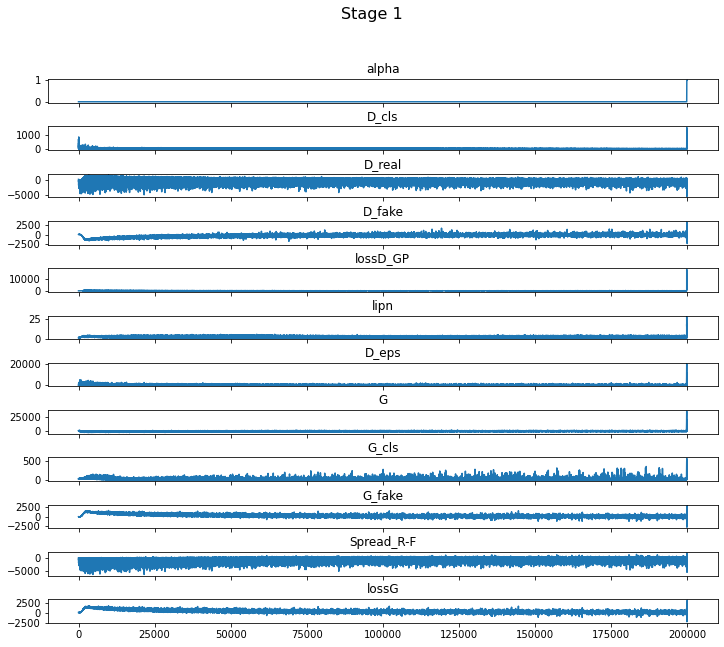

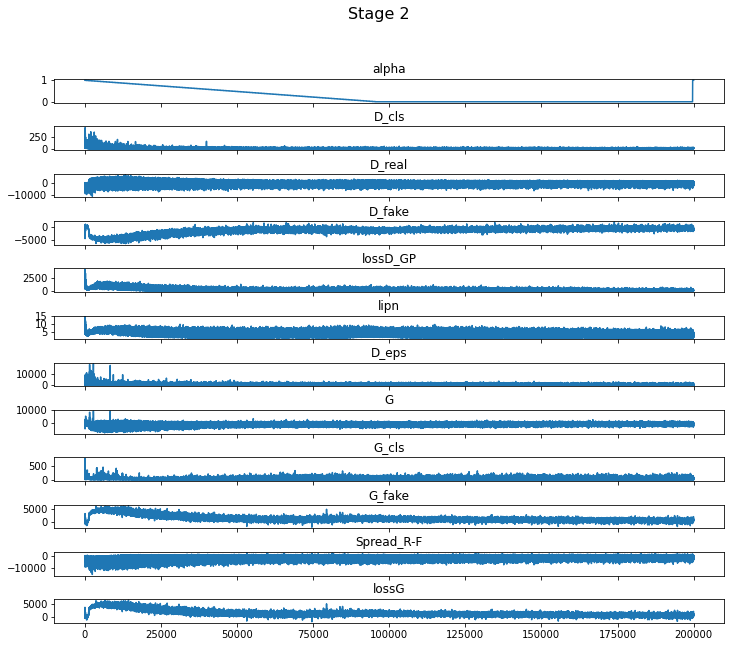

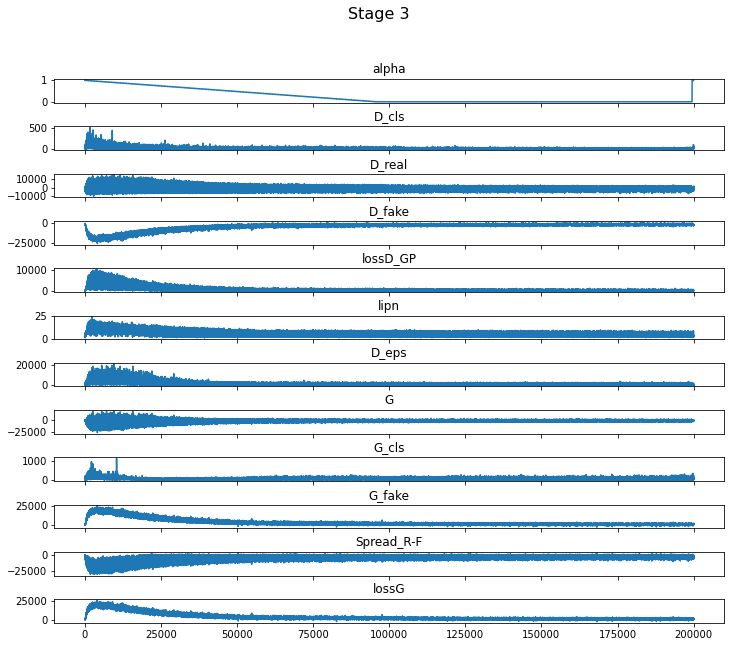

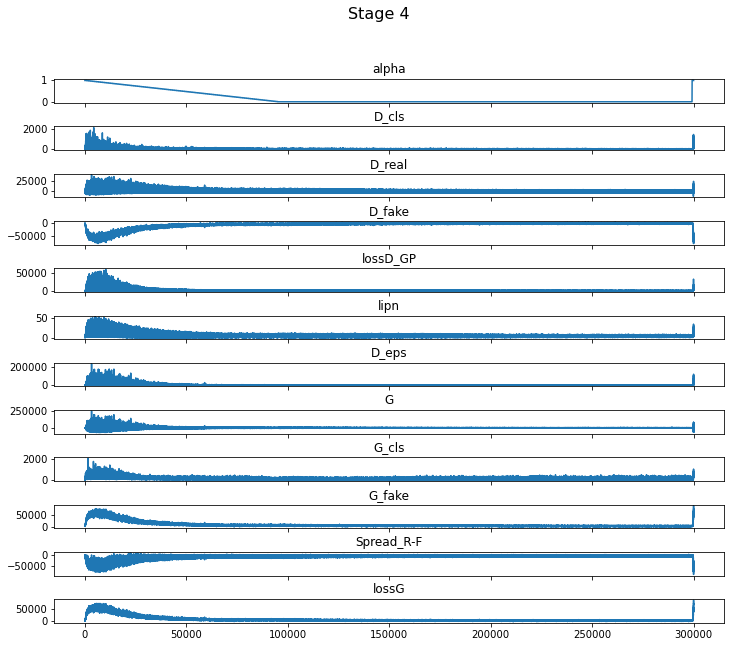

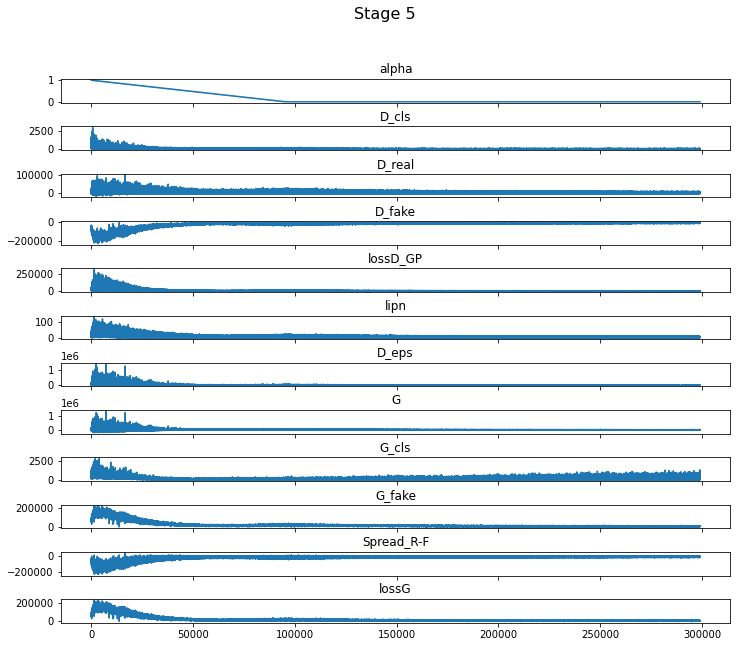

In [12]:
stageStart=0
for stage in range(1,6) :
    stageEnd=sum(stages[:stage])
    fig, ax = plt.subplots(len(fields),sharex=True, gridspec_kw={'hspace': 1}, figsize=(12,10))
    fig.suptitle('Stage {}'.format(stage), fontsize=16)
    cnt=0
    for field in fields :
        loss=getData(field, datafile)
        ax[cnt].plot(loss[stageStart:stageEnd]) #ax[cnt].plot(loss[:80000])
        #plt.ylabel('loss')
        #plt.xlabel('step')
        #ax.title(field)
        ax[cnt].set_title(field)
        cnt=cnt+1
    stageStart=stageEnd
    